In [2]:
import pandas as pd
import glob
import os

In [3]:
# !pip install openpyxl
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:

# Specify the folder containing Excel files
folder_path = 'C:\Crop Circle Africa'

# Get a list of all Excel files in the folder
excel_files = glob.glob(os.path.join(folder_path, "*.xls"))

# Read each file into a DataFrame
dataframes = []
for file in excel_files:
    df = pd.read_excel(file)
    dataframes.append(df)

# Combine all DataFrames into one (optional)
combined_df = pd.concat(dataframes, ignore_index=True)

combined_df.head()

Market             Commodity Classification Grade Sex  Wholesale  \
0     Kangeta     Kales/Sukuma Wiki              -     -   -   40.00/Kg   
1     Kangeta            Dry Onions              -     -   -  110.00/Kg   
2  Kawangware  White Irish Potatoes              -     -   -   43.33/Kg   
3  Kawangware           Water Melon              -     -   -   30.00/Kg   
4  Kawangware               Oranges              -     -   -         -    

      Retail  Supply Volume   County        Date  
0   50.00/Kg          400.0     Meru  2024-06-12  
1  120.00/Kg         1200.0     Meru  2024-06-12  
2   60.00/Kg            NaN  Nairobi  2024-06-12  
3   35.00/Kg            NaN  Nairobi  2024-06-12  
4  130.00/Kg            NaN  Nairobi  2024-06-12

## EDA

In [ ]:


cols=['Market','Commodity','Wholesale', 'Retail','Supply Volume','County',	'Date']
combined_df= combined_df[cols]
combined_df.head()

Market             Commodity  Wholesale     Retail  Supply Volume  \
0     Kangeta     Kales/Sukuma Wiki   40.00/Kg   50.00/Kg          400.0   
1     Kangeta            Dry Onions  110.00/Kg  120.00/Kg         1200.0   
2  Kawangware  White Irish Potatoes   43.33/Kg   60.00/Kg            NaN   
3  Kawangware           Water Melon   30.00/Kg   35.00/Kg            NaN   
4  Kawangware               Oranges         -   130.00/Kg            NaN   

    County        Date  
0     Meru  2024-06-12  
1     Meru  2024-06-12  
2  Nairobi  2024-06-12  
3  Nairobi  2024-06-12  
4  Nairobi  2024-06-12

In [ ]:


cols=['Market','Commodity','Wholesale', 'Retail','Supply Volume','County',	'Date']
combined_df= combined_df[cols]
combined_df.head()

In [6]:
# Convert 'retail' column to float
combined_df['Retail_per_kg'] = combined_df['Retail'].str.replace('/Kg', '', regex=False).apply(pd.to_numeric, errors='coerce') 
combined_df['Wholesale_per_kg'] = combined_df['Wholesale'].str.replace('/Kg', '', regex=False).apply(pd.to_numeric, errors='coerce') 
combined_df['Date']= pd.to_datetime(combined_df['Date'], errors='coerce')
combined_df.drop(columns=["Wholesale","Retail"], inplace=True)
combined_df.head()

Market             Commodity  Supply Volume   County       Date  \
0     Kangeta     Kales/Sukuma Wiki          400.0     Meru 2024-06-12   
1     Kangeta            Dry Onions         1200.0     Meru 2024-06-12   
2  Kawangware  White Irish Potatoes            NaN  Nairobi 2024-06-12   
3  Kawangware           Water Melon            NaN  Nairobi 2024-06-12   
4  Kawangware               Oranges            NaN  Nairobi 2024-06-12   

   Retail_per_kg  Wholesale_per_kg  
0           50.0             40.00  
1          120.0            110.00  
2           60.0             43.33  
3           35.0             30.00  
4          130.0               NaN

In [7]:
combined_df.describe()

Supply Volume                           Date  Retail_per_kg  \
count   23034.000000                          36000   30902.000000   
mean     4320.753713  2023-02-12 07:48:31.200000256      73.639986   
min         0.000000            2021-10-01 00:00:00       0.010000   
25%       520.000000            2022-08-19 00:00:00      35.000000   
50%      1500.000000            2023-01-20 00:00:00      60.000000   
75%      4000.000000            2023-09-11 00:00:00      80.000000   
max    790000.000000            2024-06-12 00:00:00   11100.000000   
std     10067.633749                            NaN     173.281934   

       Wholesale_per_kg  
count      28739.000000  
mean          53.033085  
min            0.010000  
25%           25.000000  
50%           40.000000  
75%           64.440000  
max         7000.000000  
std          118.487287

In [8]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Market            36000 non-null  object        
 1   Commodity         36000 non-null  object        
 2   Supply Volume     23034 non-null  float64       
 3   County            36000 non-null  object        
 4   Date              36000 non-null  datetime64[ns]
 5   Retail_per_kg     30902 non-null  float64       
 6   Wholesale_per_kg  28739 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 1.9+ MB


In [9]:
# Assuming `df` is your DataFrame
grouped_stats = combined_df.groupby(['County', 'Commodity']).agg(
    mean_retail=('Retail_per_kg', 'mean'),
    median_retail=('Retail_per_kg', 'median'),
    std_retail=('Retail_per_kg', 'std'),
    min_retail=('Retail_per_kg', 'min'),
    max_retail=('Retail_per_kg', 'max'),
    mean_wholesale=('Wholesale_per_kg', 'mean'),
    median_wholesale=('Wholesale_per_kg', 'median'),
    std_wholesale=('Wholesale_per_kg', 'std'),
    min_wholesale=('Wholesale_per_kg', 'min'),
    max_wholesale=('Wholesale_per_kg', 'max')
).reset_index()

grouped_stats

County             Commodity  mean_retail  median_retail  std_retail  \
0   Kirinyaga      Banana (Cooking)    35.907463          30.00   63.469758   
1   Kirinyaga     Banana (Ripening)    37.907572          30.00   56.749741   
2   Kirinyaga             Dry Maize    69.175021          70.00   36.184728   
3   Kirinyaga            Dry Onions   100.490471          90.00   45.703160   
4   Kirinyaga     Kales/Sukuma Wiki    28.893209          30.00   10.192563   
5   Kirinyaga               Mangoes    58.448274          60.00   30.951497   
6   Kirinyaga               Oranges    77.519591          75.76   24.237686   
7   Kirinyaga               Spinach    41.184633          40.00   13.789043   
8   Kirinyaga           Water Melon    36.464843          35.00    8.723150   
9   Kirinyaga  White Irish Potatoes    73.638985          50.00  104.332132   
10       Meru      Banana (Cooking)    58.299087          45.00   47.139392   
11       Meru     Banana (Ripening)    52.338710          50.00   20.791605   
12       Meru             Dry Maize    60.557416          65.00   15.100711   
13       Meru            Dry Onions    97.192575          80.00   42.242462   
14       Meru     Kales/Sukuma Wiki    45.537634          40.00   23.555138   
15       Meru               Mangoes    57.922581          50.00   32.731203   
16       Meru               Oranges    86.735971          70.00   41.124842   
17       Meru               Spinach    55.000000          50.00   21.115446   
18       Meru           Water Melon    55.953608          50.00   15.141574   
19       Meru  White Irish Potatoes   110.712538          80.00  298.095761   
20    Nairobi      Banana (Cooking)    59.866734          50.00   44.643831   
21    Nairobi     Banana (Ripening)    50.135701          46.67   13.121477   
22    Nairobi             Dry Maize   111.132387          85.00  280.224287   
23    Nairobi            Dry Onions   108.700584          85.00  165.626532   
24    Nairobi     Kales/Sukuma Wiki    38.184211          30.00   23.537132   
25    Nairobi               Mangoes    94.000539          90.00   21.690047   
26    Nairobi               Oranges    98.278706          80.00   51.478939   
27    Nairobi               Spinach    37.661137          30.00   20.753913   
28    Nairobi           Water Melon    48.830381          40.00   24.496905   
29    Nairobi  White Irish Potatoes    82.777558          80.00   26.653932   
30     Nakuru      Banana (Cooking)    94.753425         100.00   52.132253   
31     Nakuru     Banana (Ripening)   111.673255         100.00   93.495591   
32     Nakuru             Dry Maize   219.154276          70.00  695.630727   
33     Nakuru            Dry Onions   116.509808         100.00   73.853696   
34     Nakuru     Kales/Sukuma Wiki    35.875537          30.00   32.551680   
35     Nakuru               Mangoes   106.814675         100.00   55.396212   
36     Nakuru               Oranges    90.385117         100.00   55.476323   
37     Nakuru               Spinach    45.983010          35.00   46.232168   
38     Nakuru           Water Melon    93.082027         100.00   73.466407   
39     Nakuru  White Irish Potatoes    76.885927          40.00  513.944880   
40  Nyandarua      Banana (Cooking)    38.845813          30.00   25.363397   
41  Nyandarua     Banana (Ripening)    41.244029          40.00   16.253165   
42  Nyandarua             Dry Maize    63.821349          66.67   16.311362   
43  Nyandarua            Dry Onions    69.189986          60.00   25.783662   
44  Nyandarua     Kales/Sukuma Wiki    22.550766          20.00   13.437460   
45  Nyandarua               Mangoes    60.236384          50.00   24.676678   
46  Nyandarua               Oranges    71.031303          60.00   20.662817   
47  Nyandarua               Spinach    28.352317          25.00   19.086562   
48  Nyandarua           Water Melon    66.758946          60.00   53.726412   
49  Nyandarua  White Irish Potatoes    42.118961         

# Kirinyaga

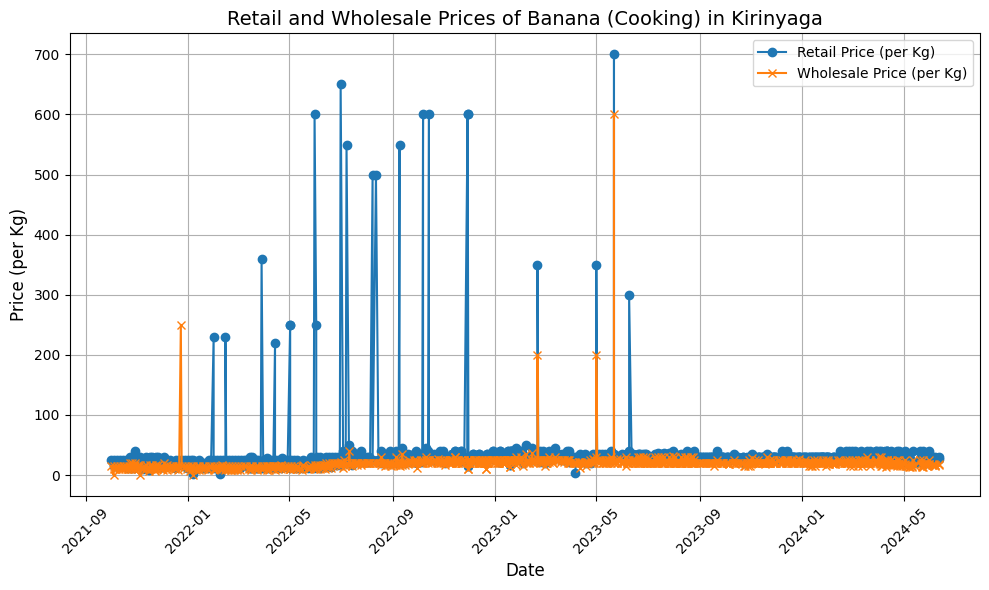

In [10]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = combined_df[(combined_df['County'] == 'Kirinyaga') & (combined_df['Commodity'] == 'Banana (Cooking)')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Date')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Date'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Retail and Wholesale Prices of Banana (Cooking) in Kirinyaga', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


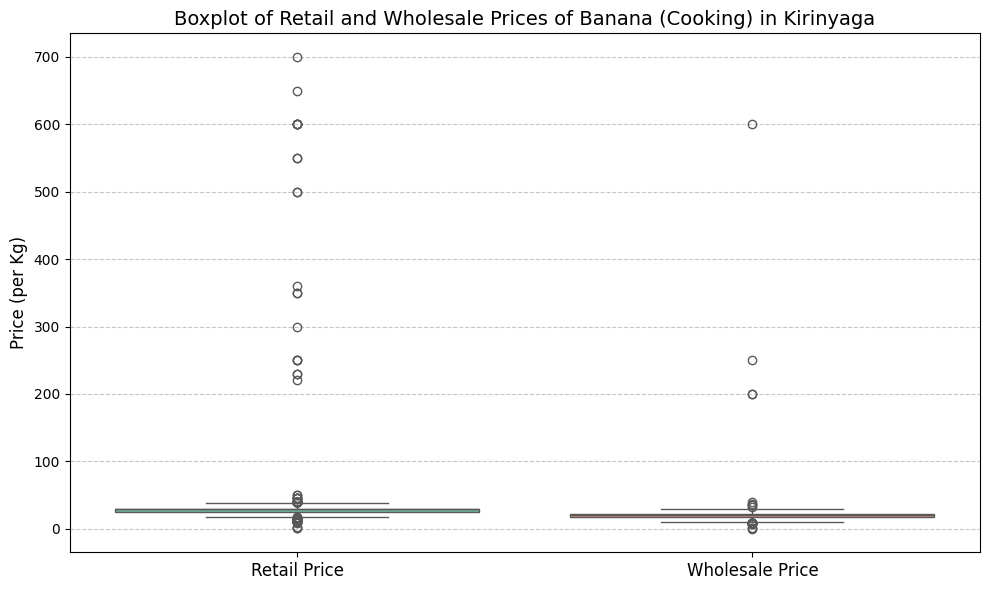

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df[['Retail_per_kg', 'Wholesale_per_kg']], palette='Set2')

# Customize the plot
plt.title('Boxplot of Retail and Wholesale Prices of Banana (Cooking) in Kirinyaga', fontsize=14)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Retail Price', 'Wholesale Price'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

### Detect and remove outliers

In [12]:
import numpy as np

def detect_and_remove_outliers_iqr(data):
    # Remove missing values (NaN)
    data = data.dropna()
    # Sort the data
    data = sorted(data)
    # Calculate Q1, Q3, and IQR
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3 - q1
    # Calculate lower and upper bounds
    lwr_bound = q1 - (1.5 * IQR)
    upr_bound = q3 + (1.5 * IQR)
    # Filter out outliers and keep non-outliers
    non_outliers = [i for i in data if lwr_bound <= i <= upr_bound]
    return non_outliers

# Example usage:
cleaned_retail = detect_and_remove_outliers_iqr(filtered_df['Retail_per_kg'])
cleaned_wholesale= detect_and_remove_outliers_iqr(filtered_df['Wholesale_per_kg'])

# Display cleaned data without outliers
print("Retail Prices without outliers:", cleaned_retail)


Retail Prices without outliers: [17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.54, 17.81, 17.84, 17.84, 17.86, 17.86, 17.96, 18.0, 19.01, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.37, 21.0, 21.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.5, 22.5, 22.5, 22.5, 22.5, 22.5, 22.5, 22.5, 22.5, 22.5, 22.5, 22.5, 22.5, 22.5, 22.5, 22.5, 22.5, 22.5, 22.5, 22.5, 22.5, 22.5, 22.5, 22.5, 22.5, 22.5, 22.5, 22.5, 22.5, 22.5, 23.0, 23.0, 23.0, 23.0, 23.5, 24.0, 24.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0

C:\Users\Jordan Gamba\AppData\Local\Temp\ipykernel_6948\3147810487.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cleaned_wholesale, palette='Set2')


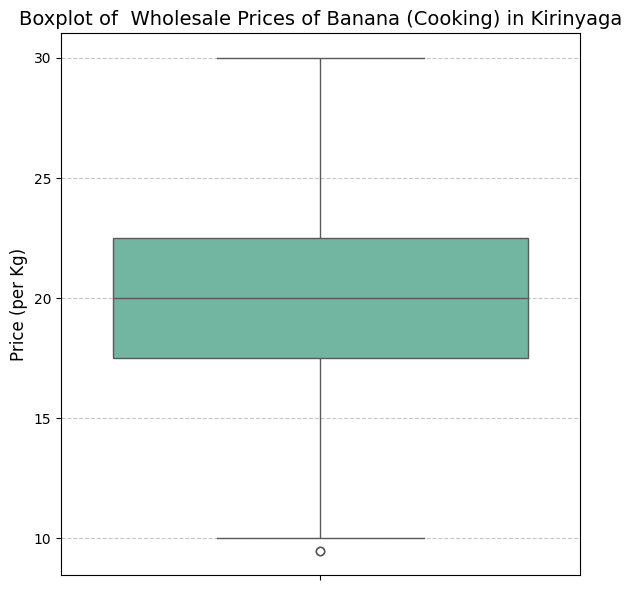

In [13]:

# Create the boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(data=cleaned_wholesale, palette='Set2')

# Customize the plot
plt.title('Boxplot of  Wholesale Prices of Banana (Cooking) in Kirinyaga', fontsize=14)
plt.ylabel('Price (per Kg)', fontsize=12)
#plt.xticks(labels= 'Wholesale Price', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\Jordan Gamba\AppData\Local\Temp\ipykernel_6948\486630407.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cleaned_retail, palette='Set2')


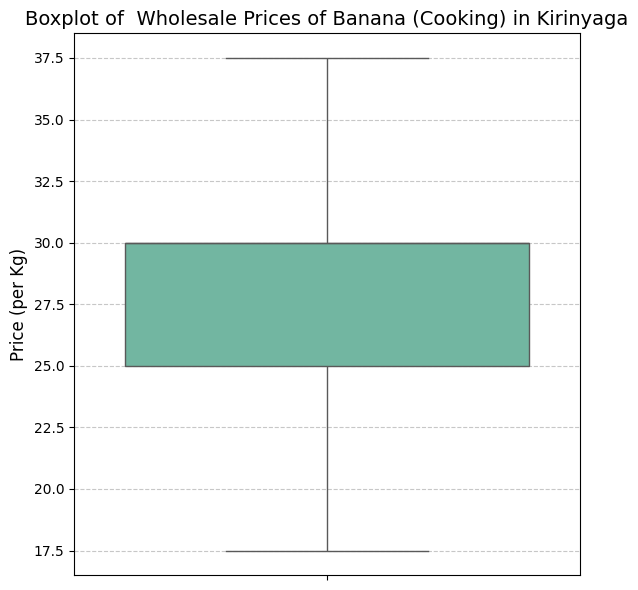

In [14]:

# Create the boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(data=cleaned_retail, palette='Set2')

# Customize the plot
plt.title('Boxplot of  Wholesale Prices of Banana (Cooking) in Kirinyaga', fontsize=14)
plt.ylabel('Price (per Kg)', fontsize=12)
#plt.xticks(labels= 'Wholesale Price', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()

In [15]:
# apply detect_and_remove_outliers_iqr to every county and comodity. 
print("County")
print(pd.unique(combined_df['County']))
print("Commodity")
print(pd.unique(combined_df['Commodity']))

County
['Meru' 'Nairobi' 'Kirinyaga' 'Nakuru' 'Nyandarua']
Commodity
['Kales/Sukuma Wiki' 'Dry Onions' 'White Irish Potatoes' 'Water Melon'
 'Oranges' 'Mangoes' 'Banana (Ripening)' 'Banana (Cooking)' 'Spinach'
 'Dry Maize']


## Bananas Cooking in Kirinyaga

In [16]:
import numpy as np
import pandas as pd

# Function to detect and remove outliers using IQR for a single column
def detect_and_remove_outliers_iqr(data):
    # Remove missing values (NaN)
    data = data.dropna()

    # Sort the data
    data = sorted(data)

    # Calculate Q1, Q3, and IQR
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3 - q1

    # Calculate lower and upper bounds
    lwr_bound = q1 - (1.5 * IQR)
    upr_bound = q3 + (1.5 * IQR)

    # Filter out outliers and keep non-outliers
    non_outliers = [i for i in data if lwr_bound <= i <= upr_bound]

    return non_outliers

# Function to remove outliers from multiple columns by grouping
def remove_outliers_by_group(df, columns):
    # Group by County and Commodity
    grouped = df.groupby(['County', 'Commodity'])

    # Function to apply IQR detection and remove outliers for each group and column
    def apply_outlier_removal(group):
        for column in columns:
            # Remove outliers from the specified column
            cleaned_data = detect_and_remove_outliers_iqr(group[column])
            # Assign the cleaned data back to the column
            group_cleaned = group[group[column].isin(cleaned_data)]
            group = group_cleaned  # Update the group with the cleaned data
        return group

    # Apply the function to each group and combine the results
    cleaned_df = grouped.apply(apply_outlier_removal)
    
    return cleaned_df.reset_index(drop=True)

# Columns to remove outliers from
columns_to_clean = ['Retail_per_kg']

# Apply the function to your dataset
cleaned_df = remove_outliers_by_group(combined_df, columns_to_clean)

# Show the cleaned data
print(cleaned_df.head())


               Market         Commodity  Supply Volume     County       Date  \
0            Kerugoya  Banana (Cooking)          800.0  Kirinyaga 2024-06-11   
1    Ngurubani Market  Banana (Cooking)         1800.0  Kirinyaga 2024-06-11   
2            Kerugoya  Banana (Cooking)          750.0  Kirinyaga 2024-06-07   
3    Ngurubani Market  Banana (Cooking)         1500.0  Kirinyaga 2024-06-07   
4  Makutano Kirinyaga  Banana (Cooking)         4000.0  Kirinyaga 2024-06-07   

   Retail_per_kg  Wholesale_per_kg  
0           30.0              18.0  
1           26.0              17.0  
2           30.0              15.0  
3           25.0              17.0  
4           24.0              16.0  


C:\Users\Jordan Gamba\AppData\Local\Temp\ipykernel_6948\906774440.py:42: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cleaned_df = grouped.apply(apply_outlier_removal)


In [17]:
print(len(cleaned_df))
print(len(combined_df))

29338
36000


In [18]:
# Group by County and Commodity and calculate the mean for the specified columns
grouped_df_bananas_cook = cleaned_df.groupby(['County', 'Commodity', 'Date'])[['Retail_per_kg' ]].mean().reset_index()

# Show the result
grouped_df_bananas_cook.head()


County         Commodity       Date  Retail_per_kg
0  Kirinyaga  Banana (Cooking) 2021-10-01          25.00
1  Kirinyaga  Banana (Cooking) 2021-10-04          17.54
2  Kirinyaga  Banana (Cooking) 2021-10-05          25.00
3  Kirinyaga  Banana (Cooking) 2021-10-08          25.00
4  Kirinyaga  Banana (Cooking) 2021-10-12          25.00

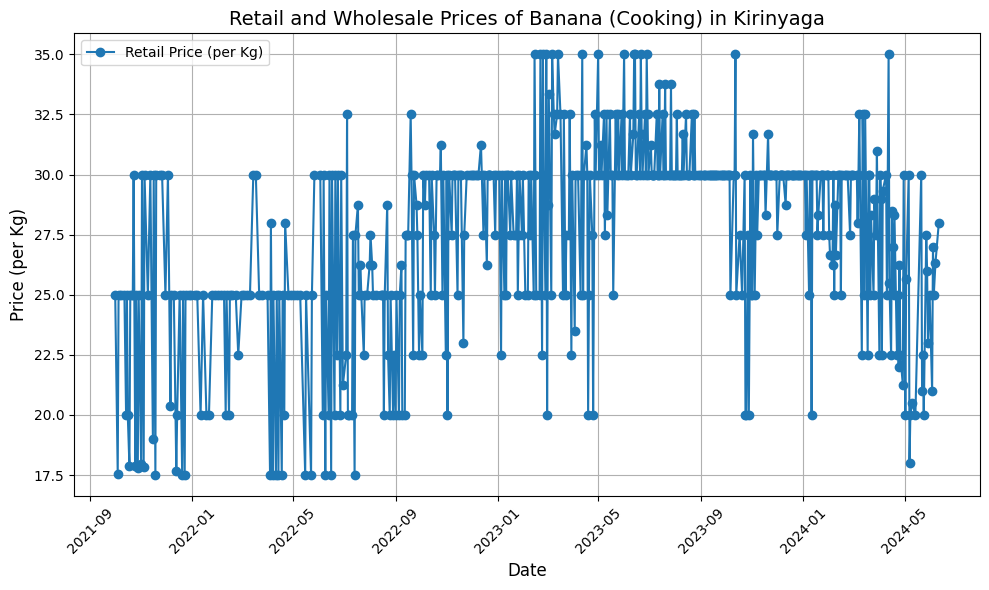

In [19]:

import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_df_bananas_cook[(grouped_df_bananas_cook['County'] == 'Kirinyaga') & (grouped_df_bananas_cook['Commodity'] == 'Banana (Cooking)')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Date')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Date'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Retail and Wholesale Prices of Banana (Cooking) in Kirinyaga', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


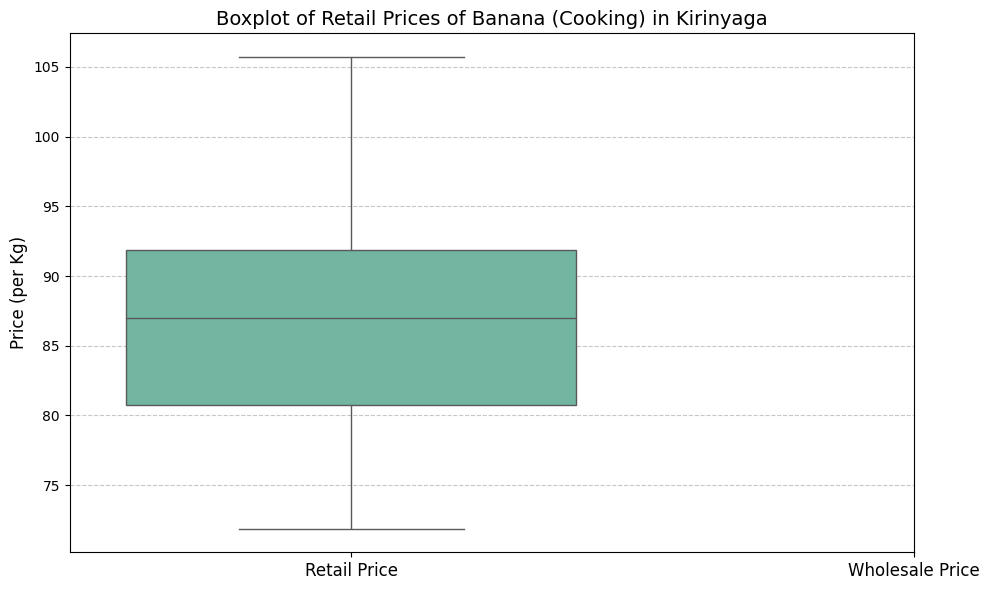

In [242]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df[['Retail_per_kg', ]], palette='Set2')

# Customize the plot
plt.title('Boxplot of Retail Prices of Banana (Cooking) in Kirinyaga', fontsize=14)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Retail Price', 'Wholesale Price'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [21]:

# Create new columns for month and quarter
cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
#cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_bananas_cook= cleaned_df.groupby(['County', 'Commodity', 'Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_bananas_cook['Month'] = grouped_by_date_bananas_cook['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_bananas_cook)


         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


In [22]:
grouped_by_date_bananas_cook.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1533 entries, 0 to 1532
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   County         1533 non-null   object        
 1   Commodity      1533 non-null   object        
 2   Month          1533 non-null   datetime64[ns]
 3   Retail_per_kg  1533 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 48.0+ KB


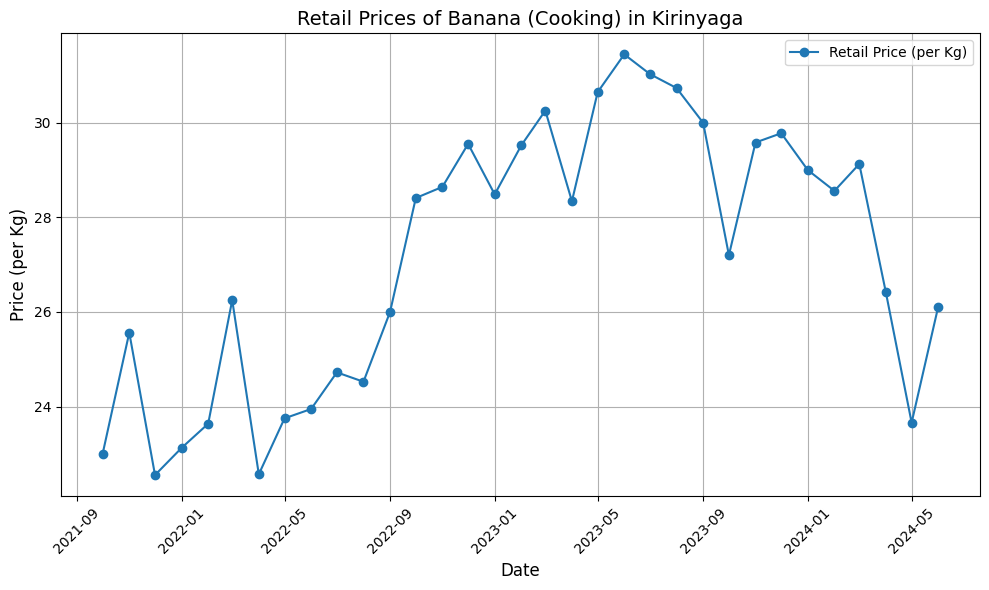

In [ ]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_bananas_cook[(grouped_by_date_bananas_cook['County'] == 'Kirinyaga') & (grouped_by_date_bananas_cook['Commodity'] == 'Banana (Cooking)')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Retail Prices of Banana (Cooking) in Kirinyaga', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


### the best time to sell bananas cooking is between May and Septmber. The worst time to sell bananas is between January and May

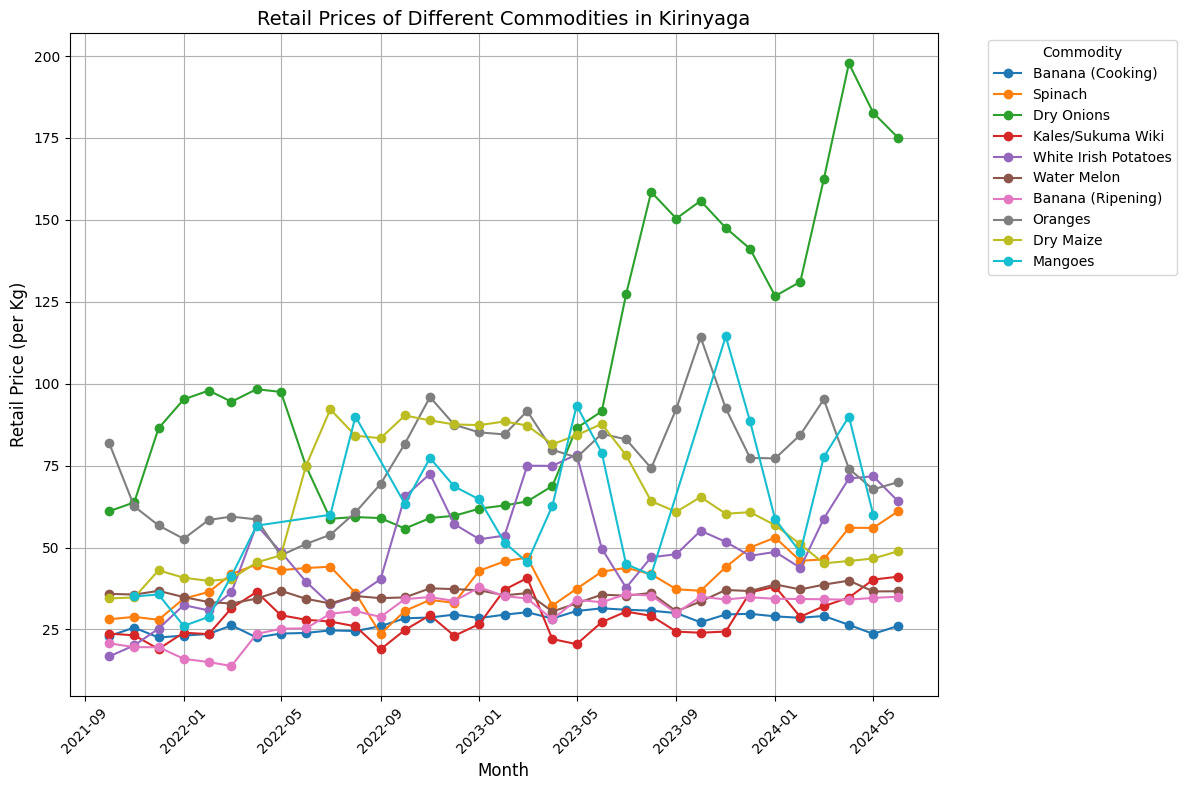

In [24]:
import matplotlib.pyplot as plt

# Filter the DataFrame for a specific County (e.g., Nairobi)
filtered_df = grouped_by_date_bananas_cook[grouped_by_date_bananas_cook['County'] == 'Kirinyaga']

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the plot
plt.figure(figsize=(12, 8))

# Loop over each unique commodity and plot
for commodity in filtered_df['Commodity'].unique():
    commodity_data = filtered_df[filtered_df['Commodity'] == commodity]
    plt.plot(commodity_data['Month'], commodity_data['Retail_per_kg'], label=commodity, marker='o')

# Customize the plot
plt.title('Retail Prices of Different Commodities in Kirinyaga', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Retail Price (per Kg)', fontsize=12)
plt.legend(title='Commodity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [25]:

# Create new columns for month and quarter
#cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_bananas_cook = cleaned_df.groupby(['County', 'Commodity', 'Quarter'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_bananas_cook['Quarter'] = grouped_by_date_bananas_cook['Quarter'].dt.to_timestamp()

# Show the result
print(grouped_by_date_bananas_cook)


        County             Commodity    Quarter  Retail_per_kg
0    Kirinyaga      Banana (Cooking) 2021-10-01      23.615682
1    Kirinyaga      Banana (Cooking) 2022-01-01      24.259259
2    Kirinyaga      Banana (Cooking) 2022-04-01      23.416667
3    Kirinyaga      Banana (Cooking) 2022-07-01      25.156250
4    Kirinyaga      Banana (Cooking) 2022-10-01      29.038793
..         ...                   ...        ...            ...
523  Nyandarua  White Irish Potatoes 2022-10-01      45.250000
524  Nyandarua  White Irish Potatoes 2023-01-01      43.916087
525  Nyandarua  White Irish Potatoes 2023-04-01      56.823636
526  Nyandarua  White Irish Potatoes 2023-07-01      70.000000
527  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[528 rows x 4 columns]


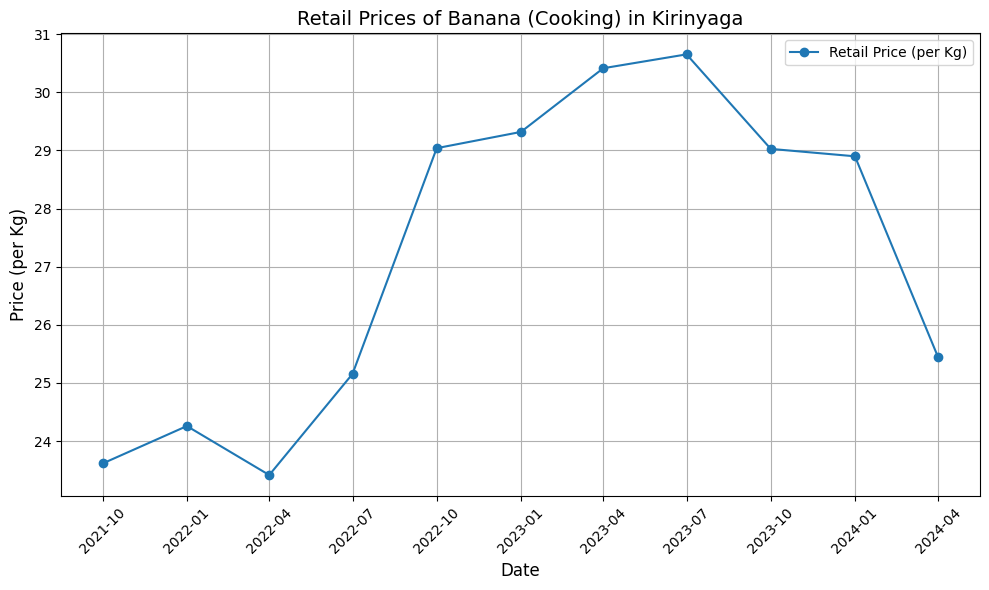

In [26]:

import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_bananas_cook[(grouped_by_date_bananas_cook['County'] == 'Kirinyaga') & (grouped_by_date_bananas_cook['Commodity'] == 'Banana (Cooking)')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Quarter')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Quarter'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Retail Prices of Banana (Cooking) in Kirinyaga', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


## Dry Maize in Kirinyaga

In [27]:
# Group by County and Commodity and calculate the mean for the specified columns
grouped_df_drymaizek = cleaned_df.groupby(['County', 'Commodity', 'Date'])[['Retail_per_kg' ]].mean().reset_index()

# Show the result
grouped_df_drymaizek.head()


County         Commodity       Date  Retail_per_kg
0  Kirinyaga  Banana (Cooking) 2021-10-01          25.00
1  Kirinyaga  Banana (Cooking) 2021-10-04          17.54
2  Kirinyaga  Banana (Cooking) 2021-10-05          25.00
3  Kirinyaga  Banana (Cooking) 2021-10-08          25.00
4  Kirinyaga  Banana (Cooking) 2021-10-12          25.00

###  Create new columns for Monthly trend of Dry Maize Retail Prices in Kirinyaga

In [28]:

# Create new columns for month and quarter
cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
#cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_drymaize_Kirinyaga= cleaned_df.groupby(['County', 'Commodity', 'Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_drymaize_Kirinyaga['Month'] = grouped_by_date_drymaize_Kirinyaga['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_drymaize_Kirinyaga)

         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


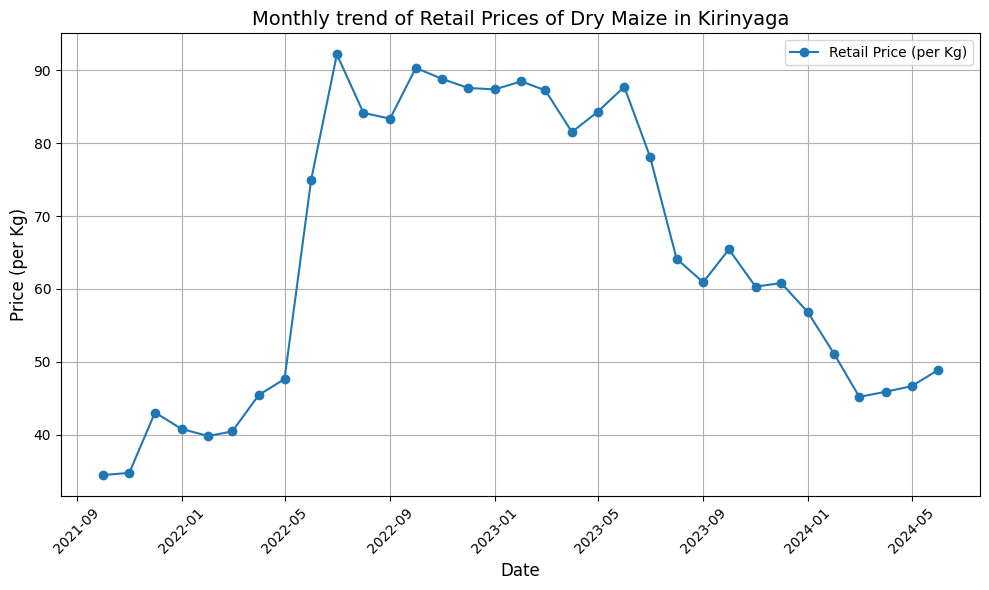

In [29]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_drymaize_Kirinyaga[(grouped_by_date_drymaize_Kirinyaga['County'] == 'Kirinyaga') & (grouped_by_date_drymaize_Kirinyaga['Commodity'] == 'Dry Maize')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of Dry Maize in Kirinyaga', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

#### Best Time to Sell:
#### Peak Price: Around 2022-09 when the retail price per kilogram reached its highest (~90 KES).Selling during this time would maximize profit.
#### Worst Time to Sell:
#### Lowest Price: Around 2024-02 to 2024-04 when the retail price dropped significantly (~40–45 KES). Selling during this time would minimize returns.

## Create new columns for Quarterly trend of Dry Maize Retail Prices in Kirinyaga

In [30]:

# cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_drymaize_Kirinyaga= cleaned_df.groupby(['County', 'Commodity', 'Quarter'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_drymaize_Kirinyaga['Quarter'] = grouped_by_date_drymaize_Kirinyaga['Quarter'].dt.to_timestamp()

# Show the result
print(grouped_by_date_drymaize_Kirinyaga)

        County             Commodity    Quarter  Retail_per_kg
0    Kirinyaga      Banana (Cooking) 2021-10-01      23.615682
1    Kirinyaga      Banana (Cooking) 2022-01-01      24.259259
2    Kirinyaga      Banana (Cooking) 2022-04-01      23.416667
3    Kirinyaga      Banana (Cooking) 2022-07-01      25.156250
4    Kirinyaga      Banana (Cooking) 2022-10-01      29.038793
..         ...                   ...        ...            ...
523  Nyandarua  White Irish Potatoes 2022-10-01      45.250000
524  Nyandarua  White Irish Potatoes 2023-01-01      43.916087
525  Nyandarua  White Irish Potatoes 2023-04-01      56.823636
526  Nyandarua  White Irish Potatoes 2023-07-01      70.000000
527  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[528 rows x 4 columns]


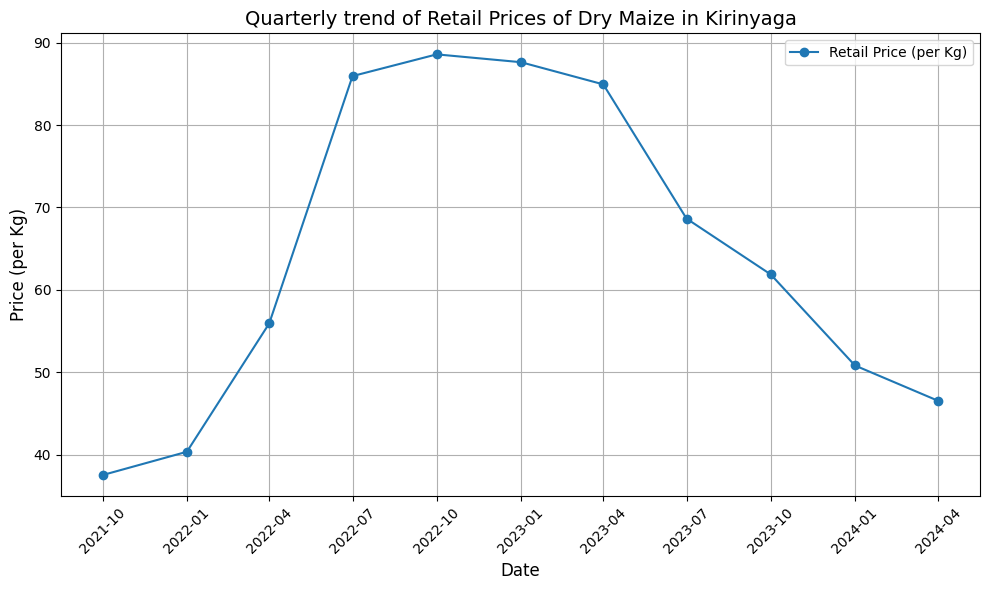

In [31]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_drymaize_Kirinyaga[(grouped_by_date_drymaize_Kirinyaga['County'] == 'Kirinyaga') & (grouped_by_date_drymaize_Kirinyaga['Commodity'] == 'Dry Maize')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Quarter')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Quarter'], filtered_df['Retail_per_kg'],label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Quarterly trend of Retail Prices of Dry Maize in Kirinyaga', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot

## White Irish Potatoes in Kirinyaga

###  Create new columns for Monthly trend of White Irish Potatoes Retail Prices in Kirinyaga

In [32]:
# Create new columns for month and quarter
cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
#cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_whiteirish_Kirinyaga= cleaned_df.groupby(['County', 'Commodity', 'Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_whiteirish_Kirinyaga['Month'] = grouped_by_date_whiteirish_Kirinyaga['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_whiteirish_Kirinyaga)

         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


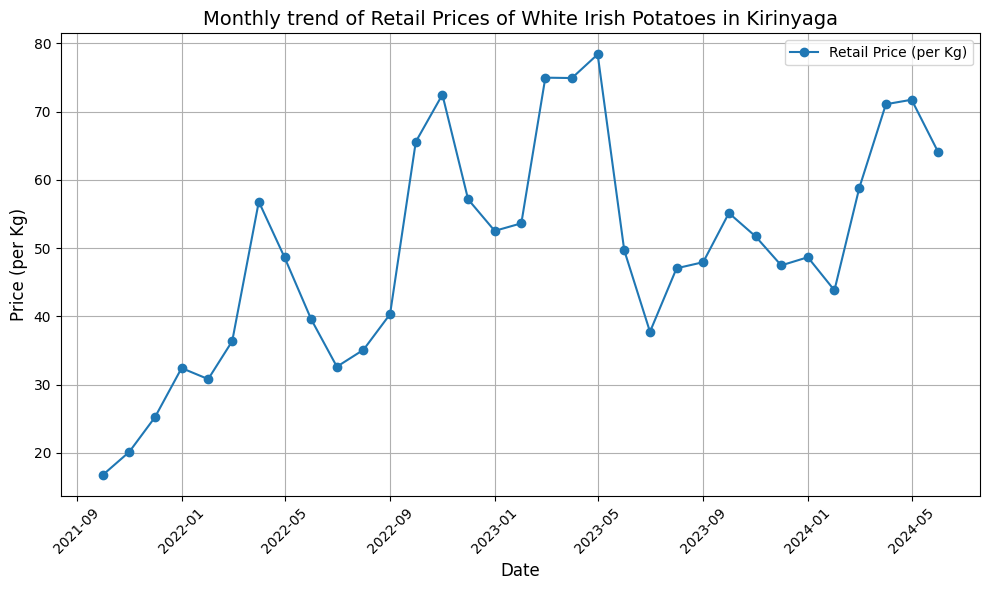

In [33]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_whiteirish_Kirinyaga[(grouped_by_date_whiteirish_Kirinyaga['County'] == 'Kirinyaga') & (grouped_by_date_whiteirish_Kirinyaga['Commodity'] == 'White Irish Potatoes')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of White Irish Potatoes in Kirinyaga', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot

### The worst time to sell is between May and September and the best time to sell  is between September to January.
### The prices seem to gain an upwardly trend overall

### Create new columns for Quarterly trend of White Irish Potatoes Retail Prices in Kirinyaga

In [34]:
# cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_whiteirish_Kirinyaga= cleaned_df.groupby(['County', 'Commodity','Quarter'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_whiteirish_Kirinyaga['Quarter'] = grouped_by_date_whiteirish_Kirinyaga['Quarter'].dt.to_timestamp()

# Show the result
print(grouped_by_date_whiteirish_Kirinyaga)

        County             Commodity    Quarter  Retail_per_kg
0    Kirinyaga      Banana (Cooking) 2021-10-01      23.615682
1    Kirinyaga      Banana (Cooking) 2022-01-01      24.259259
2    Kirinyaga      Banana (Cooking) 2022-04-01      23.416667
3    Kirinyaga      Banana (Cooking) 2022-07-01      25.156250
4    Kirinyaga      Banana (Cooking) 2022-10-01      29.038793
..         ...                   ...        ...            ...
523  Nyandarua  White Irish Potatoes 2022-10-01      45.250000
524  Nyandarua  White Irish Potatoes 2023-01-01      43.916087
525  Nyandarua  White Irish Potatoes 2023-04-01      56.823636
526  Nyandarua  White Irish Potatoes 2023-07-01      70.000000
527  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[528 rows x 4 columns]


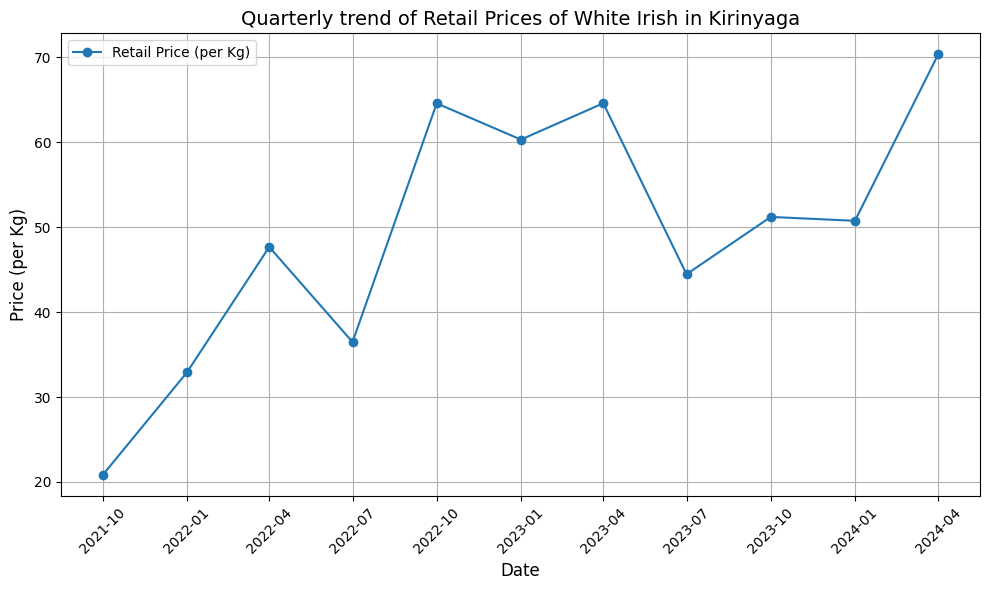

In [35]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_whiteirish_Kirinyaga[(grouped_by_date_whiteirish_Kirinyaga['County'] == 'Kirinyaga') & (grouped_by_date_whiteirish_Kirinyaga['Commodity'] == 'White Irish Potatoes')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Quarter')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Quarter'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Quarterly trend of Retail Prices of White Irish in Kirinyaga', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

## Dry Onions in Kirinyaga

###  Create new columns for Monthly trend of Dry Onions Retail Prices in Kirinyaga

In [36]:

cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
# cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_dryonions_Kirinyaga= cleaned_df.groupby(['County', 'Commodity','Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_dryonions_Kirinyaga['Month'] = grouped_by_date_dryonions_Kirinyaga['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_dryonions_Kirinyaga)

         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


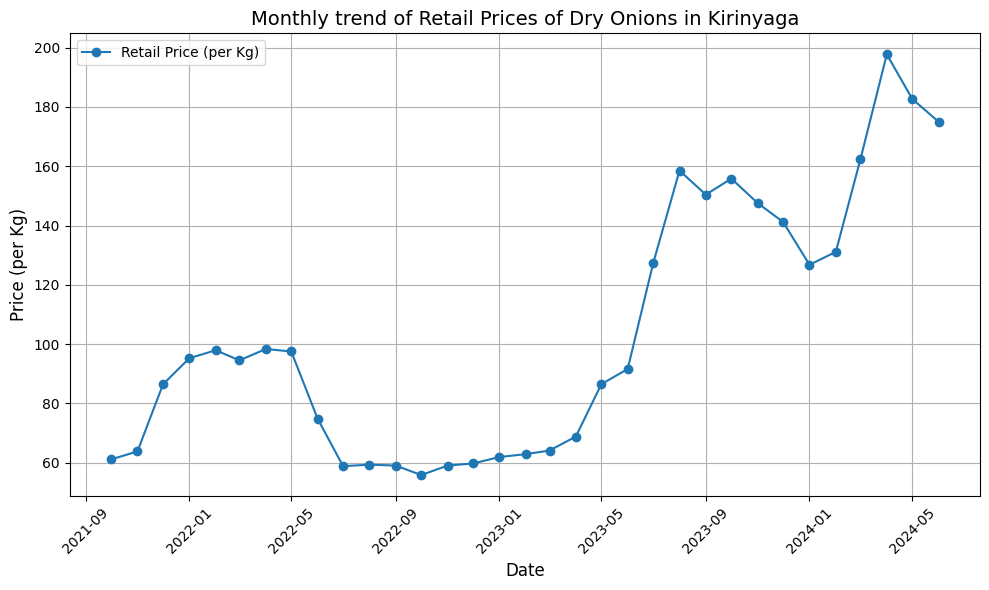

In [37]:
import matplotlib.pyplot as plt
# Filter the DataFrame
filtered_df = grouped_by_date_dryonions_Kirinyaga[(grouped_by_date_dryonions_Kirinyaga['County'] == 'Kirinyaga') & (grouped_by_date_dryonions_Kirinyaga['Commodity'] == 'Dry Onions')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'],filtered_df['Retail_per_kg'],label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of Dry Onions in Kirinyaga', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot

### Jan - May there is a price increase
### Sep - Jan price decrease

###  Create new columns for Quarterly trend of Dry Onions Retail Prices in Kirinyaga

In [38]:
cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_dryonions_Kirinyaga= cleaned_df.groupby(['County', 'Commodity','Quarter'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_dryonions_Kirinyaga['Quarter'] = grouped_by_date_dryonions_Kirinyaga['Quarter'].dt.to_timestamp()

# Show the result
print(grouped_by_date_dryonions_Kirinyaga)

        County             Commodity    Quarter  Retail_per_kg
0    Kirinyaga      Banana (Cooking) 2021-10-01      23.615682
1    Kirinyaga      Banana (Cooking) 2022-01-01      24.259259
2    Kirinyaga      Banana (Cooking) 2022-04-01      23.416667
3    Kirinyaga      Banana (Cooking) 2022-07-01      25.156250
4    Kirinyaga      Banana (Cooking) 2022-10-01      29.038793
..         ...                   ...        ...            ...
523  Nyandarua  White Irish Potatoes 2022-10-01      45.250000
524  Nyandarua  White Irish Potatoes 2023-01-01      43.916087
525  Nyandarua  White Irish Potatoes 2023-04-01      56.823636
526  Nyandarua  White Irish Potatoes 2023-07-01      70.000000
527  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[528 rows x 4 columns]


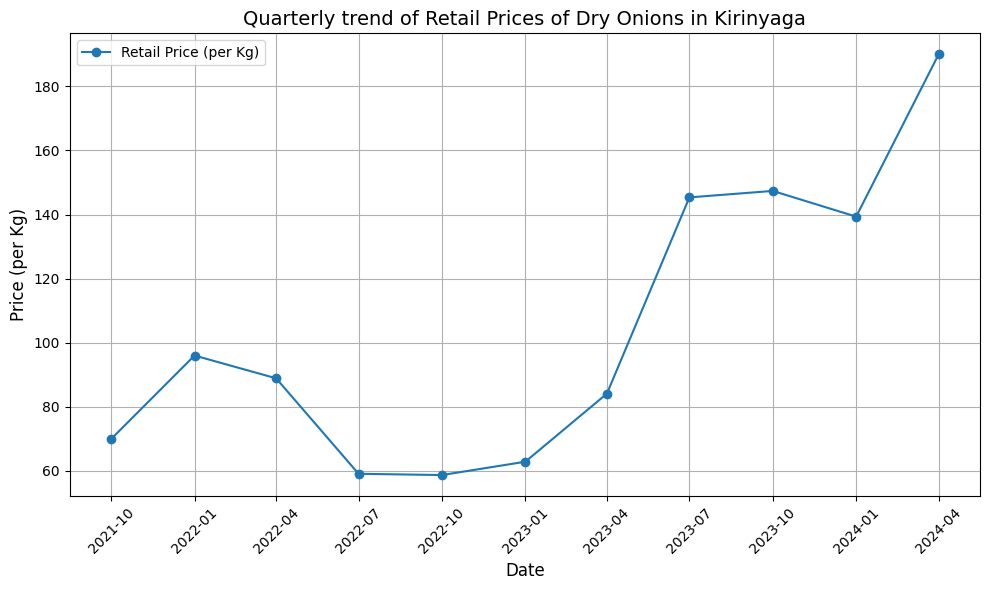

In [39]:
import matplotlib.pyplot as plt
# Filter the DataFrame
filtered_df = grouped_by_date_dryonions_Kirinyaga[(grouped_by_date_dryonions_Kirinyaga['County'] == 'Kirinyaga') & (grouped_by_date_dryonions_Kirinyaga['Commodity'] == 'Dry Onions')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Quarter')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Quarter'],filtered_df['Retail_per_kg'],label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Quarterly trend of Retail Prices of Dry Onions in Kirinyaga', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


#### There seems to be no distinguishable trend for the dry onions apart from the upward trend in prices

## Watermelons in Kirinyaga

###  Create new columns for Monthly trend of Water melons Retail Prices in Kirinyaga 

In [40]:
# Create new columns for month and quarter
cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
#cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_watermelons_Kirinyaga= cleaned_df.groupby(['County', 'Commodity','Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_watermelons_Kirinyaga['Month'] = grouped_by_date_watermelons_Kirinyaga['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_watermelons_Kirinyaga)

         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


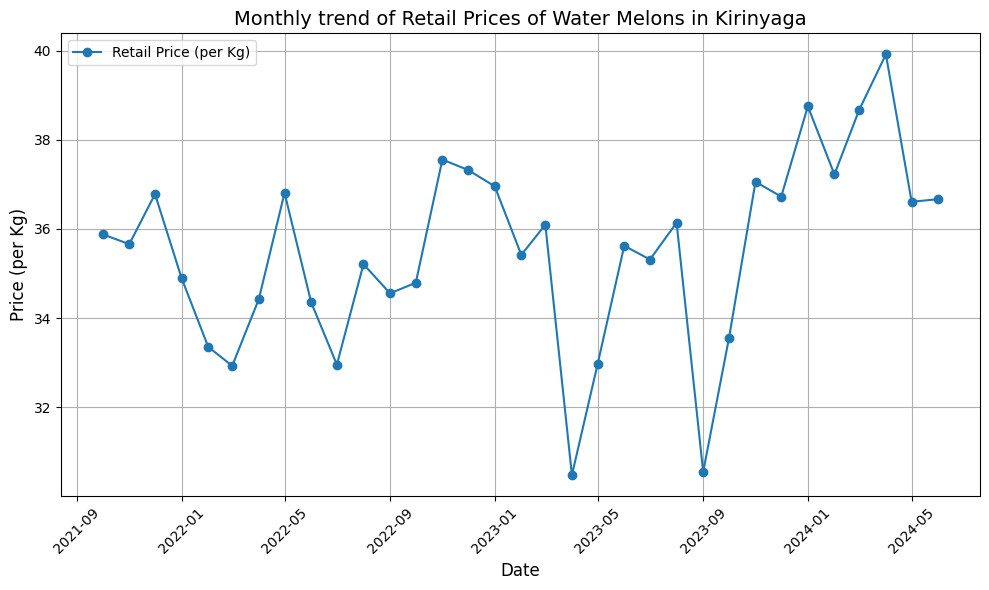

In [41]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_watermelons_Kirinyaga[(grouped_by_date_watermelons_Kirinyaga['County'] == 'Kirinyaga') & (grouped_by_date_watermelons_Kirinyaga['Commodity'] == 'Water Melon')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of Water Melons in Kirinyaga', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


### the best times for a seller to sell would be in the April/May and September timeframes when prices are at their highest. 

### The worst times would be in the January/February and July/August periods when prices are at their lowest.


###  Create new columns for Quarterly trend of Water melons Retail Prices in Kirinyaga 

In [42]:
cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_watermelons_Kirinyaga= cleaned_df.groupby(['County', 'Commodity','Quarter'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_watermelons_Kirinyaga['Quarter'] = grouped_by_date_watermelons_Kirinyaga['Quarter'].dt.to_timestamp()

# Show the result
print(grouped_by_date_watermelons_Kirinyaga)

        County             Commodity    Quarter  Retail_per_kg
0    Kirinyaga      Banana (Cooking) 2021-10-01      23.615682
1    Kirinyaga      Banana (Cooking) 2022-01-01      24.259259
2    Kirinyaga      Banana (Cooking) 2022-04-01      23.416667
3    Kirinyaga      Banana (Cooking) 2022-07-01      25.156250
4    Kirinyaga      Banana (Cooking) 2022-10-01      29.038793
..         ...                   ...        ...            ...
523  Nyandarua  White Irish Potatoes 2022-10-01      45.250000
524  Nyandarua  White Irish Potatoes 2023-01-01      43.916087
525  Nyandarua  White Irish Potatoes 2023-04-01      56.823636
526  Nyandarua  White Irish Potatoes 2023-07-01      70.000000
527  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[528 rows x 4 columns]


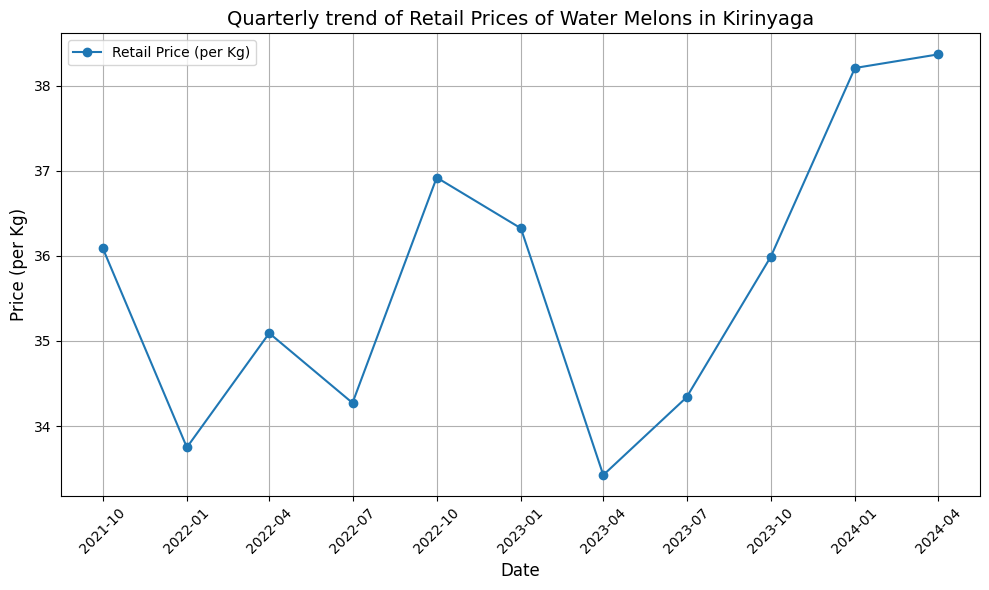

In [43]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_watermelons_Kirinyaga[(grouped_by_date_watermelons_Kirinyaga['County'] == 'Kirinyaga') & (grouped_by_date_watermelons_Kirinyaga['Commodity'] == 'Water Melon')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Quarter')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Quarter'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Quarterly trend of Retail Prices of Water Melons in Kirinyaga', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

### There is a slght decrease in retail prices of water melons between October and January that trend persists in the consecutive years.
### The prices increases after June 

## Oranges in Kirinyaga

###  Create new columns for Monthly trend of Oranges Retail Prices in Kirinyaga

In [44]:
cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
#cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_oranges_Kirinyaga= cleaned_df.groupby(['County', 'Commodity','Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_oranges_Kirinyaga['Month'] = grouped_by_date_oranges_Kirinyaga['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_oranges_Kirinyaga)

         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


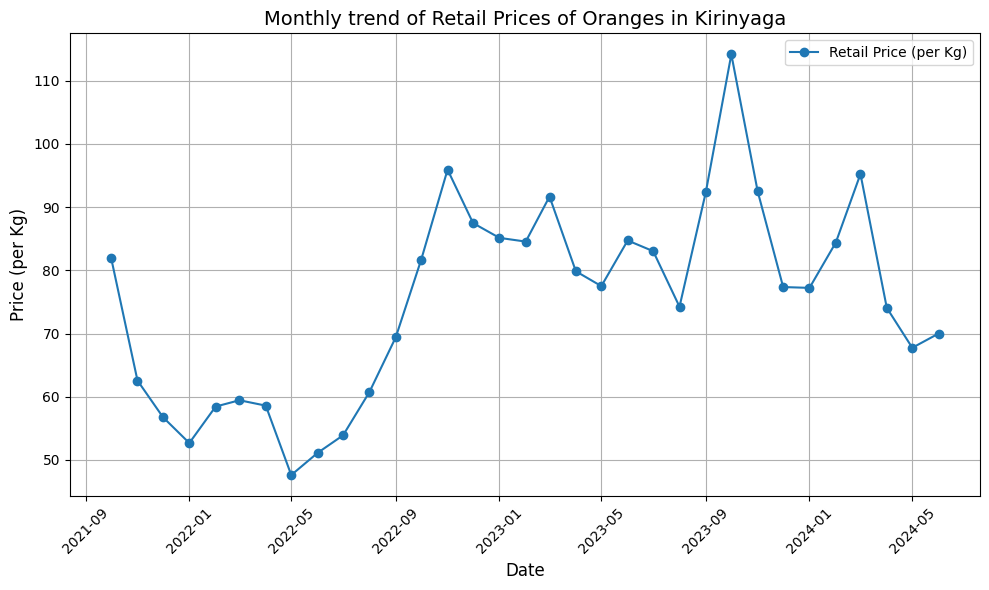

In [45]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_oranges_Kirinyaga[(grouped_by_date_oranges_Kirinyaga['County'] == 'Kirinyaga') & (grouped_by_date_oranges_Kirinyaga['Commodity'] == 'Oranges')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of Oranges in Kirinyaga', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

### There is a slight decrease in orange prices between january and May.
### The price increases after May and it peaked in October 2023

###  Create new columns for Quarterly trend of Oranges Retail Prices in Kirinyaga 

In [46]:
cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_oranges_Kirinyaga= cleaned_df.groupby(['County', 'Commodity','Quarter'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_oranges_Kirinyaga['Quarter'] = grouped_by_date_oranges_Kirinyaga['Quarter'].dt.to_timestamp()

# Show the result
print(grouped_by_date_oranges_Kirinyaga)

        County             Commodity    Quarter  Retail_per_kg
0    Kirinyaga      Banana (Cooking) 2021-10-01      23.615682
1    Kirinyaga      Banana (Cooking) 2022-01-01      24.259259
2    Kirinyaga      Banana (Cooking) 2022-04-01      23.416667
3    Kirinyaga      Banana (Cooking) 2022-07-01      25.156250
4    Kirinyaga      Banana (Cooking) 2022-10-01      29.038793
..         ...                   ...        ...            ...
523  Nyandarua  White Irish Potatoes 2022-10-01      45.250000
524  Nyandarua  White Irish Potatoes 2023-01-01      43.916087
525  Nyandarua  White Irish Potatoes 2023-04-01      56.823636
526  Nyandarua  White Irish Potatoes 2023-07-01      70.000000
527  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[528 rows x 4 columns]


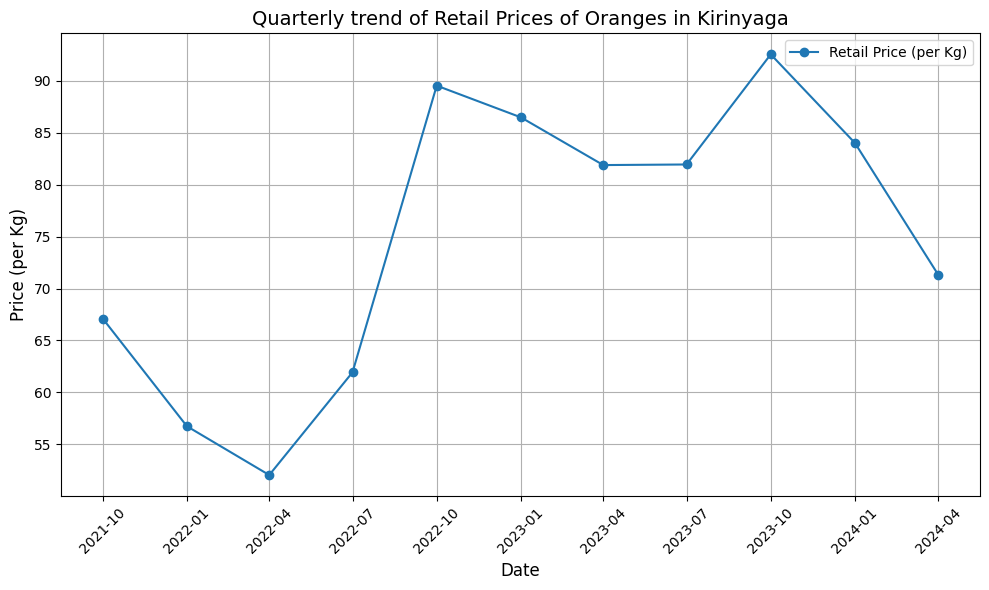

In [47]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_oranges_Kirinyaga[(grouped_by_date_oranges_Kirinyaga['County'] == 'Kirinyaga') & (grouped_by_date_oranges_Kirinyaga['Commodity'] == 'Oranges')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Quarter')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Quarter'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Quarterly trend of Retail Prices of Oranges in Kirinyaga', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

## Mangoes in Kirinyaga

###  Create new columns for Monthly trend of Mangoes Retail Prices in Kirinyaga 

In [48]:
cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
#cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_mangoes_Kirinyaga= cleaned_df.groupby(['County', 'Commodity','Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_mangoes_Kirinyaga['Month'] = grouped_by_date_mangoes_Kirinyaga['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_mangoes_Kirinyaga)

         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


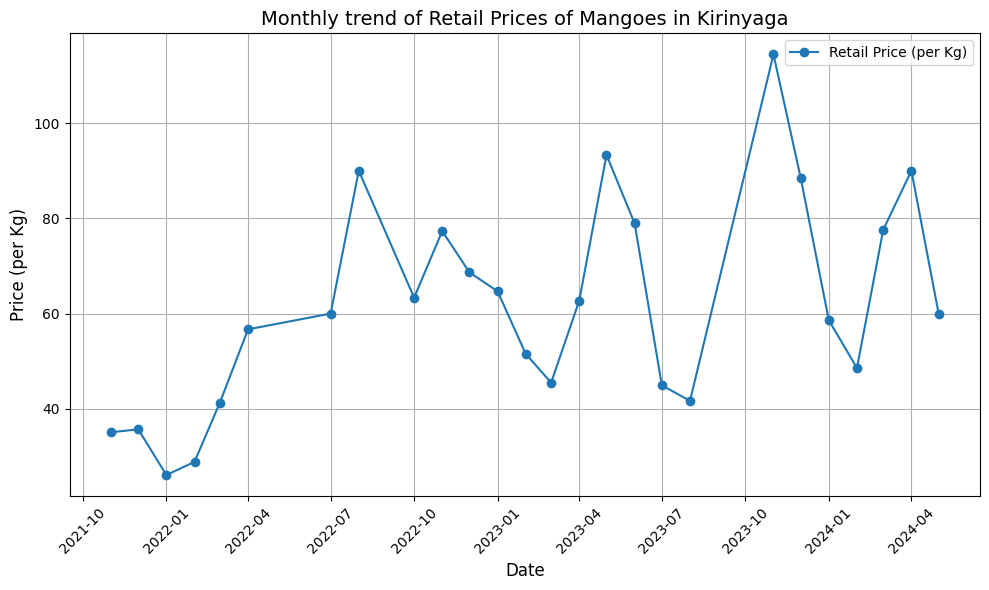

In [49]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_mangoes_Kirinyaga[(grouped_by_date_mangoes_Kirinyaga['County'] == 'Kirinyaga') & (grouped_by_date_mangoes_Kirinyaga['Commodity'] == 'Mangoes')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of Mangoes in Kirinyaga', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

### There is a slight price increase from April to July
### After July the price decreases from July to October

###  Create new columns for Quarterly trend of Mangoes Retail Prices in Kirinyaga 

In [50]:
cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_mangoes_Kirinyaga= cleaned_df.groupby(['County', 'Commodity','Quarter'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_mangoes_Kirinyaga['Quarter'] = grouped_by_date_mangoes_Kirinyaga['Quarter'].dt.to_timestamp()

# Show the result
print(grouped_by_date_mangoes_Kirinyaga)

        County             Commodity    Quarter  Retail_per_kg
0    Kirinyaga      Banana (Cooking) 2021-10-01      23.615682
1    Kirinyaga      Banana (Cooking) 2022-01-01      24.259259
2    Kirinyaga      Banana (Cooking) 2022-04-01      23.416667
3    Kirinyaga      Banana (Cooking) 2022-07-01      25.156250
4    Kirinyaga      Banana (Cooking) 2022-10-01      29.038793
..         ...                   ...        ...            ...
523  Nyandarua  White Irish Potatoes 2022-10-01      45.250000
524  Nyandarua  White Irish Potatoes 2023-01-01      43.916087
525  Nyandarua  White Irish Potatoes 2023-04-01      56.823636
526  Nyandarua  White Irish Potatoes 2023-07-01      70.000000
527  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[528 rows x 4 columns]


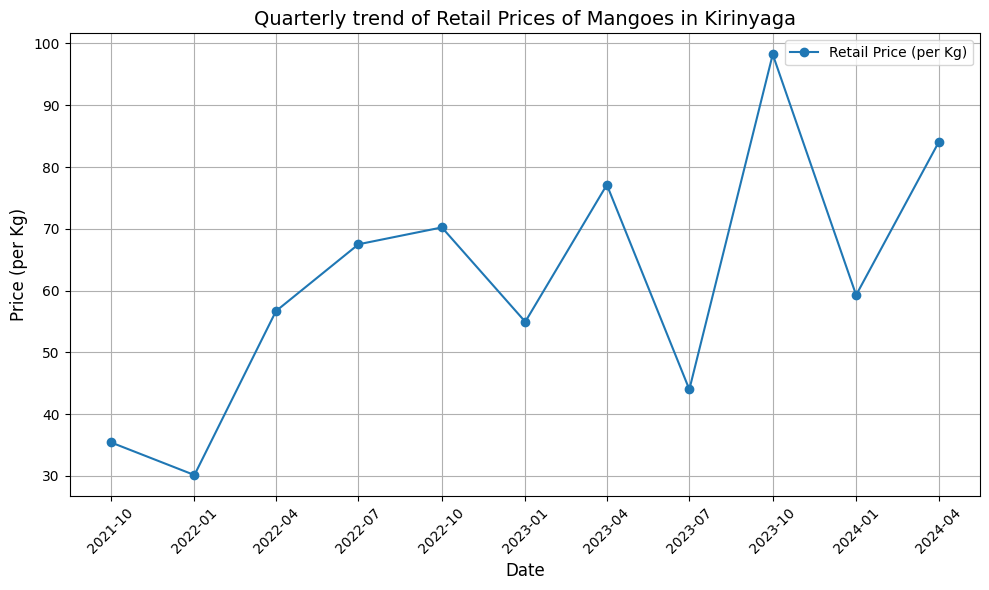

In [51]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_mangoes_Kirinyaga[(grouped_by_date_mangoes_Kirinyaga['County'] == 'Kirinyaga') & (grouped_by_date_mangoes_Kirinyaga['Commodity'] == 'Mangoes')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Quarter')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Quarter'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Quarterly trend of Retail Prices of Mangoes in Kirinyaga', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

## Ripe Bananas in Kirinyaga

###  Create new columns for Monthly trend of Ripe Bananas Retail Prices in Kirinyaga

In [52]:
##Banana (Ripening)

cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
#cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_ripe_Kirinyaga= cleaned_df.groupby(['County', 'Commodity','Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_ripe_Kirinyaga['Month'] = grouped_by_date_ripe_Kirinyaga['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_ripe_Kirinyaga)

         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


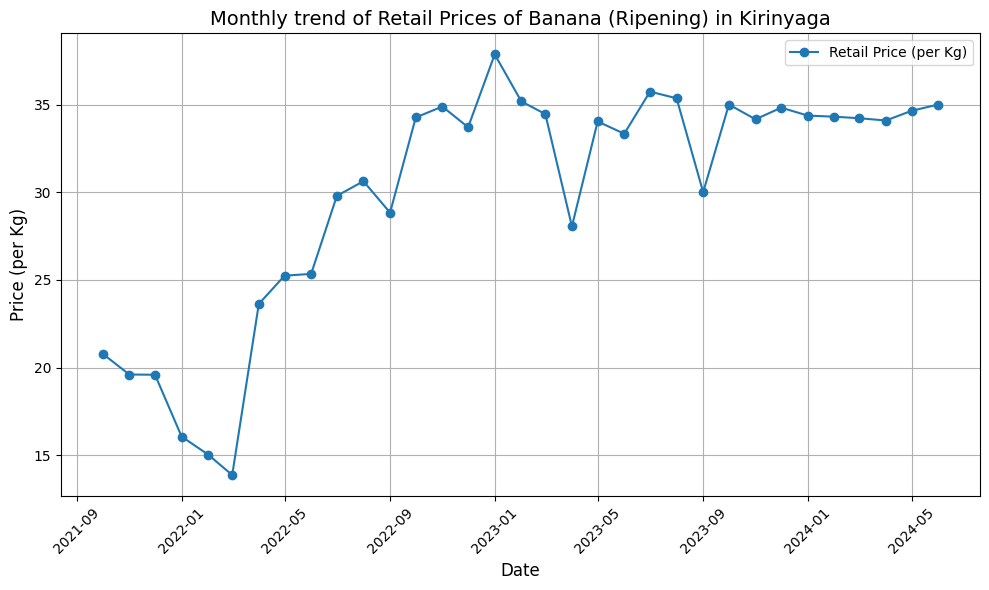

In [53]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_ripe_Kirinyaga[(grouped_by_date_ripe_Kirinyaga['County'] == 'Kirinyaga') & (grouped_by_date_ripe_Kirinyaga['Commodity'] == 'Banana (Ripening)')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of Banana (Ripening) in Kirinyaga', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

### So in summary, the ideal times for a seller to maximize their revenue would be to sell their bananas during the April/May and September/October peaks. 
### The least favorable times would be the January/February and July/August low price periods.

###  Create new columns for Quarterly trend of Ripe Bananas Retail Prices in Kirinyaga 

In [54]:
cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_ripe_Kirinyaga= cleaned_df.groupby(['County', 'Commodity','Quarter'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_ripe_Kirinyaga['Quarter'] = grouped_by_date_ripe_Kirinyaga['Quarter'].dt.to_timestamp()

# Show the result
print(grouped_by_date_ripe_Kirinyaga)

        County             Commodity    Quarter  Retail_per_kg
0    Kirinyaga      Banana (Cooking) 2021-10-01      23.615682
1    Kirinyaga      Banana (Cooking) 2022-01-01      24.259259
2    Kirinyaga      Banana (Cooking) 2022-04-01      23.416667
3    Kirinyaga      Banana (Cooking) 2022-07-01      25.156250
4    Kirinyaga      Banana (Cooking) 2022-10-01      29.038793
..         ...                   ...        ...            ...
523  Nyandarua  White Irish Potatoes 2022-10-01      45.250000
524  Nyandarua  White Irish Potatoes 2023-01-01      43.916087
525  Nyandarua  White Irish Potatoes 2023-04-01      56.823636
526  Nyandarua  White Irish Potatoes 2023-07-01      70.000000
527  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[528 rows x 4 columns]


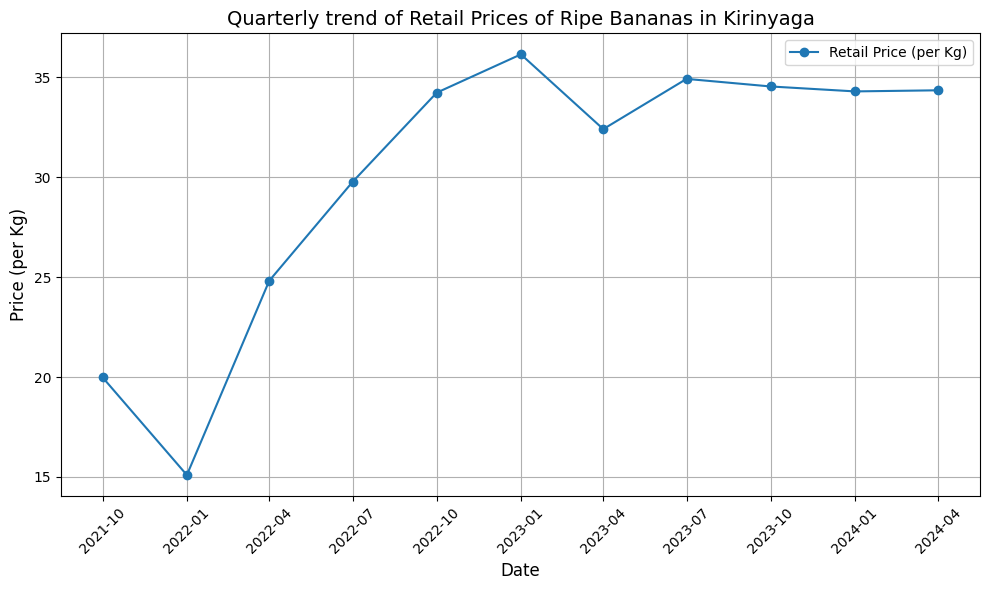

In [55]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_ripe_Kirinyaga[(grouped_by_date_ripe_Kirinyaga['County'] == 'Kirinyaga') & (grouped_by_date_ripe_Kirinyaga['Commodity'] == 'Banana (Ripening)')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Quarter')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Quarter'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Quarterly trend of Retail Prices of Ripe Bananas in Kirinyaga', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

## Kales in Kirinyaga

###  Create new columns for Monthly trend of Kales Retail Prices in Kirinyaga

In [56]:
cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
#cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_kales_Kirinyaga= cleaned_df.groupby(['County', 'Commodity','Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_kales_Kirinyaga['Month'] = grouped_by_date_kales_Kirinyaga['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_kales_Kirinyaga)

         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


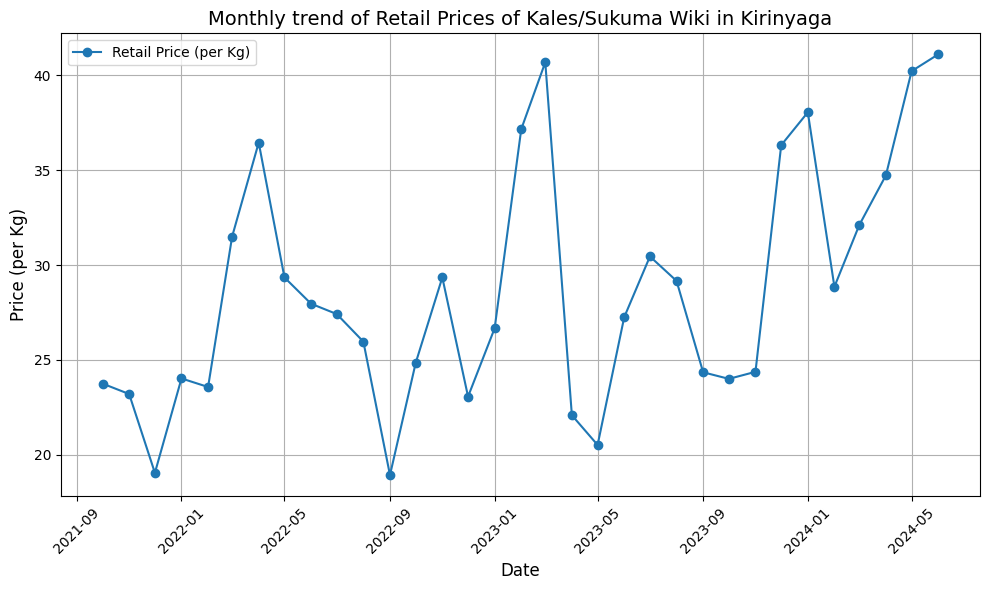

In [57]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_kales_Kirinyaga[(grouped_by_date_kales_Kirinyaga['County'] == 'Kirinyaga') & (grouped_by_date_kales_Kirinyaga['Commodity'] == 'Kales/Sukuma Wiki')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of Kales/Sukuma Wiki in Kirinyaga', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

### In summary, the worst time for a seller to purchase Kales/Sukuma Wiki in Kirinyaga would be during the mid-year period of June-August when prices are lowest. The best time would be during the December-January period when prices reach their annual peaks

###  Create new columns for Quarterly trend of Kales Retail Prices in Kirinyaga 

In [58]:
cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_kales_Kirinyaga= cleaned_df.groupby(['County', 'Commodity','Quarter'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_kales_Kirinyaga['Quarter'] = grouped_by_date_kales_Kirinyaga['Quarter'].dt.to_timestamp()

# Show the result
print(grouped_by_date_kales_Kirinyaga)

        County             Commodity    Quarter  Retail_per_kg
0    Kirinyaga      Banana (Cooking) 2021-10-01      23.615682
1    Kirinyaga      Banana (Cooking) 2022-01-01      24.259259
2    Kirinyaga      Banana (Cooking) 2022-04-01      23.416667
3    Kirinyaga      Banana (Cooking) 2022-07-01      25.156250
4    Kirinyaga      Banana (Cooking) 2022-10-01      29.038793
..         ...                   ...        ...            ...
523  Nyandarua  White Irish Potatoes 2022-10-01      45.250000
524  Nyandarua  White Irish Potatoes 2023-01-01      43.916087
525  Nyandarua  White Irish Potatoes 2023-04-01      56.823636
526  Nyandarua  White Irish Potatoes 2023-07-01      70.000000
527  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[528 rows x 4 columns]


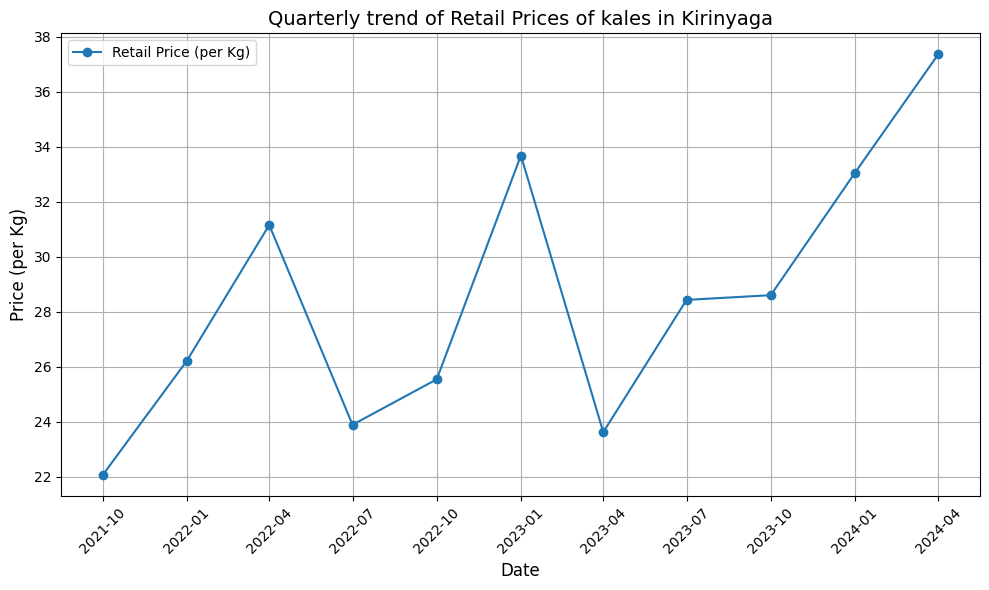

In [59]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_kales_Kirinyaga[(grouped_by_date_kales_Kirinyaga['County'] == 'Kirinyaga') & (grouped_by_date_kales_Kirinyaga['Commodity'] == 'Kales/Sukuma Wiki')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Quarter')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Quarter'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Quarterly trend of Retail Prices of kales in Kirinyaga', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

#### In summary, the quarterly trend graph corroborates the insights from the previous monthly graph, revealing the seasonal nature of kale prices in Kirinyaga, as well as the overall upward trajectory over the past couple of years. 


## Regular Spinach in Kirinyaga

###  Create new columns for Monthly trend of Regular Spinach Retail Prices in Kirinyaga

In [60]:
cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
#cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_regularspinach_Kirinyaga= cleaned_df.groupby(['County', 'Commodity','Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_regularspinach_Kirinyaga['Month'] = grouped_by_date_regularspinach_Kirinyaga['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_regularspinach_Kirinyaga)

         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


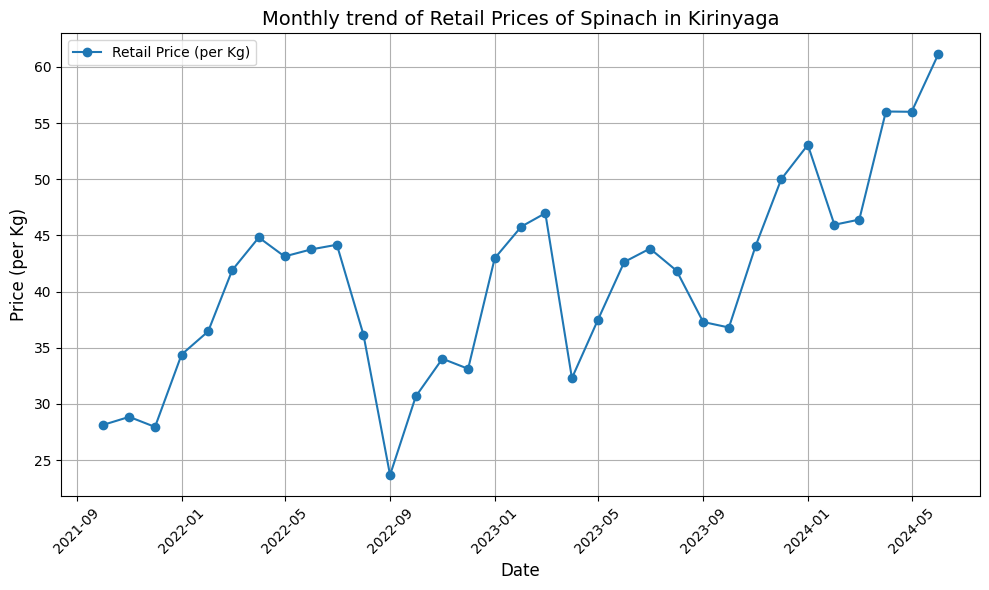

In [61]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_regularspinach_Kirinyaga[(grouped_by_date_regularspinach_Kirinyaga['County'] == 'Kirinyaga') & (grouped_by_date_regularspinach_Kirinyaga['Commodity'] == 'Spinach')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of Spinach in Kirinyaga', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

#### In summary, the worst time for a seller to purchase spinach in Kirinyaga would be during the March-May period when prices are lowest. 
#### The best time would be in the September-November period when prices spike to their annual highs.

## The Top prized Markets in Kirinyaga County

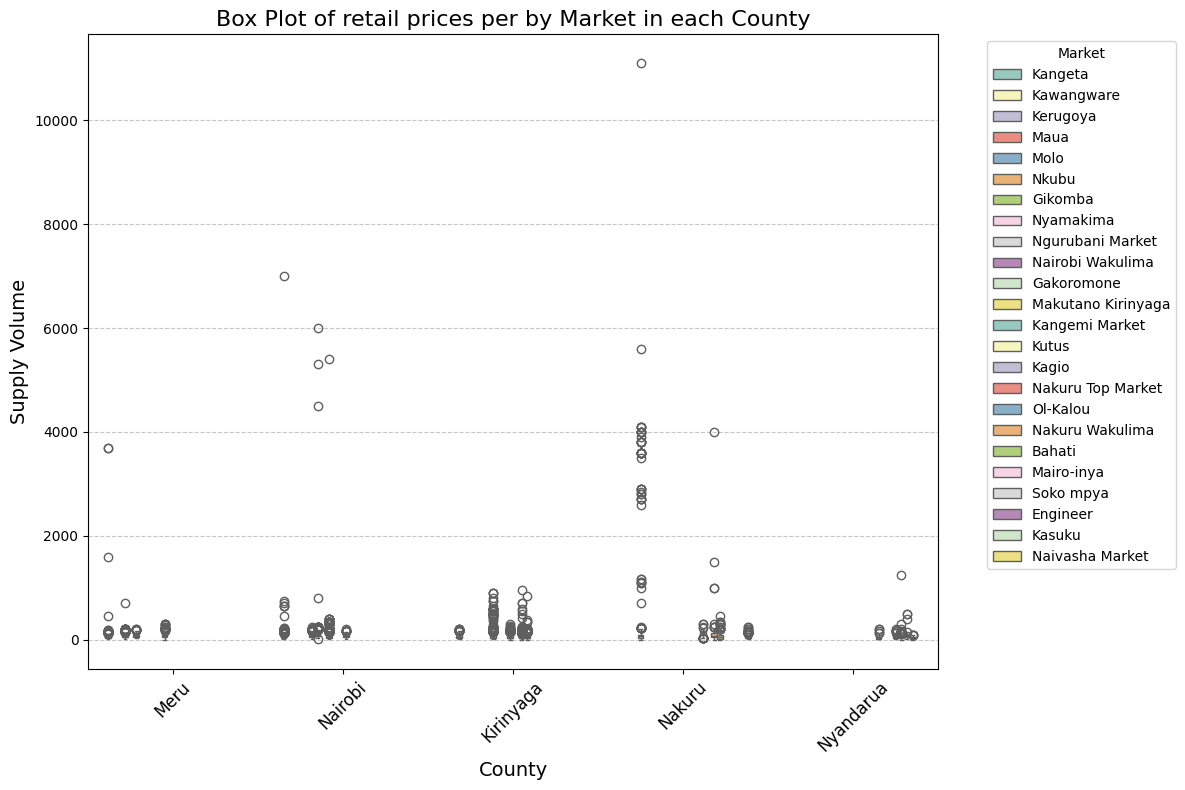

In [62]:
# Replace 'your_dataset.csv' with the path to your data file
data = combined_df

# Create a box plot for supply volumes grouped by markets within counties
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='County', y='Retail_per_kg', hue='Market', palette='Set3')

# Customize the plot
plt.title("Box Plot of retail prices per by Market in each County", fontsize=16)
plt.xlabel("County", fontsize=14)
plt.ylabel("Supply Volume", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title="Market", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

### Filter the retail price in terms of county

C:\Users\Jordan Gamba\AppData\Local\Temp\ipykernel_6948\2729646029.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, x='Market', y='Retail_per_kg', palette='Set2')


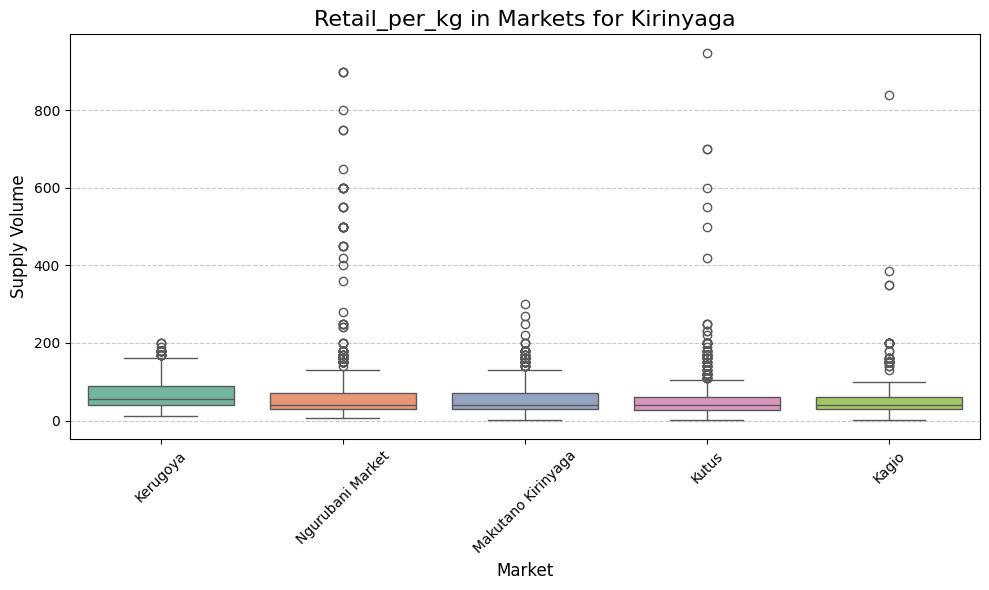

In [63]:
# Filter the data for a specific county
county_name = "Kirinyaga"  # Replace with the desired county name
filtered_data = data[data['County'] == county_name]

# Create the box plot for supply volumes in all markets within the county
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data, x='Market', y='Retail_per_kg', palette='Set2')

# Customize the plot
plt.title(f"Retail_per_kg in Markets for {county_name}", fontsize=16)
plt.xlabel("Market", fontsize=12)
plt.ylabel("Supply Volume", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

### Detect and remove the outliers

C:\Users\Jordan Gamba\AppData\Local\Temp\ipykernel_6948\3771393219.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data_no_outliers, x='Market', y='Retail_per_kg', palette='Set2')


Cleaned Retail_per_kg (Without Outliers):
                 Market  Retail_per_kg
16             Kerugoya          60.00
17             Kerugoya          40.00
18             Kerugoya         100.00
19             Kerugoya          40.00
20             Kerugoya          65.00
...                 ...            ...
35995  Ngurubani Market          25.00
35996  Ngurubani Market          25.00
35997  Ngurubani Market          40.00
35998  Ngurubani Market          33.33
35999  Ngurubani Market          90.00

[8142 rows x 2 columns]


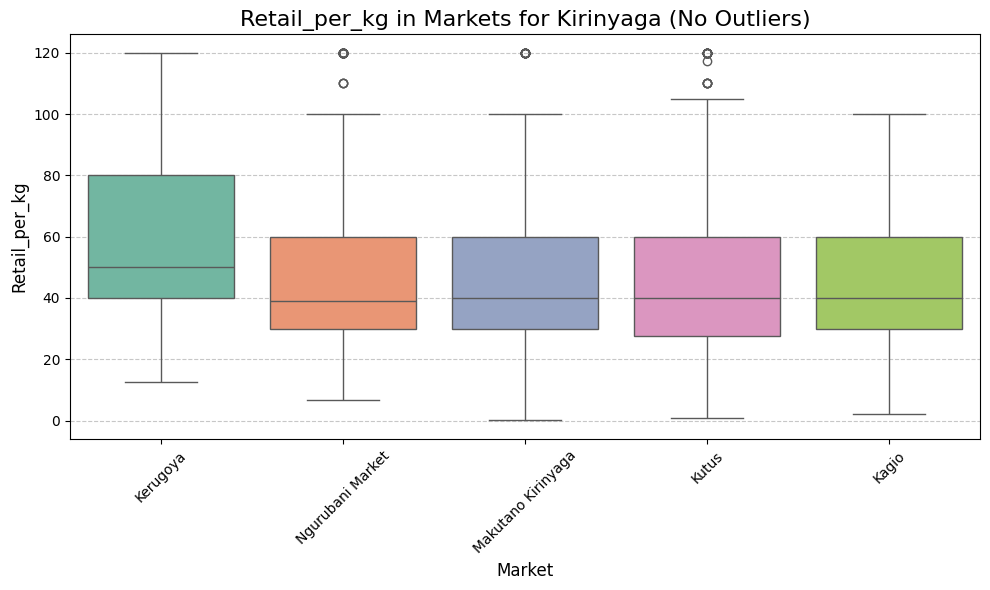

In [ ]:
county_name = "Kirinyaga"  # Replace with the desired county name
filtered_data = combined_df[combined_df['County'] == county_name]

# Remove outliers for Supply Volume
Q1 = filtered_data['Retail_per_kg'].quantile(0.25)
Q3 = filtered_data['Retail_per_kg'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data to remove outliers
filtered_data_no_outliers = filtered_data[
    (filtered_data['Retail_per_kg'] >= lower_bound) & 
    (filtered_data['Retail_per_kg'] <= upper_bound)
]

# Create the box plot for supply volumes in all markets within the county (no outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data_no_outliers, x='Market', y='Retail_per_kg', palette='Set2')

# Customize the plot
plt.title(f"Retail_per_kg in Markets for {county_name} (No Outliers)", fontsize=16)
plt.xlabel("Market", fontsize=12)
plt.ylabel("Retail_per_kg", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Display the cleaned supply volumes
print("Cleaned Retail_per_kg (Without Outliers):")
print(filtered_data_no_outliers[['Market', 'Retail_per_kg']])

# Show the plot
plt.tight_layout()
plt.show()

In [65]:
# Group the filtered data (without outliers) by Market and calculate the total Supply Volume
market_supply_totals = (
    filtered_data_no_outliers.groupby('Market')['Retail_per_kg']
    .sum()
    .sort_values(ascending=False)
)

# Get the top three markets
top_three_markets = market_supply_totals.head(3)

# Display the results
print("Top Three Markets by Supply Volume (No Outliers):")
print(top_three_markets)

Top Three Markets by Supply Volume (No Outliers):
Market
Ngurubani Market    103370.21
Kagio                84247.85
Kutus                78287.68
Name: Retail_per_kg, dtype: float64


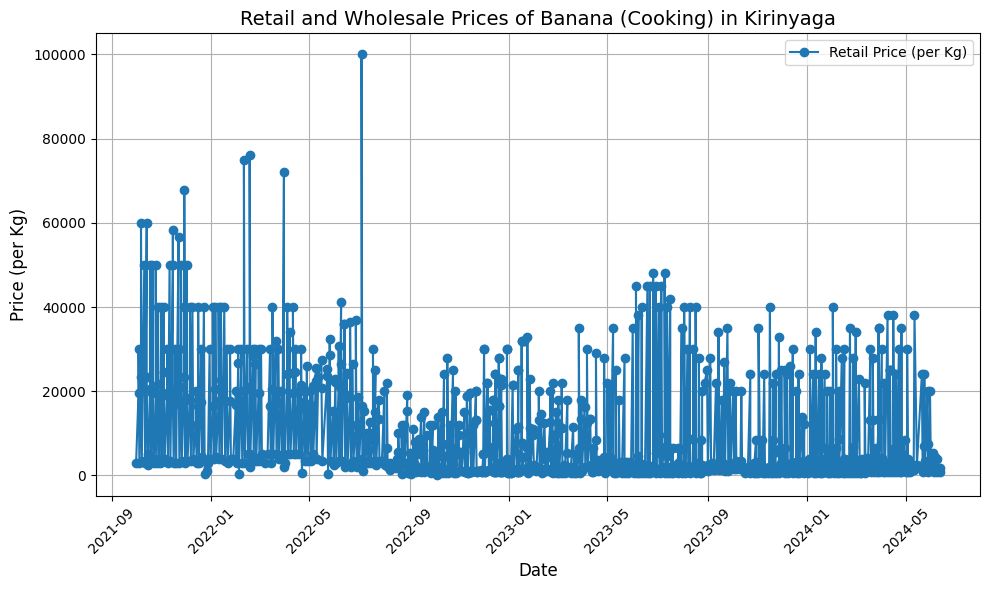

In [66]:
### Plot the box plot of Supply Volume
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = combined_df[(combined_df['County'] == 'Kirinyaga') & (combined_df['Commodity'] == 'Banana (Cooking)')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Date')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Date'], filtered_df['Supply Volume'], label='Retail Price (per Kg)', marker='o')
# plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Retail and Wholesale Prices of Banana (Cooking) in Kirinyaga', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

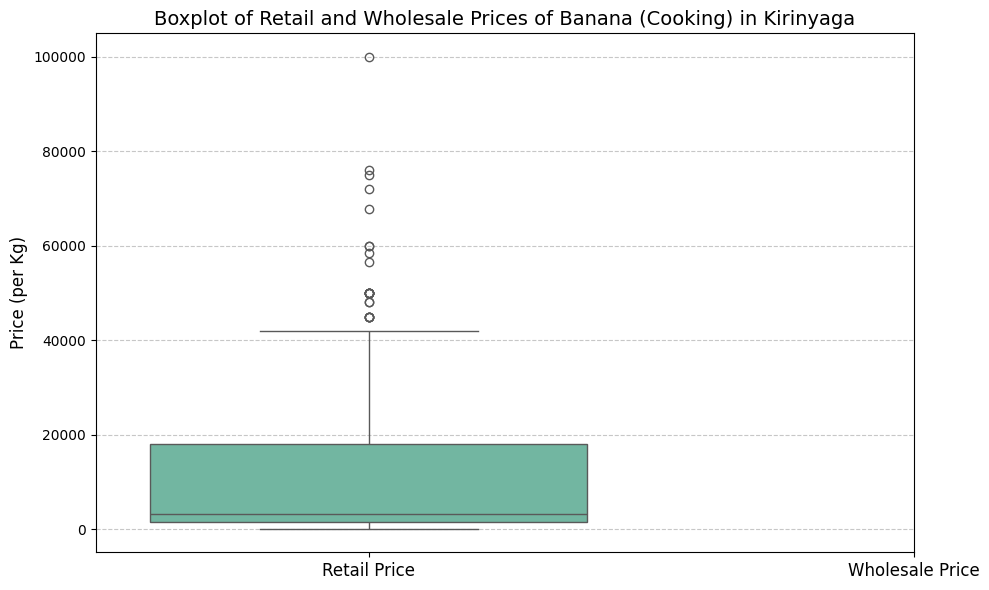

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df[['Supply Volume']], palette='Set2')

# Customize the plot
plt.title('Boxplot of Retail and Wholesale Prices of Banana (Cooking) in Kirinyaga', fontsize=14)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Retail Price', 'Wholesale Price'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [68]:




import numpy as np
outliers = []
def detect_outliers_iqr(data):
    data= data.dropna()
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(filtered_df['Supply Volume'])
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [45000.0, 45000.0, 45000.0, 45000.0, 45000.0, 48000.0, 48000.0, 50000.0, 50000.0, 50000.0, 50000.0, 50000.0, 50000.0, 50000.0, 50000.0, 56600.0, 58400.0, 60000.0, 60000.0, 67800.0, 72000.0, 75000.0, 76000.0, 100000.0]


# Meru

## Dry Maize in Meru

###  Create new columns for Monthly trend of Dry Maize Retail Prices in Meru

In [69]:
# Create new columns for month and quarter
cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
#cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_drymaize_Meru= cleaned_df.groupby(['County', 'Commodity', 'Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_drymaize_Meru['Month'] = grouped_by_date_drymaize_Meru['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_drymaize_Meru)

         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


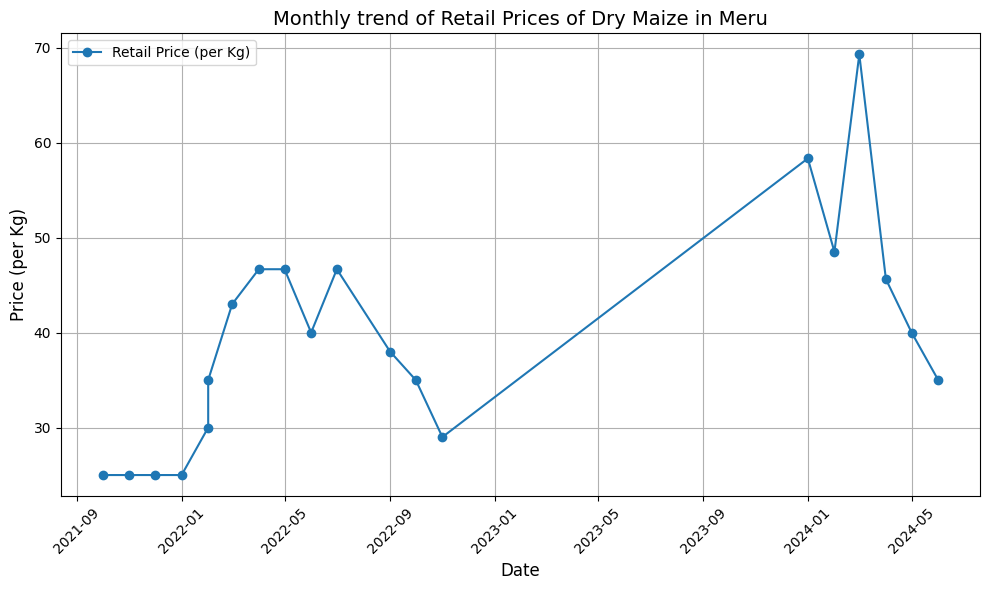

In [70]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_drymaize_Meru[(grouped_by_date_drymaize_Meru['County'] == 'Meru') & (grouped_by_date_drymaize_Kirinyaga['Commodity'] == 'Dry Maize')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of Dry Maize in Meru', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

### In summary, the  worst time for a seller to purchase dry maize in Meru would be during the July-September period when prices are lowest. 
### The best time would be in the January-March period when prices spike to their annual highs.

###  Create new columns for Quarterly trend of Dry Mazie Retail Prices in Meru

In [71]:
cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_drymaize_Meru= cleaned_df.groupby(['County', 'Commodity','Quarter'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_drymaize_Meru['Quarter'] = grouped_by_date_drymaize_Meru['Quarter'].dt.to_timestamp()

# Show the result
print(grouped_by_date_drymaize_Meru)

        County             Commodity    Quarter  Retail_per_kg
0    Kirinyaga      Banana (Cooking) 2021-10-01      23.615682
1    Kirinyaga      Banana (Cooking) 2022-01-01      24.259259
2    Kirinyaga      Banana (Cooking) 2022-04-01      23.416667
3    Kirinyaga      Banana (Cooking) 2022-07-01      25.156250
4    Kirinyaga      Banana (Cooking) 2022-10-01      29.038793
..         ...                   ...        ...            ...
523  Nyandarua  White Irish Potatoes 2022-10-01      45.250000
524  Nyandarua  White Irish Potatoes 2023-01-01      43.916087
525  Nyandarua  White Irish Potatoes 2023-04-01      56.823636
526  Nyandarua  White Irish Potatoes 2023-07-01      70.000000
527  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[528 rows x 4 columns]


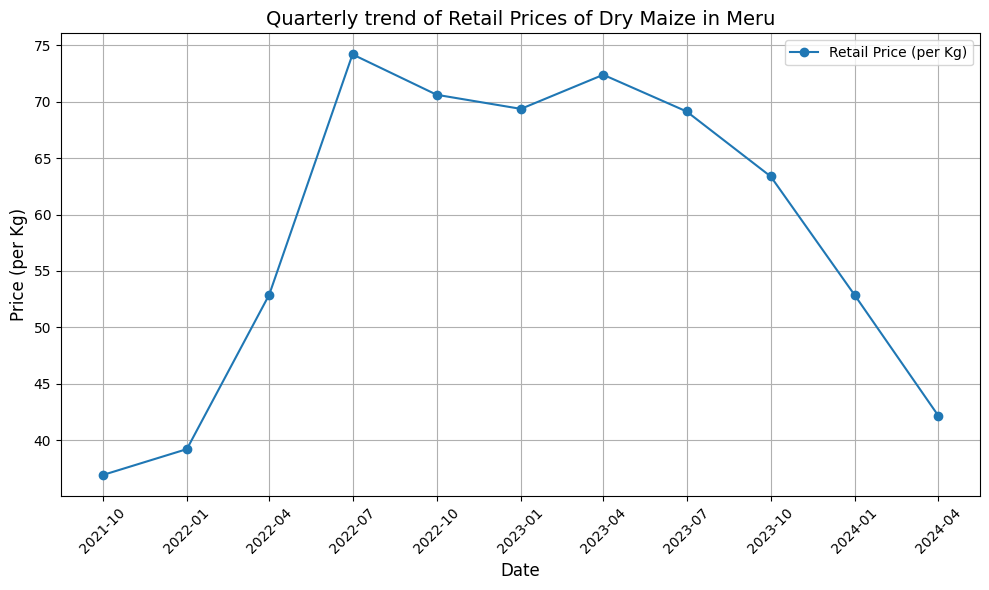

In [72]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_drymaize_Meru[(grouped_by_date_drymaize_Meru['County'] == 'Meru') & (grouped_by_date_ripe_Kirinyaga['Commodity'] == 'Dry Maize')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Quarter')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Quarter'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Quarterly trend of Retail Prices of Dry Maize in Meru', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

### So the key seasonal trends and price movements shown in the monthly graph are corroborated by the quarterly data visualization. 
### The quarterly view simply smoothens out some of the shorter-term volatility present in the monthly data

## Bananas Cooking in Meru

###  Create new columns for Monthly trend of Dry Maize Retail Prices in Meru

In [73]:
# Create new columns for month and quarter
cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
#cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_bananascook_Meru= cleaned_df.groupby(['County', 'Commodity', 'Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_bananascook_Meru['Month'] = grouped_by_date_bananascook_Meru['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_bananascook_Meru)

         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


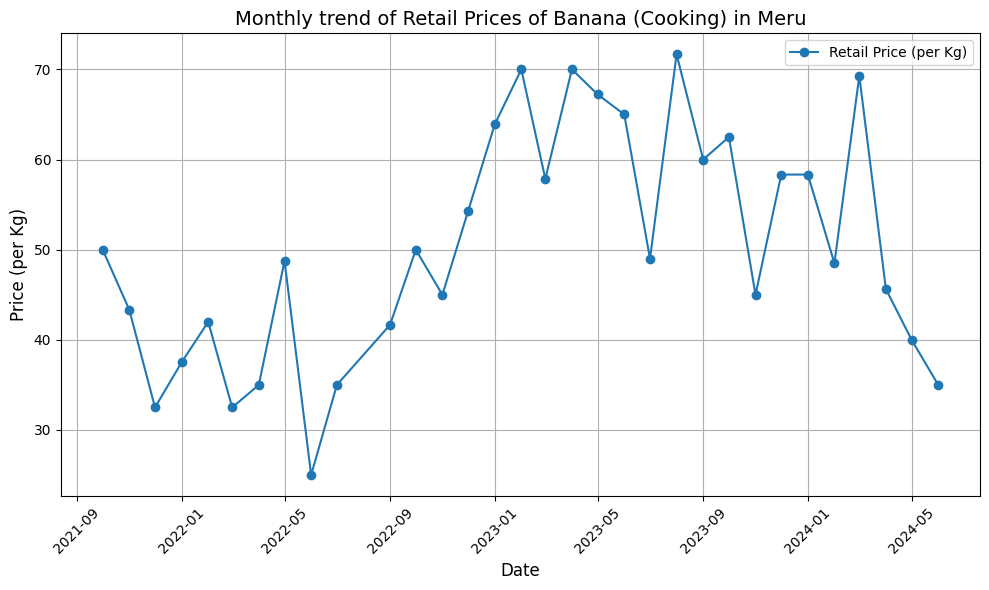

In [74]:
import matplotlib.pyplot as plt
# Banana (Cooking)

# Filter the DataFrame
filtered_df = grouped_by_date_bananascook_Meru[(grouped_by_date_bananascook_Meru['County'] == 'Meru') & (grouped_by_date_bananascook_Meru['Commodity'] == 'Banana (Cooking)')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of Banana (Cooking) in Meru', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

### In summary, the worst time for a seller to sell cooking bananas in Meru would be during the April-June period when prices are lowest. 
### The best time would be in the September-November period when prices climb to their annual highs.

###  Create new columns for Quarterly trend of Dry Maize Retail Prices in Meru

In [75]:
cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_drymaize_Meru= cleaned_df.groupby(['County', 'Commodity','Quarter'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_drymaize_Meru['Quarter'] = grouped_by_date_drymaize_Meru['Quarter'].dt.to_timestamp()

# Show the result
print(grouped_by_date_drymaize_Meru)

        County             Commodity    Quarter  Retail_per_kg
0    Kirinyaga      Banana (Cooking) 2021-10-01      23.615682
1    Kirinyaga      Banana (Cooking) 2022-01-01      24.259259
2    Kirinyaga      Banana (Cooking) 2022-04-01      23.416667
3    Kirinyaga      Banana (Cooking) 2022-07-01      25.156250
4    Kirinyaga      Banana (Cooking) 2022-10-01      29.038793
..         ...                   ...        ...            ...
523  Nyandarua  White Irish Potatoes 2022-10-01      45.250000
524  Nyandarua  White Irish Potatoes 2023-01-01      43.916087
525  Nyandarua  White Irish Potatoes 2023-04-01      56.823636
526  Nyandarua  White Irish Potatoes 2023-07-01      70.000000
527  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[528 rows x 4 columns]


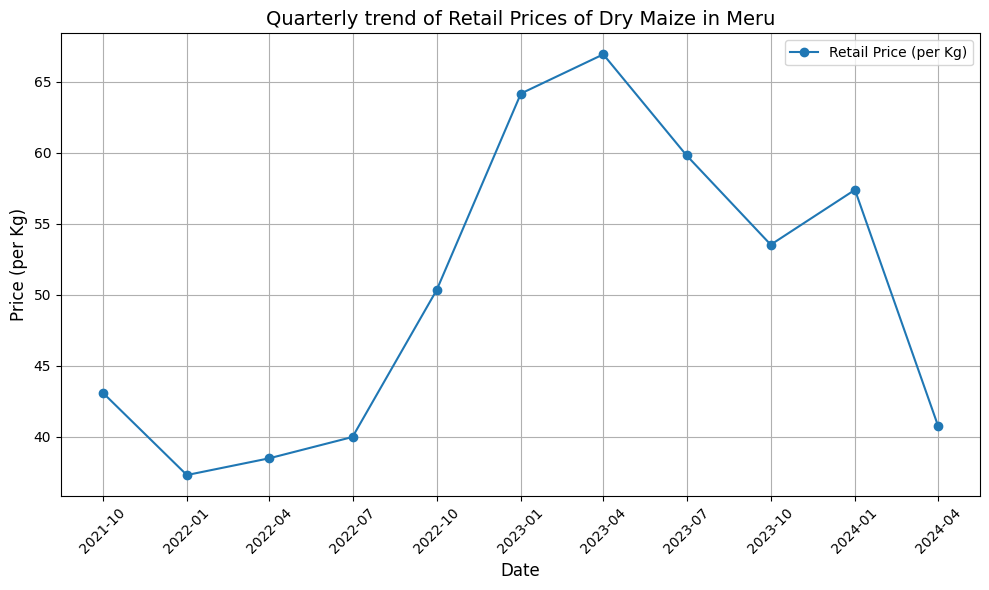

In [76]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_drymaize_Meru[(grouped_by_date_drymaize_Meru['County'] == 'Meru') & (grouped_by_date_drymaize_Meru['Commodity'] == 'Banana (Cooking)')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Quarter')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Quarter'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Quarterly trend of Retail Prices of Dry Maize in Meru', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

## White Irish Potatoes in Meru

###  Create new columns for Monthly trend of White Irish Potatoes Retail Prices in Meru

In [77]:
# Create new columns for month and quarter
cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
#cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_whiteirish_Meru= cleaned_df.groupby(['County', 'Commodity', 'Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_whiteirish_Meru['Month'] = grouped_by_date_whiteirish_Meru['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_whiteirish_Meru)

         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


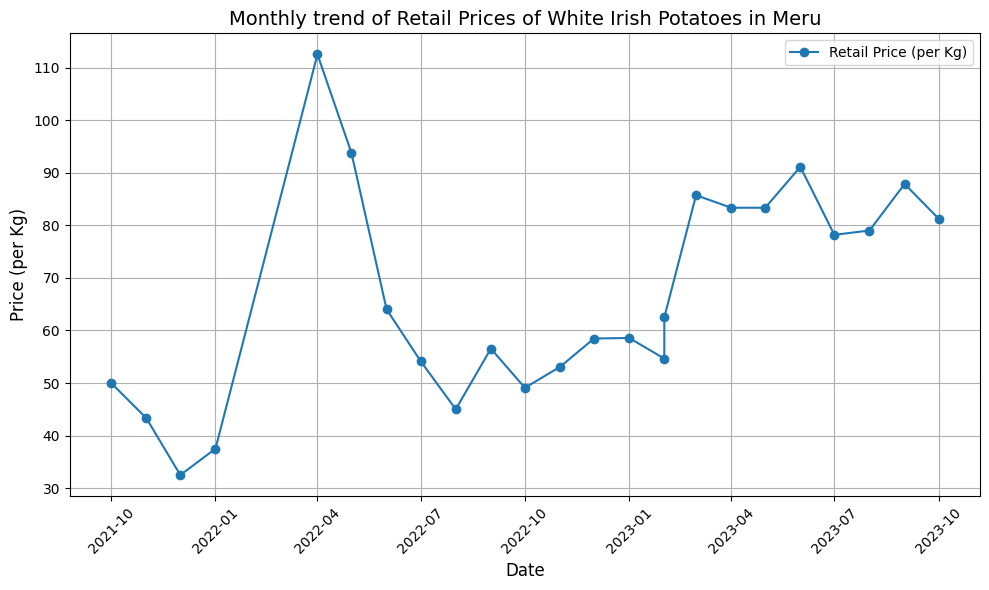

In [78]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_whiteirish_Meru[(grouped_by_date_whiteirish_Meru['County'] == 'Meru') & (grouped_by_date_ripe_Kirinyaga['Commodity'] == 'White Irish Potatoes')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of White Irish Potatoes in Meru', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

### In summary, the worst time for a seller to purchase white Irish potatoes in Meru would be during the June-August period when prices are lowest. 
### The best time would be in the November-January period when prices climb to their annual highs

###  Create new columns for Quarterly trend of White Irish Retail Prices in Meru

In [79]:
cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_whiteirish_Meru= cleaned_df.groupby(['County', 'Commodity','Quarter'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_whiteirish_Meru['Quarter'] = grouped_by_date_whiteirish_Meru['Quarter'].dt.to_timestamp()

# Show the result
print(grouped_by_date_whiteirish_Meru)

        County             Commodity    Quarter  Retail_per_kg
0    Kirinyaga      Banana (Cooking) 2021-10-01      23.615682
1    Kirinyaga      Banana (Cooking) 2022-01-01      24.259259
2    Kirinyaga      Banana (Cooking) 2022-04-01      23.416667
3    Kirinyaga      Banana (Cooking) 2022-07-01      25.156250
4    Kirinyaga      Banana (Cooking) 2022-10-01      29.038793
..         ...                   ...        ...            ...
523  Nyandarua  White Irish Potatoes 2022-10-01      45.250000
524  Nyandarua  White Irish Potatoes 2023-01-01      43.916087
525  Nyandarua  White Irish Potatoes 2023-04-01      56.823636
526  Nyandarua  White Irish Potatoes 2023-07-01      70.000000
527  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[528 rows x 4 columns]


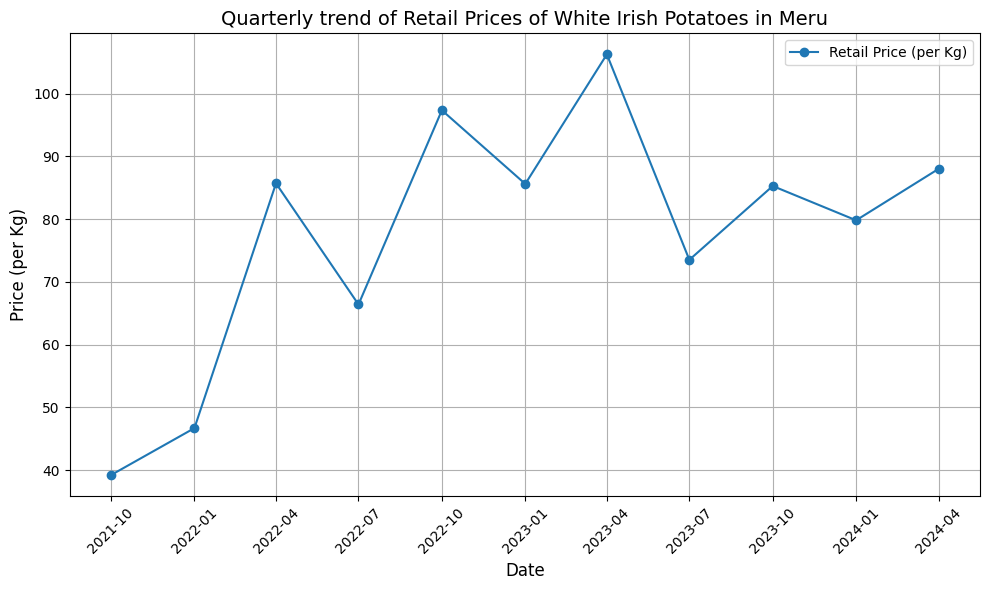

In [80]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_whiteirish_Meru[(grouped_by_date_whiteirish_Meru['County'] == 'Meru') & (grouped_by_date_whiteirish_Kirinyaga['Commodity'] == 'White Irish Potatoes')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Quarter')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Quarter'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Quarterly trend of Retail Prices of White Irish Potatoes in Meru', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

## Dry Onions in Meru

###  Create new columns for Monthly trend of Dry Onions Retail Prices in Meru

In [81]:
# Create new columns for month and quarter
cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
#cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_dryonions_Meru= cleaned_df.groupby(['County', 'Commodity', 'Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_dryonions_Meru['Month'] = grouped_by_date_dryonions_Meru['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_dryonions_Meru)

         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


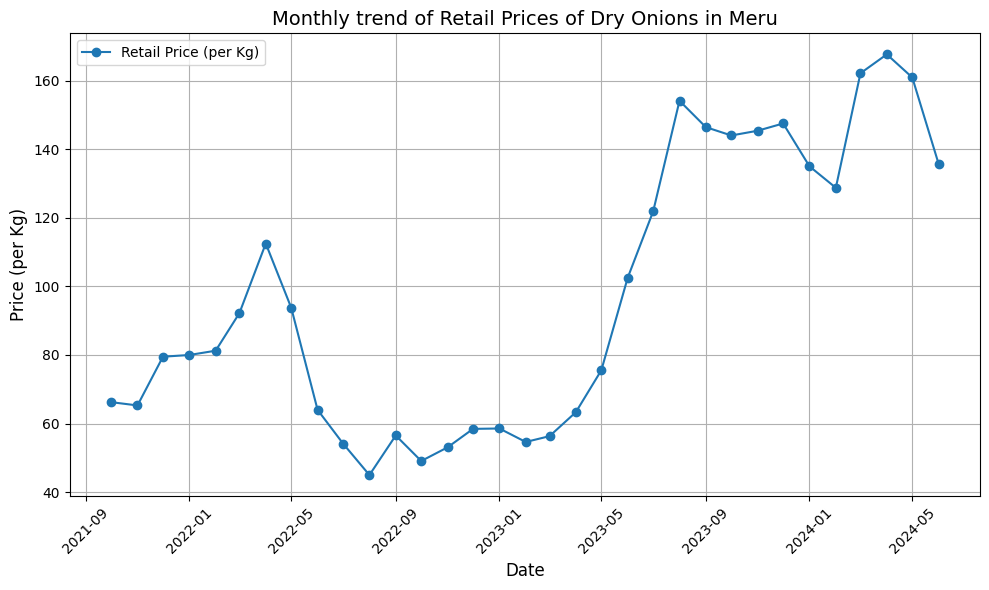

In [82]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_dryonions_Meru[(grouped_by_date_dryonions_Meru['County'] == 'Meru') & (grouped_by_date_dryonions_Meru['Commodity'] == 'Dry Onions')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of Dry Onions in Meru', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

### In summary, the worst time for a seller to purchase dry onions in Meru would be during the April-June period when prices are lowest. 
### The best time would be in the December-February period when prices climb to their annual highs.

###  Create new columns for Quarterly trend of Dry Onions Retail Prices in Meru

In [83]:
cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_dryonions_Meru= cleaned_df.groupby(['County', 'Commodity','Quarter'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_dryonions_Meru['Quarter'] = grouped_by_date_dryonions_Meru['Quarter'].dt.to_timestamp()

# Show the result
print(grouped_by_date_dryonions_Meru)

        County             Commodity    Quarter  Retail_per_kg
0    Kirinyaga      Banana (Cooking) 2021-10-01      23.615682
1    Kirinyaga      Banana (Cooking) 2022-01-01      24.259259
2    Kirinyaga      Banana (Cooking) 2022-04-01      23.416667
3    Kirinyaga      Banana (Cooking) 2022-07-01      25.156250
4    Kirinyaga      Banana (Cooking) 2022-10-01      29.038793
..         ...                   ...        ...            ...
523  Nyandarua  White Irish Potatoes 2022-10-01      45.250000
524  Nyandarua  White Irish Potatoes 2023-01-01      43.916087
525  Nyandarua  White Irish Potatoes 2023-04-01      56.823636
526  Nyandarua  White Irish Potatoes 2023-07-01      70.000000
527  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[528 rows x 4 columns]


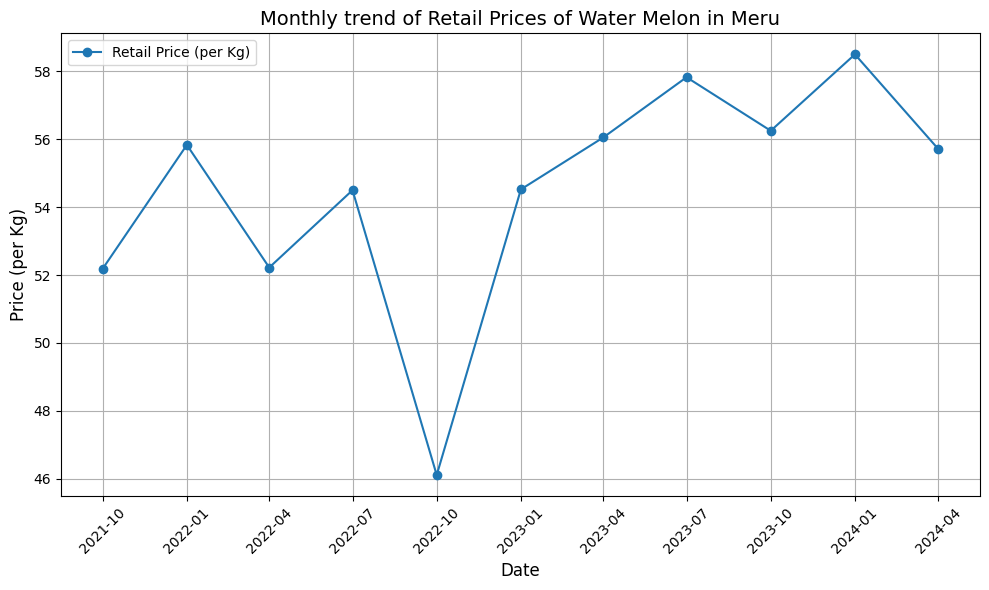

In [84]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_dryonions_Meru[(grouped_by_date_dryonions_Meru['County'] == 'Meru') & (grouped_by_date_dryonions_Kirinyaga['Commodity'] == 'Water Melon')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Quarter')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Quarter'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of Water Melon in Meru', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

## Water Melons in Meru

###  Create new columns for Monthly trend of Water Melons Retail Prices in Meru

In [85]:
# Create new columns for month and quarter
cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
#cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_watermelons_Meru= cleaned_df.groupby(['County', 'Commodity', 'Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_watermelons_Meru['Month'] = grouped_by_date_watermelons_Meru['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_watermelons_Meru)

         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


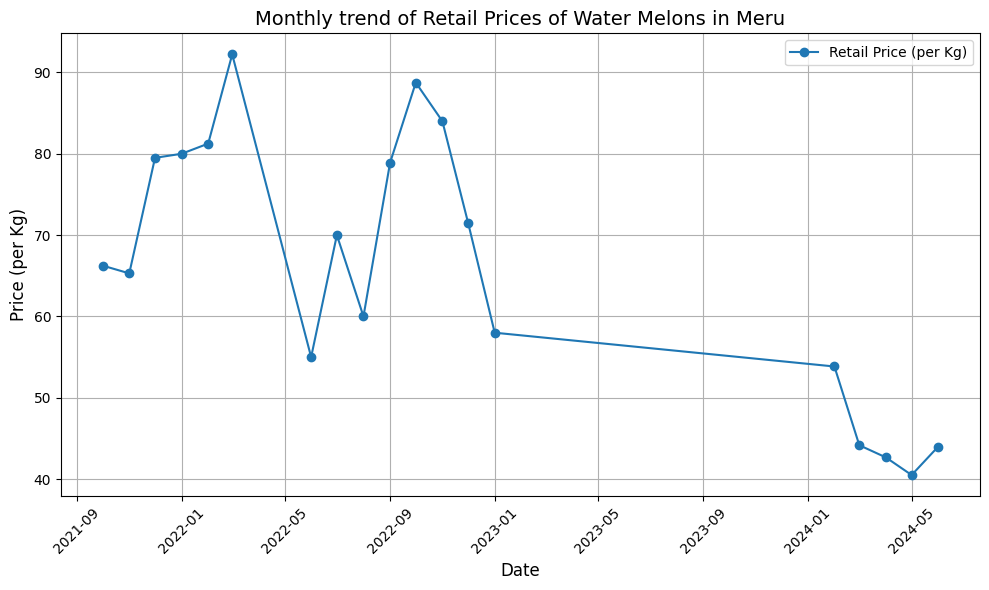

In [86]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_watermelons_Meru[(grouped_by_date_watermelons_Meru['County'] == 'Meru') & (grouped_by_date_watermelons_Kirinyaga['Commodity'] == 'Water Melon')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of Water Melons in Meru', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

### the ideal selling times for a watermelon seller in Meru would be the February/March and July/August peak periods when prices are highest 

### least favorable times would be the May/June and December low price periods


###  Create new columns for Quarterly trend of Water Melon Prices in Meru

In [87]:
cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_watermelon_Meru= cleaned_df.groupby(['County', 'Commodity','Quarter'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_watermelon_Meru['Quarter'] = grouped_by_date_watermelon_Meru['Quarter'].dt.to_timestamp()

# Show the result
print(grouped_by_date_watermelon_Meru)

        County             Commodity    Quarter  Retail_per_kg
0    Kirinyaga      Banana (Cooking) 2021-10-01      23.615682
1    Kirinyaga      Banana (Cooking) 2022-01-01      24.259259
2    Kirinyaga      Banana (Cooking) 2022-04-01      23.416667
3    Kirinyaga      Banana (Cooking) 2022-07-01      25.156250
4    Kirinyaga      Banana (Cooking) 2022-10-01      29.038793
..         ...                   ...        ...            ...
523  Nyandarua  White Irish Potatoes 2022-10-01      45.250000
524  Nyandarua  White Irish Potatoes 2023-01-01      43.916087
525  Nyandarua  White Irish Potatoes 2023-04-01      56.823636
526  Nyandarua  White Irish Potatoes 2023-07-01      70.000000
527  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[528 rows x 4 columns]


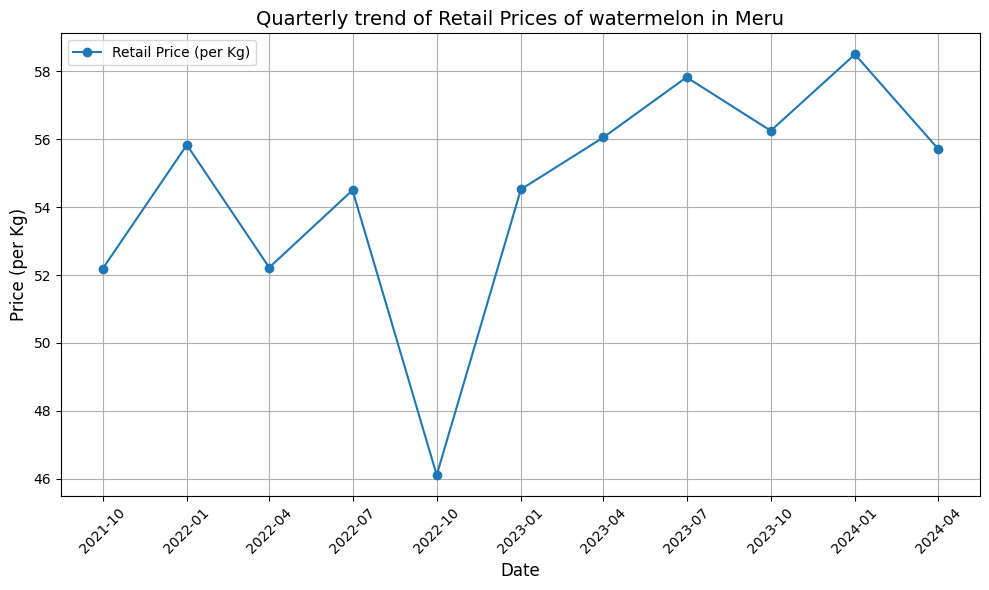

In [88]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_watermelon_Meru[(grouped_by_date_watermelon_Meru['County'] == 'Meru') & (grouped_by_date_watermelon_Meru['Commodity'] == 'Water Melon')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Quarter')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Quarter'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Quarterly trend of Retail Prices of watermelon in Meru', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

## Mangoes in Meru

###  Create new columns for Monthly trend of Mangoes Retail Prices in Meru

In [89]:
# Create new columns for month and quarter
cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
#cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_mangoes_Meru= cleaned_df.groupby(['County', 'Commodity', 'Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_mangoes_Meru['Month'] = grouped_by_date_mangoes_Meru['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_mangoes_Meru)

         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


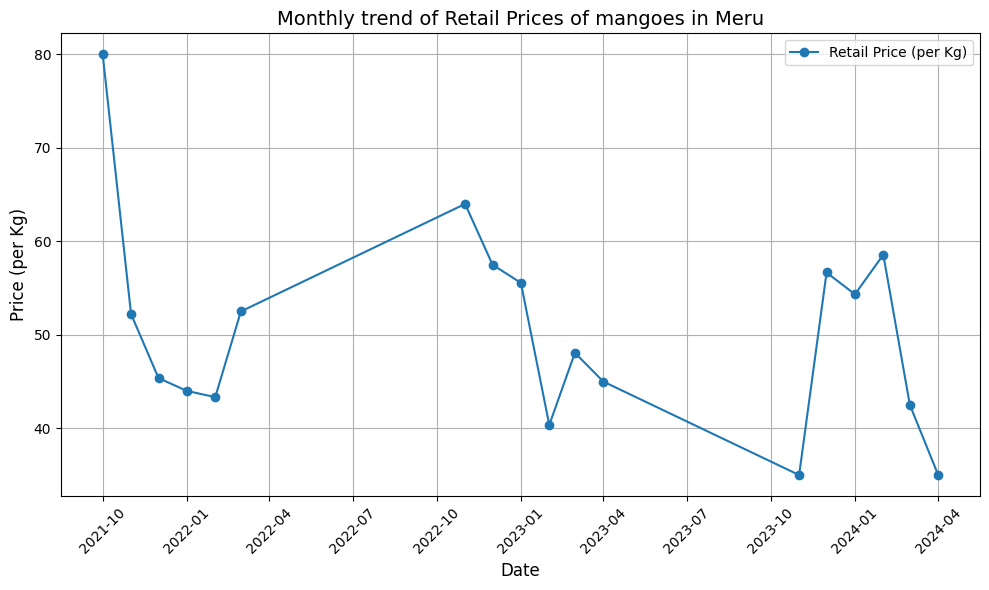

In [90]:
import matplotlib.pyplot as plt
# Banana (Cooking)

# Filter the DataFrame
filtered_df = grouped_by_date_mangoes_Meru[(grouped_by_date_mangoes_Meru['County'] == 'Meru') & (grouped_by_date_mangoes_Meru['Commodity'] == 'Mangoes')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of mangoes in Meru', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


### In summary, a seller would  want to time their mango sell during the low price periods, particularly in the March-April and January-February timeframes, 
### worst periods in the middle of the year would also be advised

###  Create new columns for Quarterly trend of Mangoes Retail Prices in Meru

In [91]:
cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_mangoes_Meru= cleaned_df.groupby(['County', 'Commodity','Quarter'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_mangoes_Meru['Quarter'] = grouped_by_date_mangoes_Meru['Quarter'].dt.to_timestamp()

# Show the result
print(grouped_by_date_mangoes_Meru)

        County             Commodity    Quarter  Retail_per_kg
0    Kirinyaga      Banana (Cooking) 2021-10-01      23.615682
1    Kirinyaga      Banana (Cooking) 2022-01-01      24.259259
2    Kirinyaga      Banana (Cooking) 2022-04-01      23.416667
3    Kirinyaga      Banana (Cooking) 2022-07-01      25.156250
4    Kirinyaga      Banana (Cooking) 2022-10-01      29.038793
..         ...                   ...        ...            ...
523  Nyandarua  White Irish Potatoes 2022-10-01      45.250000
524  Nyandarua  White Irish Potatoes 2023-01-01      43.916087
525  Nyandarua  White Irish Potatoes 2023-04-01      56.823636
526  Nyandarua  White Irish Potatoes 2023-07-01      70.000000
527  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[528 rows x 4 columns]


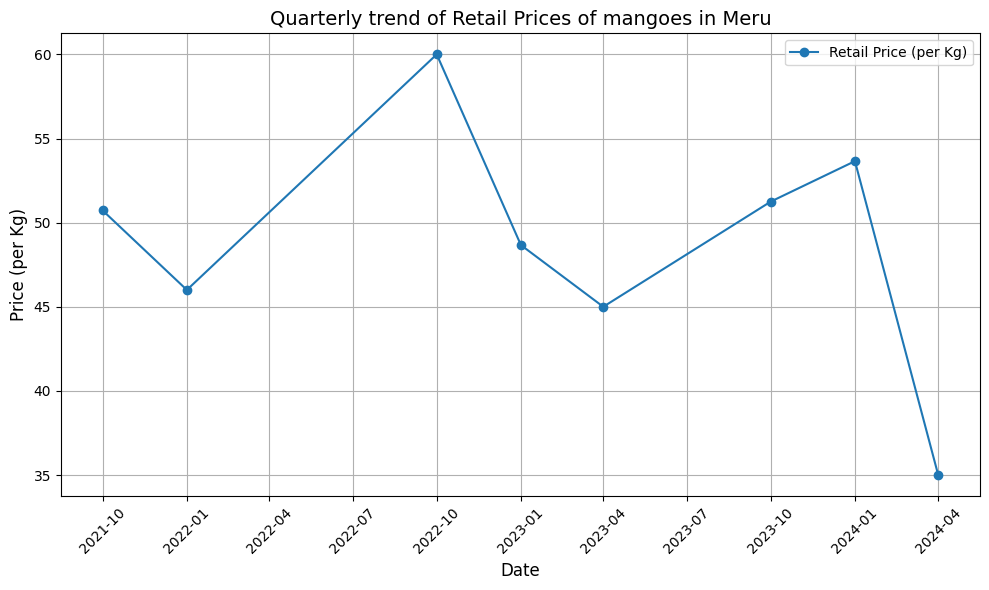

In [92]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_mangoes_Meru[(grouped_by_date_mangoes_Meru['County'] == 'Meru') & (grouped_by_date_mangoes_Kirinyaga['Commodity'] == 'Mangoes')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Quarter')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Quarter'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Quarterly trend of Retail Prices of mangoes in Meru', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

## Ripe Bananas in Meru

###  Create new columns for Monthly trend of Ripe Bananas Retail Prices in Meru

In [93]:
# Create new columns for month and quarter
cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
#cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_ripe_Meru= cleaned_df.groupby(['County', 'Commodity', 'Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_ripe_Meru['Month'] = grouped_by_date_ripe_Meru['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_ripe_Meru)

         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


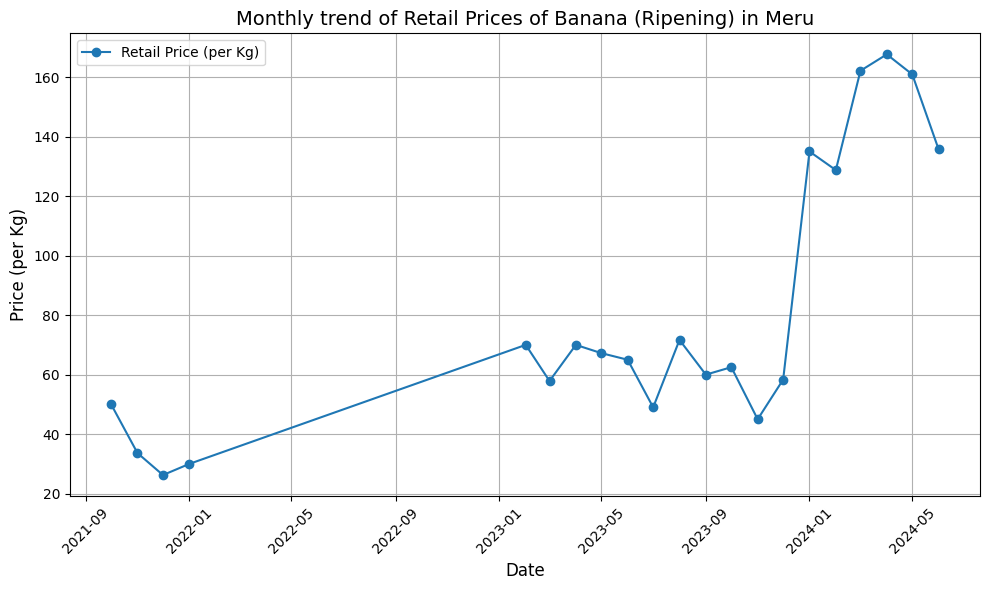

In [94]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_ripe_Meru[(grouped_by_date_ripe_Meru['County'] == 'Meru') & (grouped_by_date_watermelons_Kirinyaga['Commodity'] == 'Banana (Ripening)')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of Banana (Ripening) in Meru', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

### In summary, a seller would not want to time their banana purchases during the low price periods, particularly in the February-April and September-October timeframes, to get the best deals. 
### Best high price periods towards the end of the year would also be advised.

###  Create new columns for Quarterly trend of Ripe Bananas Prices in Meru

In [95]:
cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_ripe_Meru= cleaned_df.groupby(['County', 'Commodity','Quarter'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_ripe_Meru['Quarter'] = grouped_by_date_ripe_Meru['Quarter'].dt.to_timestamp()

# Show the result
print(grouped_by_date_ripe_Meru)

        County             Commodity    Quarter  Retail_per_kg
0    Kirinyaga      Banana (Cooking) 2021-10-01      23.615682
1    Kirinyaga      Banana (Cooking) 2022-01-01      24.259259
2    Kirinyaga      Banana (Cooking) 2022-04-01      23.416667
3    Kirinyaga      Banana (Cooking) 2022-07-01      25.156250
4    Kirinyaga      Banana (Cooking) 2022-10-01      29.038793
..         ...                   ...        ...            ...
523  Nyandarua  White Irish Potatoes 2022-10-01      45.250000
524  Nyandarua  White Irish Potatoes 2023-01-01      43.916087
525  Nyandarua  White Irish Potatoes 2023-04-01      56.823636
526  Nyandarua  White Irish Potatoes 2023-07-01      70.000000
527  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[528 rows x 4 columns]


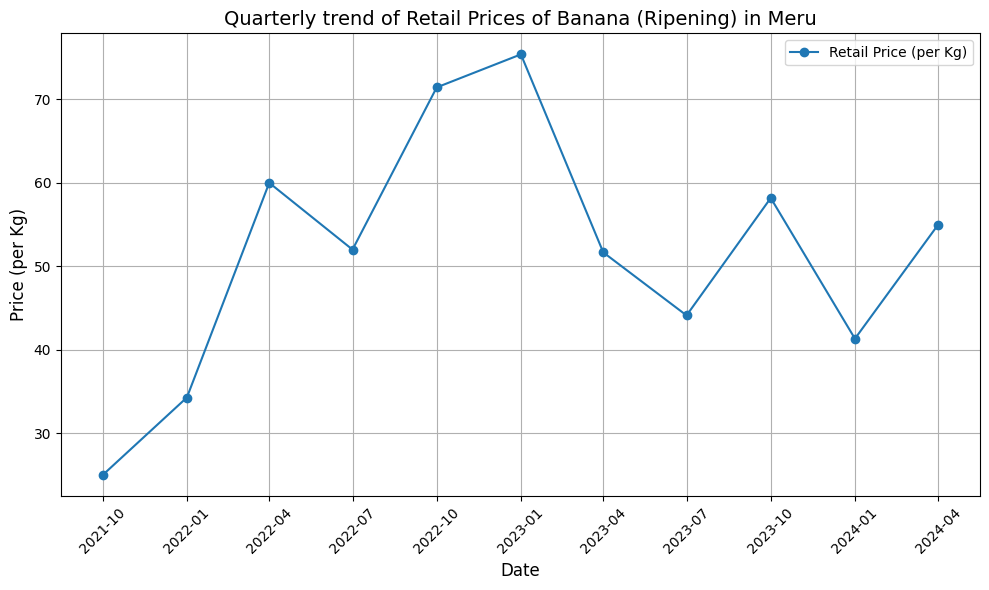

In [96]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_ripe_Meru[(grouped_by_date_ripe_Meru['County'] == 'Meru') & (grouped_by_date_ripe_Meru['Commodity'] == 'Banana (Ripening)')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Quarter')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Quarter'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Quarterly trend of Retail Prices of Banana (Ripening) in Meru', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

## Kales in Meru

###  Create new columns for Monthly trend of Kales Retail Prices in Meru

In [97]:
# Create new columns for month and quarter
cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
#cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_kales_Meru= cleaned_df.groupby(['County', 'Commodity', 'Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_kales_Meru['Month'] = grouped_by_date_kales_Meru['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_kales_Meru)

         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


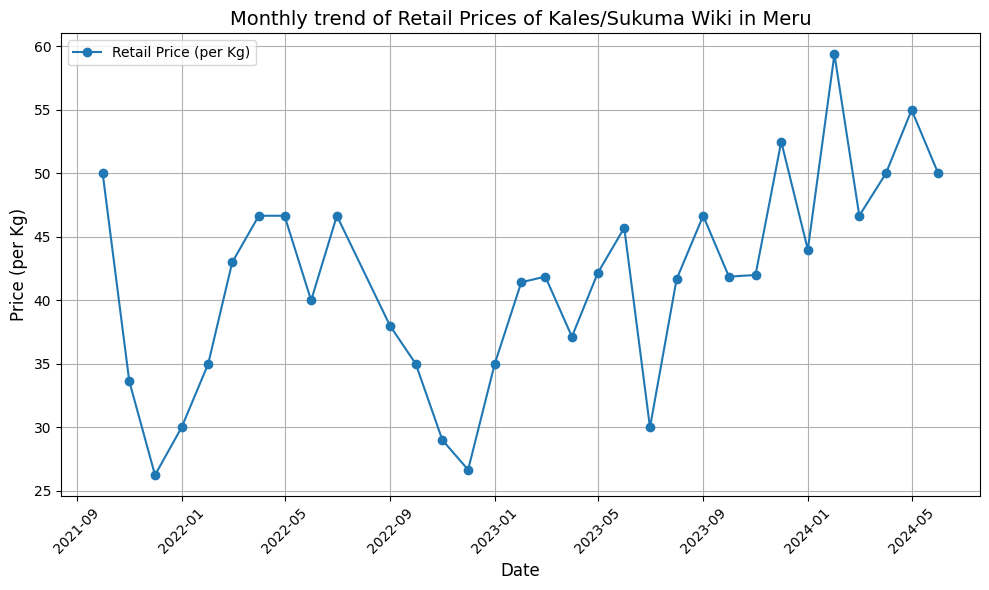

In [98]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_kales_Meru[(grouped_by_date_kales_Meru['County'] == 'Meru') & (grouped_by_date_kales_Meru['Commodity'] == 'Kales/Sukuma Wiki')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of Kales/Sukuma Wiki in Meru', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

### In summary, a seller would not want to sell their Kales/Sukuma Wiki  during the low price periods, particularly in the January-February and March-April timeframes, to get the best deals. 
### Best period in the middle of the year would also be advised.

###  Create new columns for Quarterly trend of Kales Retail Prices in Meru

In [99]:
cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_kales_Meru= cleaned_df.groupby(['County', 'Commodity','Quarter'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_kales_Meru['Quarter'] = grouped_by_date_kales_Meru['Quarter'].dt.to_timestamp()

# Show the result
print(grouped_by_date_kales_Meru)

        County             Commodity    Quarter  Retail_per_kg
0    Kirinyaga      Banana (Cooking) 2021-10-01      23.615682
1    Kirinyaga      Banana (Cooking) 2022-01-01      24.259259
2    Kirinyaga      Banana (Cooking) 2022-04-01      23.416667
3    Kirinyaga      Banana (Cooking) 2022-07-01      25.156250
4    Kirinyaga      Banana (Cooking) 2022-10-01      29.038793
..         ...                   ...        ...            ...
523  Nyandarua  White Irish Potatoes 2022-10-01      45.250000
524  Nyandarua  White Irish Potatoes 2023-01-01      43.916087
525  Nyandarua  White Irish Potatoes 2023-04-01      56.823636
526  Nyandarua  White Irish Potatoes 2023-07-01      70.000000
527  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[528 rows x 4 columns]


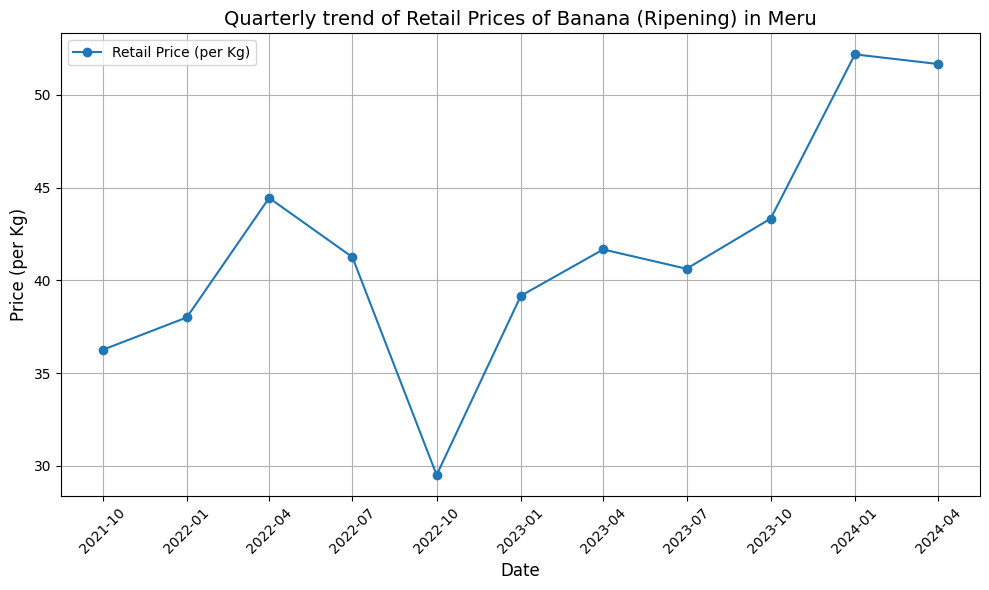

In [100]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_kales_Meru[(grouped_by_date_kales_Meru['County'] == 'Meru') & (grouped_by_date_ripe_Meru['Commodity'] == 'Kales/Sukuma Wiki')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Quarter')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Quarter'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Quarterly trend of Retail Prices of Banana (Ripening) in Meru', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

## Regular Spinach in Meru

###  Create new columns for Monthly trend of Regular Spinach Retail Prices in Meru

In [101]:
# Create new columns for month and quarter
cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
#cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_spinach_Meru= cleaned_df.groupby(['County', 'Commodity', 'Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_spinach_Meru['Month'] = grouped_by_date_spinach_Meru['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_spinach_Meru)

         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


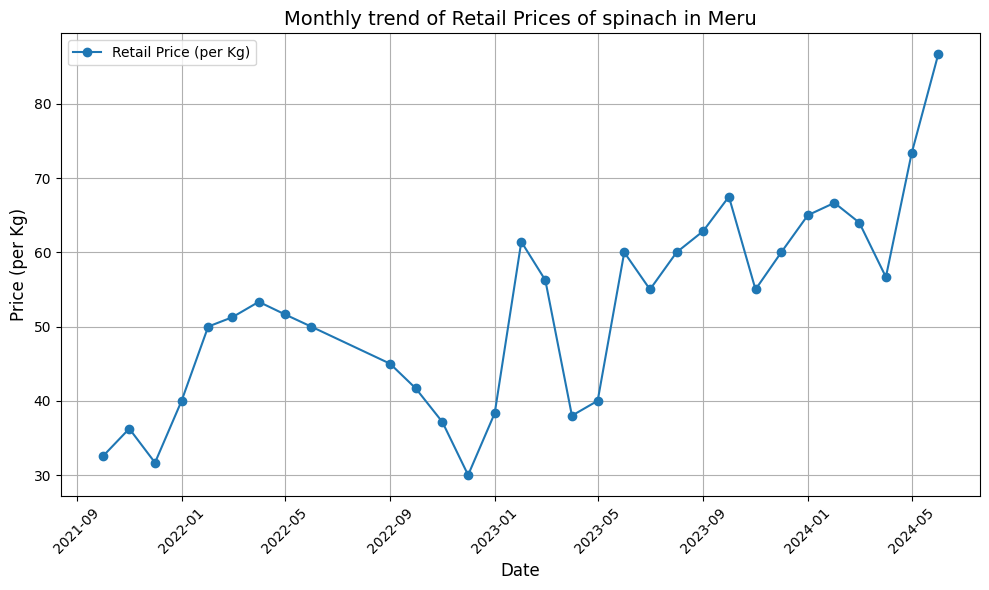

In [102]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_spinach_Meru[(grouped_by_date_spinach_Meru['County'] == 'Meru') & (grouped_by_date_spinach_Meru['Commodity'] == 'Spinach')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of spinach in Meru', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

### In summary, a seller would want to sell their spinach during the low price periods, particularly in the January-March
### Worst period Oct-Dec

###  Create new columns for Quarterly trend of Kales Retail Prices in Meru

In [103]:
cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_spinach_Meru= cleaned_df.groupby(['County', 'Commodity','Quarter'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_spinach_Meru['Quarter'] = grouped_by_date_spinach_Meru['Quarter'].dt.to_timestamp()

# Show the result
print(grouped_by_date_spinach_Meru)

        County             Commodity    Quarter  Retail_per_kg
0    Kirinyaga      Banana (Cooking) 2021-10-01      23.615682
1    Kirinyaga      Banana (Cooking) 2022-01-01      24.259259
2    Kirinyaga      Banana (Cooking) 2022-04-01      23.416667
3    Kirinyaga      Banana (Cooking) 2022-07-01      25.156250
4    Kirinyaga      Banana (Cooking) 2022-10-01      29.038793
..         ...                   ...        ...            ...
523  Nyandarua  White Irish Potatoes 2022-10-01      45.250000
524  Nyandarua  White Irish Potatoes 2023-01-01      43.916087
525  Nyandarua  White Irish Potatoes 2023-04-01      56.823636
526  Nyandarua  White Irish Potatoes 2023-07-01      70.000000
527  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[528 rows x 4 columns]


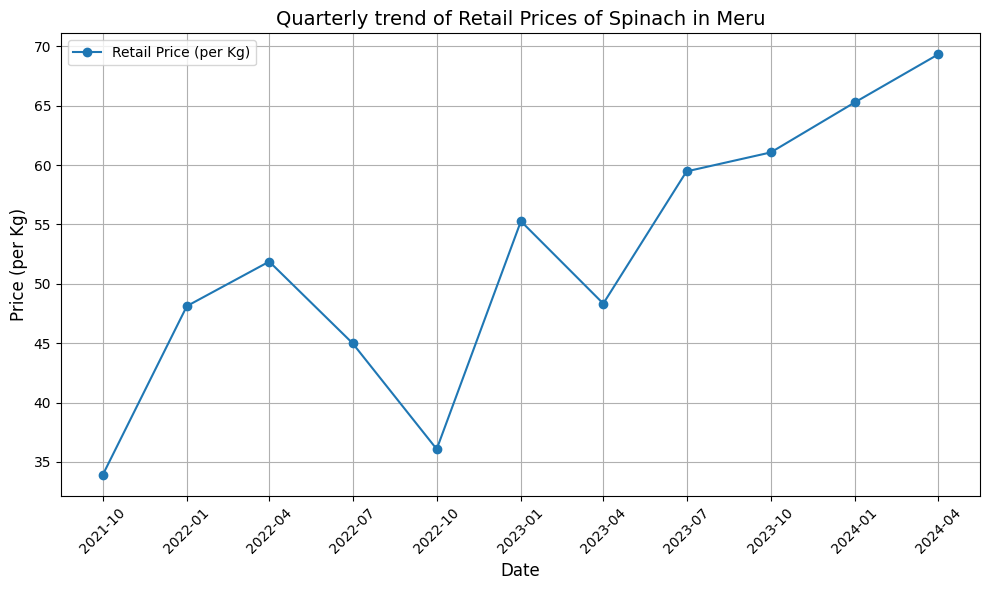

In [104]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_spinach_Meru[(grouped_by_date_spinach_Meru['County'] == 'Meru') & (grouped_by_date_spinach_Meru['Commodity'] == 'Spinach')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Quarter')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Quarter'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Quarterly trend of Retail Prices of Spinach in Meru', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

## Oranges 

In [105]:
# Create new columns for month and quarter
cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
#cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_oranges_Meru= cleaned_df.groupby(['County', 'Commodity', 'Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_oranges_Meru['Month'] = grouped_by_date_oranges_Meru['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_oranges_Meru)

         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


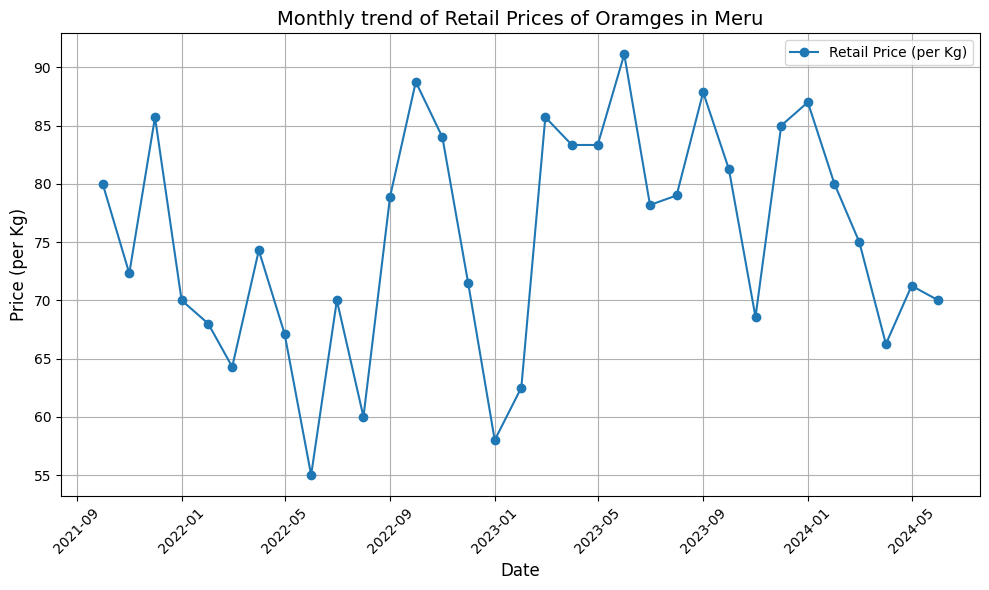

In [106]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_oranges_Meru[(grouped_by_date_oranges_Meru['County'] == 'Meru') & (grouped_by_date_oranges_Meru['Commodity'] == 'Oranges')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of Oramges in Meru', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

### So to summarize, the ideal selling times for a watermelon seller in Meru would be the February/March and July/August peak periods when prices are highest. 
### The least favorable times would be the May/June and December low price periods.

## Top Prized Markets in Meru

### Filter the retail prices in terms of county

C:\Users\Jordan Gamba\AppData\Local\Temp\ipykernel_6948\3802361297.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, x='Market', y='Retail_per_kg', palette='Set2')


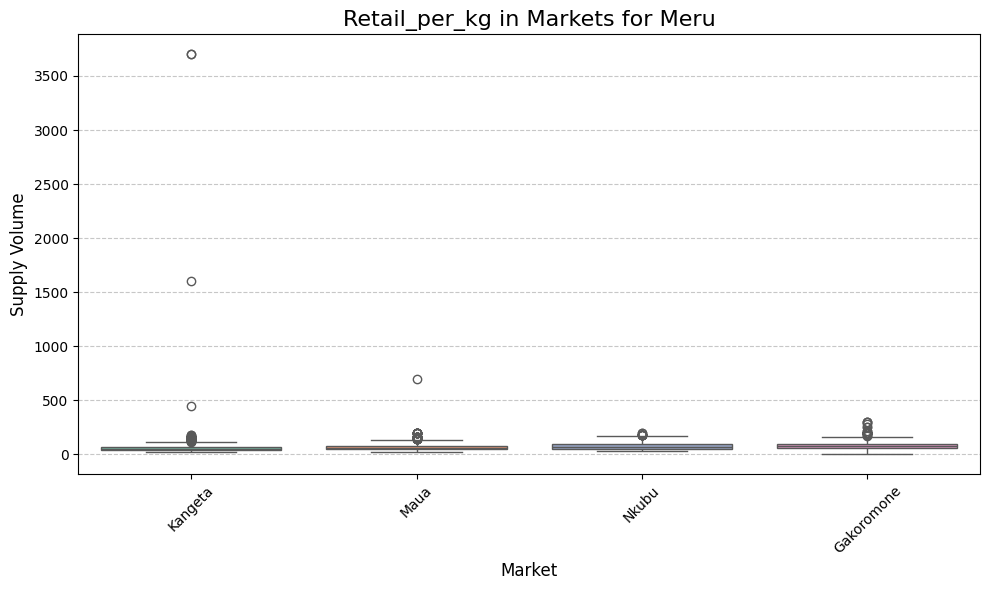

In [107]:
# Filter the data for a specific county
county_name = "Meru"  # Replace with the desired county name
filtered_data = data[data['County'] == county_name]

# Create the box plot for supply volumes in all markets within the county
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data, x='Market', y='Retail_per_kg', palette='Set2')

# Customize the plot
plt.title(f"Retail_per_kg in Markets for {county_name}", fontsize=16)
plt.xlabel("Market", fontsize=12)
plt.ylabel("Supply Volume", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

### Remove the outliers and display them

C:\Users\Jordan Gamba\AppData\Local\Temp\ipykernel_6948\945926464.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data_no_outliers, x='Market', y='Retail_per_kg', palette='Set2')


Cleaned Retail_per_kg (Without Outliers):
        Market  Retail_per_kg
0      Kangeta           50.0
1      Kangeta          120.0
7      Kangeta           20.0
8      Kangeta           20.0
9      Kangeta           20.0
...        ...            ...
35865     Maua           40.0
35868     Maua           60.0
35870     Maua           35.0
35877     Maua           60.0
35878     Maua           80.0

[2267 rows x 2 columns]


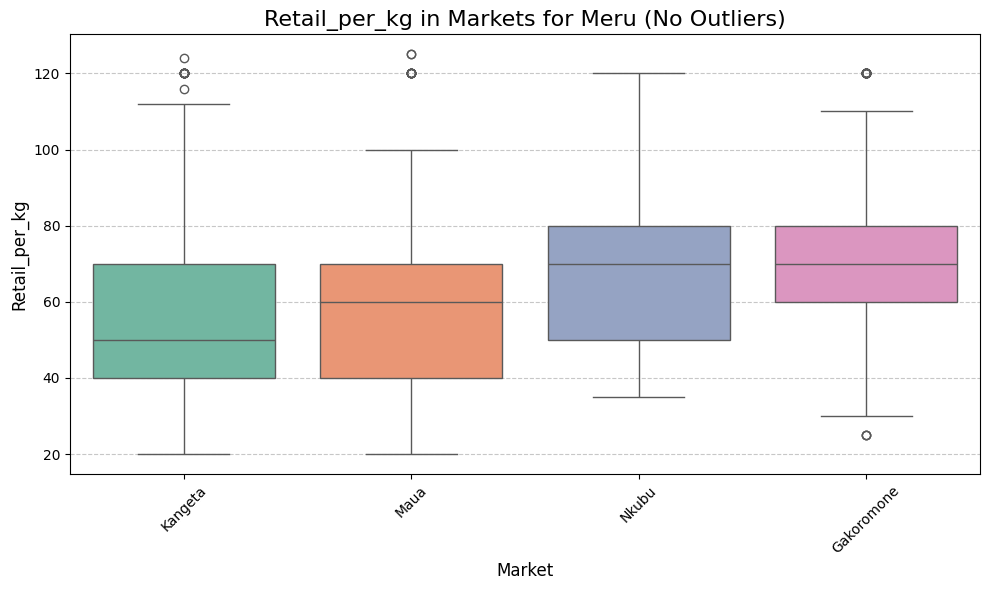

In [108]:
county_name = "Meru"  # Replace with the desired county name
filtered_data = combined_df[combined_df['County'] == county_name]

# Remove outliers for Supply Volume
Q1 = filtered_data['Retail_per_kg'].quantile(0.25)
Q3 = filtered_data['Retail_per_kg'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data to remove outliers
filtered_data_no_outliers = filtered_data[
    (filtered_data['Retail_per_kg'] >= lower_bound) & 
    (filtered_data['Retail_per_kg'] <= upper_bound)
]

# Create the box plot for supply volumes in all markets within the county (no outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data_no_outliers, x='Market', y='Retail_per_kg', palette='Set2')

# Customize the plot
plt.title(f"Retail_per_kg in Markets for {county_name} (No Outliers)", fontsize=16)
plt.xlabel("Market", fontsize=12)
plt.ylabel("Retail_per_kg", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Display the cleaned supply volumes
print("Cleaned Retail_per_kg (Without Outliers):")
print(filtered_data_no_outliers[['Market', 'Retail_per_kg']])

# Show the plot
plt.tight_layout()
plt.show()

In [109]:
# Group the filtered data (without outliers) by Market and calculate the total Supply Volume
market_supply_totals = (
    filtered_data_no_outliers.groupby('Market')['Retail_per_kg']
    .sum()
    .sort_values(ascending=False)
)

# Get the top three markets
top_three_markets = market_supply_totals.head(3)

# Display the results
print("Top Three Markets by Supply Volume (No Outliers):")
print(top_three_markets)

Top Three Markets by Supply Volume (No Outliers):
Market
Kangeta       51988.5
Nkubu         33275.0
Gakoromone    30524.0
Name: Retail_per_kg, dtype: float64


# Nakuru

## Dry Maize in Meru

###  Create new columns for Monthly trend of Dry Maize Retail Prices in Nakuru

In [110]:
# Create new columns for month and quarter
cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
#cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_drymaize_Nakuru= cleaned_df.groupby(['County', 'Commodity', 'Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_drymaize_Nakuru['Month'] = grouped_by_date_drymaize_Nakuru['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_drymaize_Nakuru)

         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


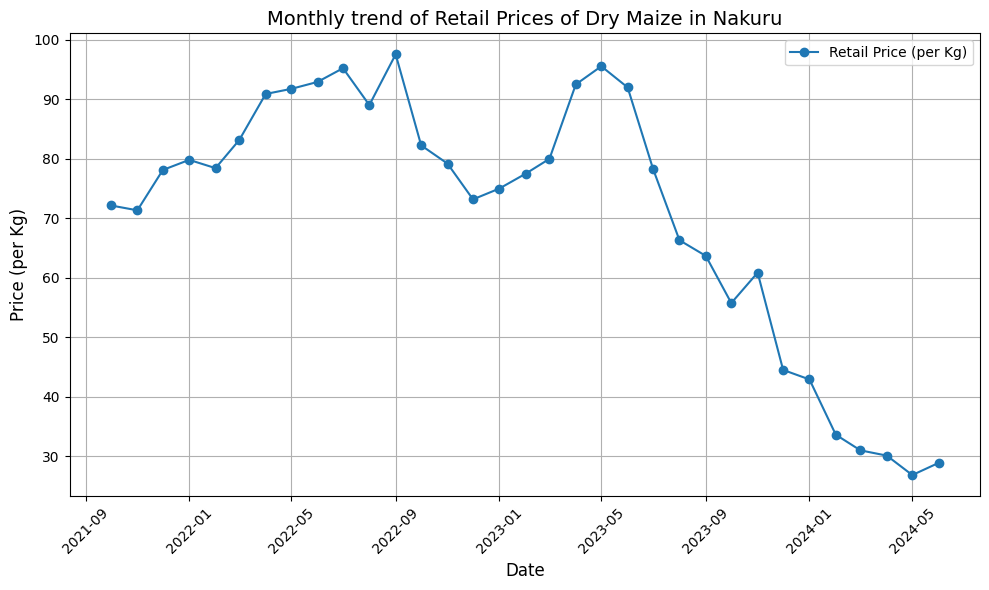

In [111]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_drymaize_Nakuru[(grouped_by_date_drymaize_Nakuru['County'] == 'Nakuru') & (grouped_by_date_drymaize_Nakuru['Commodity'] == 'Dry Maize')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of Dry Maize in Nakuru', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

### In summary, a seller would not want to time their dry maize purchases during the low price periods, particularly in the March-April and December-January timeframes, to get the best deals. 
### Best period in the middle and latter half of the year would also be advised.

###  Create new columns for Quarterly trend of Dry Mazie Retail Prices in Meru

In [112]:
cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_drymaize_Nakuru= cleaned_df.groupby(['County', 'Commodity', 'Quarter'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_drymaize_Nakuru['Quarter'] = grouped_by_date_drymaize_Nakuru['Quarter'].dt.to_timestamp()

# Show the result
print(grouped_by_date_drymaize_Nakuru)

        County             Commodity    Quarter  Retail_per_kg
0    Kirinyaga      Banana (Cooking) 2021-10-01      23.615682
1    Kirinyaga      Banana (Cooking) 2022-01-01      24.259259
2    Kirinyaga      Banana (Cooking) 2022-04-01      23.416667
3    Kirinyaga      Banana (Cooking) 2022-07-01      25.156250
4    Kirinyaga      Banana (Cooking) 2022-10-01      29.038793
..         ...                   ...        ...            ...
523  Nyandarua  White Irish Potatoes 2022-10-01      45.250000
524  Nyandarua  White Irish Potatoes 2023-01-01      43.916087
525  Nyandarua  White Irish Potatoes 2023-04-01      56.823636
526  Nyandarua  White Irish Potatoes 2023-07-01      70.000000
527  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[528 rows x 4 columns]


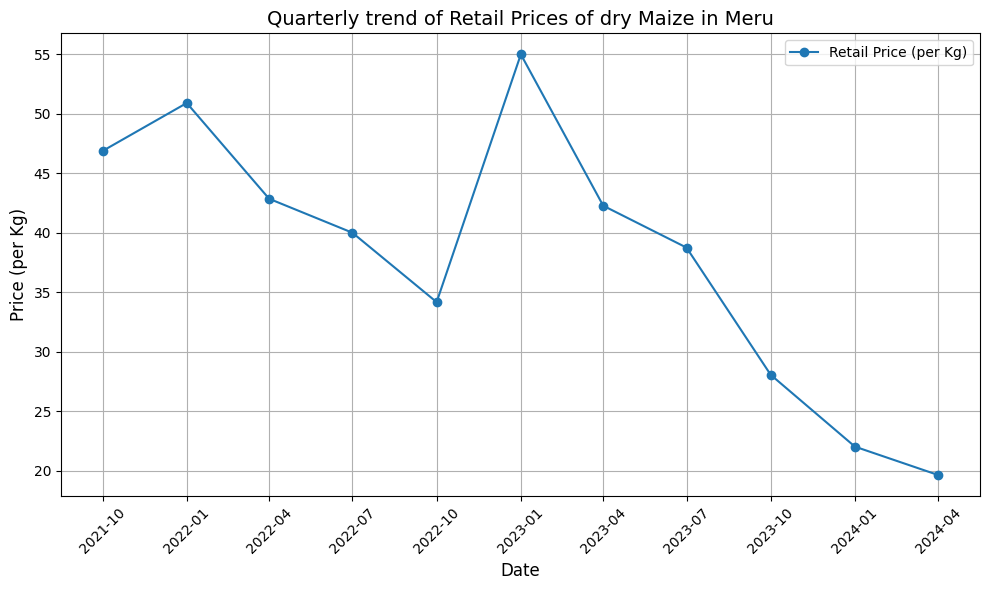

In [113]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_drymaize_Meru[(grouped_by_date_drymaize_Meru['County'] == 'Nakuru') & (grouped_by_date_drymaize_Meru['Commodity'] == 'Spinach')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Quarter')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Quarter'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Quarterly trend of Retail Prices of dry Maize in Meru', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

## Bananas Cooking in Nakuru

###  Create new columns for Monthly trend of Bananas Cooking Retail Prices in Nakuru

In [114]:
# Create new columns for month and quarter
cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
#cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_bananascook_Nakuru= cleaned_df.groupby(['County', 'Commodity', 'Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_bananascook_Nakuru['Month'] = grouped_by_date_bananascook_Nakuru['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_bananascook_Nakuru)

         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


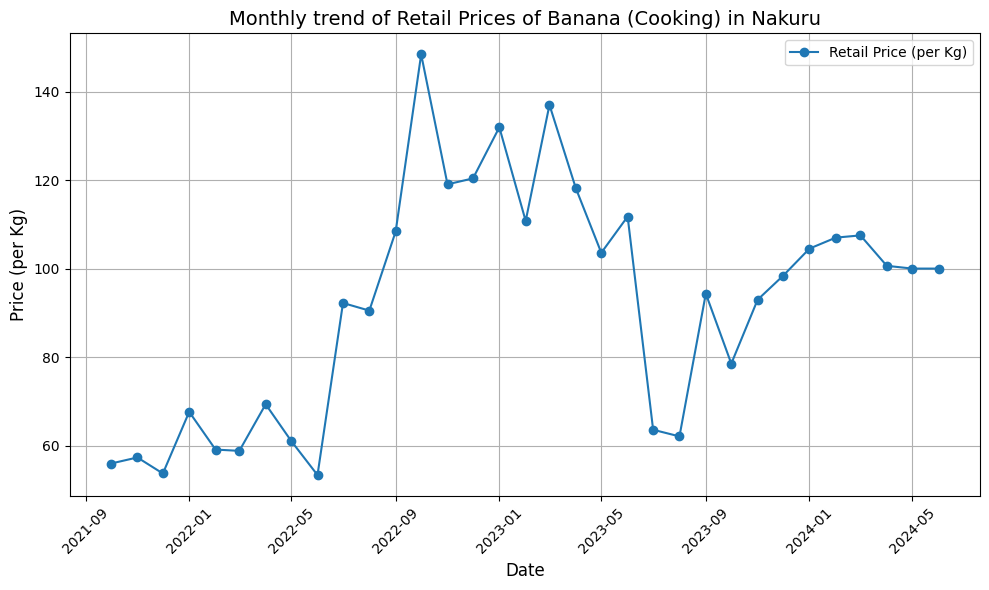

In [115]:
import matplotlib.pyplot as plt
# Banana (Cooking)

# Filter the DataFrame
filtered_df = grouped_by_date_bananascook_Nakuru[(grouped_by_date_bananascook_Nakuru['County'] == 'Nakuru') & (grouped_by_date_bananascook_Nakuru['Commodity'] == 'Banana (Cooking)')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of Banana (Cooking) in Nakuru', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

### In summary, a seller would not want to sell their cooking banana purchases during the low price periods, particularly in the January-February and April-May timeframes, to get the best deals. 
### Best periods in the middle of the year would also be advised.

###  Create new columns for Quarterly trend of Bananas cooking Retail Prices in Nakuru

In [116]:
cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_cook_Nakuru= cleaned_df.groupby(['County', 'Commodity','Quarter'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_cook_Nakuru['Quarter'] = grouped_by_date_cook_Nakuru['Quarter'].dt.to_timestamp()

# Show the result
print(grouped_by_date_cook_Nakuru)

        County             Commodity    Quarter  Retail_per_kg
0    Kirinyaga      Banana (Cooking) 2021-10-01      23.615682
1    Kirinyaga      Banana (Cooking) 2022-01-01      24.259259
2    Kirinyaga      Banana (Cooking) 2022-04-01      23.416667
3    Kirinyaga      Banana (Cooking) 2022-07-01      25.156250
4    Kirinyaga      Banana (Cooking) 2022-10-01      29.038793
..         ...                   ...        ...            ...
523  Nyandarua  White Irish Potatoes 2022-10-01      45.250000
524  Nyandarua  White Irish Potatoes 2023-01-01      43.916087
525  Nyandarua  White Irish Potatoes 2023-04-01      56.823636
526  Nyandarua  White Irish Potatoes 2023-07-01      70.000000
527  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[528 rows x 4 columns]


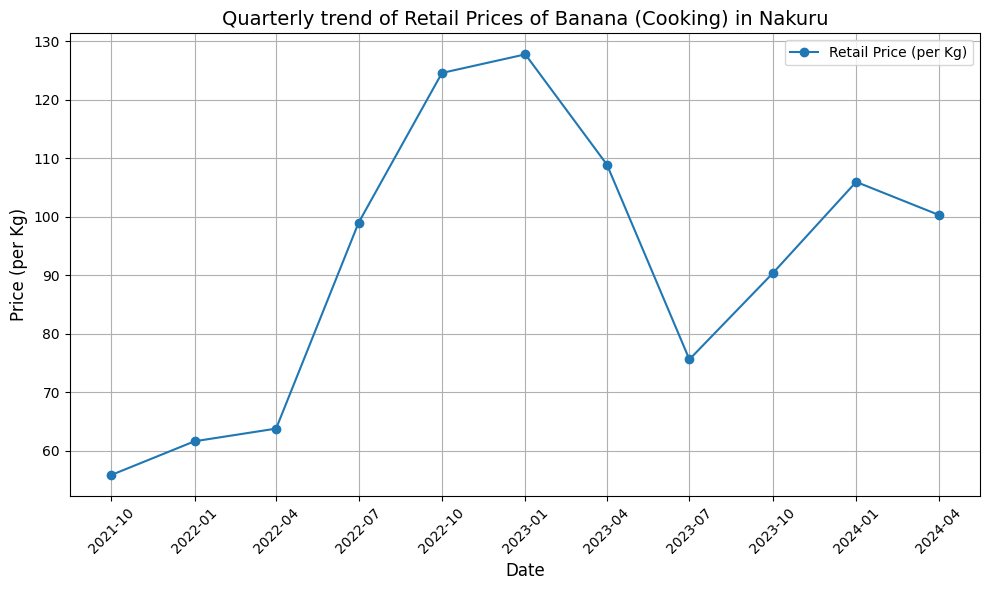

In [117]:
import matplotlib.pyplot as plt
# Banana (Cooking)

# Filter the DataFrame
filtered_df = grouped_by_date_cook_Nakuru[(grouped_by_date_cook_Nakuru['County'] == 'Nakuru') & (grouped_by_date_cook_Nakuru['Commodity'] == 'Banana (Cooking)')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Quarter')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Quarter'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Quarterly trend of Retail Prices of Banana (Cooking) in Nakuru', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

## White Irish Potatoes in Nakuru

###  Create new columns for Monthly trend of White Irish Potatoes Retail Prices in Meru

In [118]:
# Create new columns for month and quarter
cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
#cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_whiteirish_Nakuru= cleaned_df.groupby(['County', 'Commodity', 'Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_whiteirish_Nakuru['Month'] = grouped_by_date_whiteirish_Nakuru['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_whiteirish_Nakuru)

         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


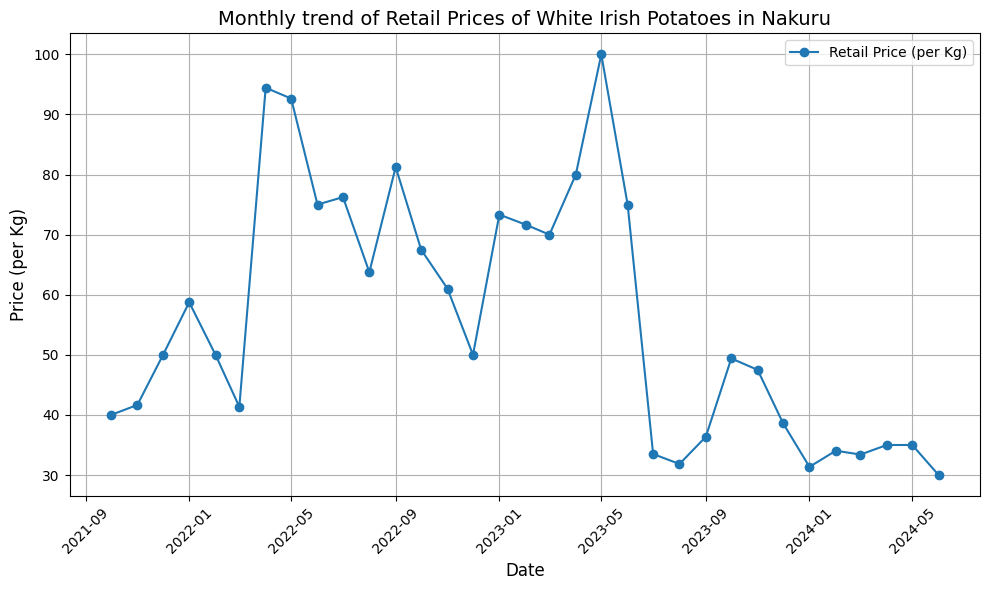

In [119]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_whiteirish_Nakuru[(grouped_by_date_whiteirish_Nakuru['County'] == 'Nakuru') & (grouped_by_date_whiteirish_Nakuru['Commodity'] == 'White Irish Potatoes')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of White Irish Potatoes in Nakuru', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

### In summary, a seller would not want to time their white Irish potato purchases during the low price periods, particularly in the April-May and December-January timeframes, to get the best deals. 
### Best high price periods in the middle and latter half of the year would also be advised.

###  Create new columns for Quarterly trend of White Irish Retail Prices in Nakuru

In [120]:
cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_whiteirish_Nakuru= cleaned_df.groupby(['County', 'Commodity','Quarter'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_whiteirish_Nakuru['Quarter'] = grouped_by_date_whiteirish_Nakuru['Quarter'].dt.to_timestamp()

# Show the result
print(grouped_by_date_whiteirish_Nakuru)

        County             Commodity    Quarter  Retail_per_kg
0    Kirinyaga      Banana (Cooking) 2021-10-01      23.615682
1    Kirinyaga      Banana (Cooking) 2022-01-01      24.259259
2    Kirinyaga      Banana (Cooking) 2022-04-01      23.416667
3    Kirinyaga      Banana (Cooking) 2022-07-01      25.156250
4    Kirinyaga      Banana (Cooking) 2022-10-01      29.038793
..         ...                   ...        ...            ...
523  Nyandarua  White Irish Potatoes 2022-10-01      45.250000
524  Nyandarua  White Irish Potatoes 2023-01-01      43.916087
525  Nyandarua  White Irish Potatoes 2023-04-01      56.823636
526  Nyandarua  White Irish Potatoes 2023-07-01      70.000000
527  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[528 rows x 4 columns]


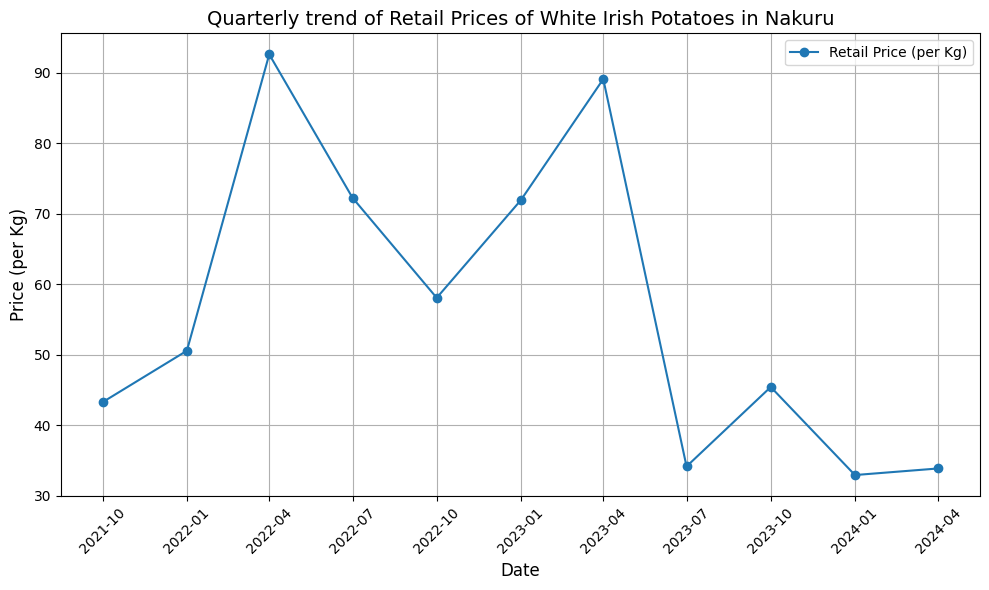

In [121]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_whiteirish_Nakuru[(grouped_by_date_whiteirish_Nakuru['County'] == 'Nakuru') & (grouped_by_date_whiteirish_Nakuru['Commodity'] == 'White Irish Potatoes')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Quarter')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Quarter'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Quarterly trend of Retail Prices of White Irish Potatoes in Nakuru', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

## Dry Onions in Nakuru

###  Create new columns for Monthly trend of Dry Onions Retail Prices in Nakuru

In [122]:
# Create new columns for month and quarter
cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
#cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_dryonions_Nakuru= cleaned_df.groupby(['County', 'Commodity', 'Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_dryonions_Nakuru['Month'] = grouped_by_date_dryonions_Nakuru['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_dryonions_Nakuru)

         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


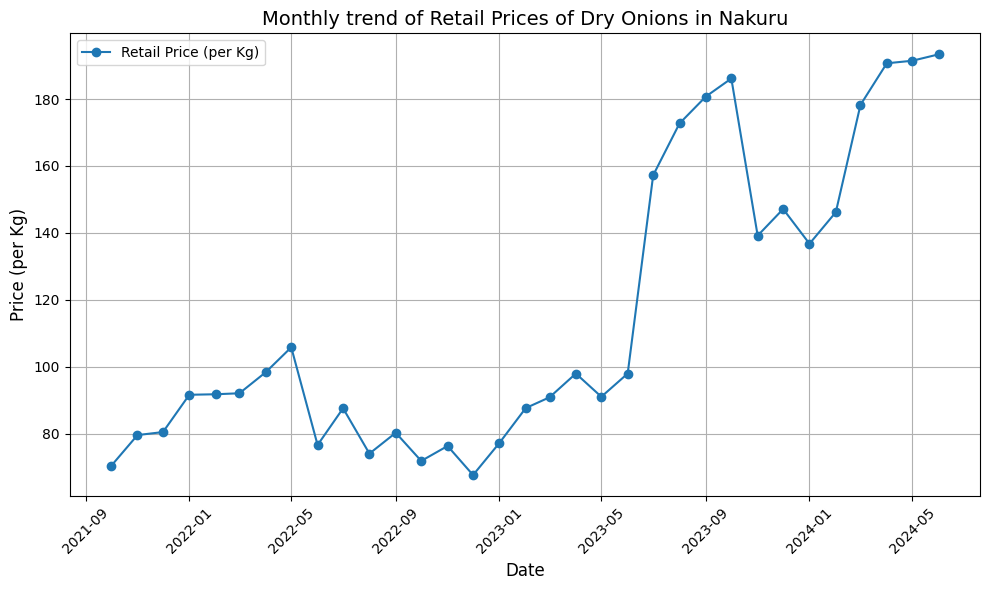

In [123]:
# Filter the DataFrame
filtered_df = grouped_by_date_dryonions_Nakuru[(grouped_by_date_dryonions_Nakuru['County'] == 'Nakuru') & (grouped_by_date_dryonions_Nakuru['Commodity'] == 'Dry Onions')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of Dry Onions in Nakuru', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

### In summary, a seller would not want to time their dry onion purchases during the low price periods, particularly in the June-July and April-May timeframes, to get the best deals. 
### Best price periods in the latter half of the year would also be advised.

###  Create new columns for Quarterly trend of Dry Onions Retail Prices in Nakuru

In [124]:
cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_dryonions_Nakuru= cleaned_df.groupby(['County', 'Commodity','Quarter'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_dryonions_Nakuru['Quarter'] = grouped_by_date_dryonions_Nakuru['Quarter'].dt.to_timestamp()

# Show the result
print(grouped_by_date_dryonions_Nakuru)

        County             Commodity    Quarter  Retail_per_kg
0    Kirinyaga      Banana (Cooking) 2021-10-01      23.615682
1    Kirinyaga      Banana (Cooking) 2022-01-01      24.259259
2    Kirinyaga      Banana (Cooking) 2022-04-01      23.416667
3    Kirinyaga      Banana (Cooking) 2022-07-01      25.156250
4    Kirinyaga      Banana (Cooking) 2022-10-01      29.038793
..         ...                   ...        ...            ...
523  Nyandarua  White Irish Potatoes 2022-10-01      45.250000
524  Nyandarua  White Irish Potatoes 2023-01-01      43.916087
525  Nyandarua  White Irish Potatoes 2023-04-01      56.823636
526  Nyandarua  White Irish Potatoes 2023-07-01      70.000000
527  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[528 rows x 4 columns]


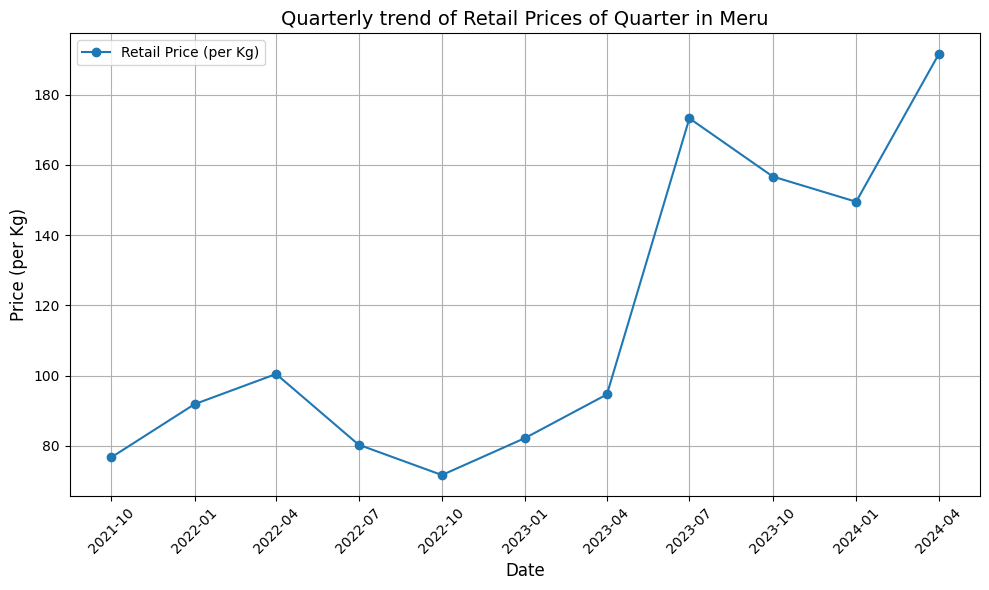

In [125]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_dryonions_Nakuru[(grouped_by_date_dryonions_Nakuru['County'] == 'Nakuru') & (grouped_by_date_dryonions_Nakuru['Commodity'] == 'Dry Onions')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Quarter')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Quarter'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Quarterly trend of Retail Prices of Quarter in Meru', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

## Water Melons in Nakuru

###  Create new columns for Monthly trend of Water Melons Retail Prices in Nakuru

In [126]:
# Create new columns for month and quarter
cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
#cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_watermelons_Nakuru= cleaned_df.groupby(['County', 'Commodity', 'Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_watermelons_Nakuru['Month'] = grouped_by_date_watermelons_Nakuru['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_watermelons_Nakuru)

         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


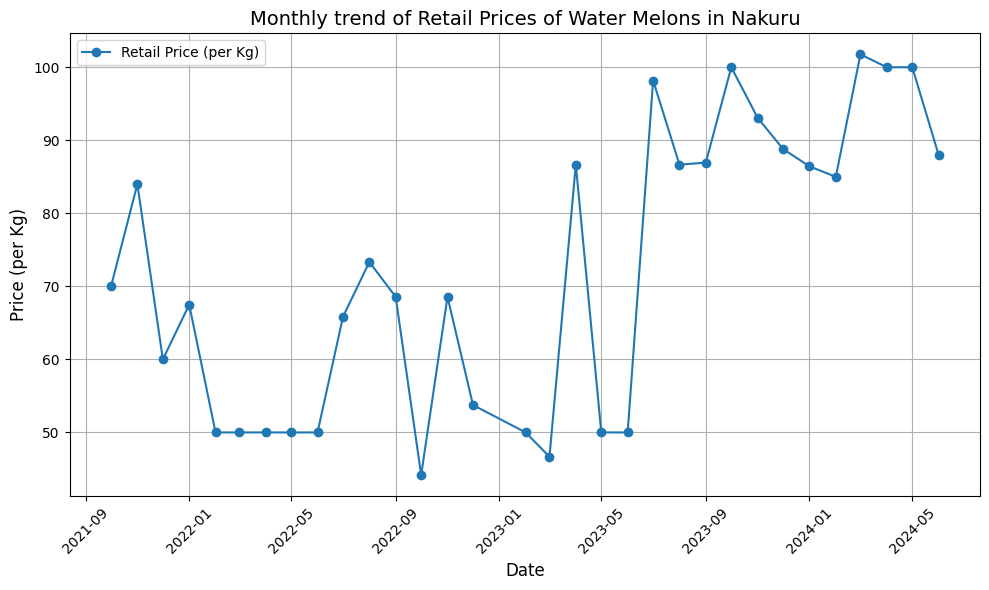

In [127]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_watermelons_Nakuru[(grouped_by_date_watermelons_Nakuru['County'] == 'Nakuru') & (grouped_by_date_watermelons_Nakuru['Commodity'] == 'Water Melon')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of Water Melons in Nakuru', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

### In summary, a seller would not want to sell their water melon purchases during the low price periods, particularly in the April-May and September-October timeframes, to get the best deals. 
### Best periods in the middle of the year would also be advised.

###  Create new columns for Quarterly trend of Water Melon Prices in Nakuru

In [128]:
cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_watermelon_Nakuru= cleaned_df.groupby(['County', 'Commodity','Quarter'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_watermelon_Nakuru['Quarter'] = grouped_by_date_watermelon_Nakuru['Quarter'].dt.to_timestamp()

# Show the result
print(grouped_by_date_watermelon_Nakuru)

        County             Commodity    Quarter  Retail_per_kg
0    Kirinyaga      Banana (Cooking) 2021-10-01      23.615682
1    Kirinyaga      Banana (Cooking) 2022-01-01      24.259259
2    Kirinyaga      Banana (Cooking) 2022-04-01      23.416667
3    Kirinyaga      Banana (Cooking) 2022-07-01      25.156250
4    Kirinyaga      Banana (Cooking) 2022-10-01      29.038793
..         ...                   ...        ...            ...
523  Nyandarua  White Irish Potatoes 2022-10-01      45.250000
524  Nyandarua  White Irish Potatoes 2023-01-01      43.916087
525  Nyandarua  White Irish Potatoes 2023-04-01      56.823636
526  Nyandarua  White Irish Potatoes 2023-07-01      70.000000
527  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[528 rows x 4 columns]


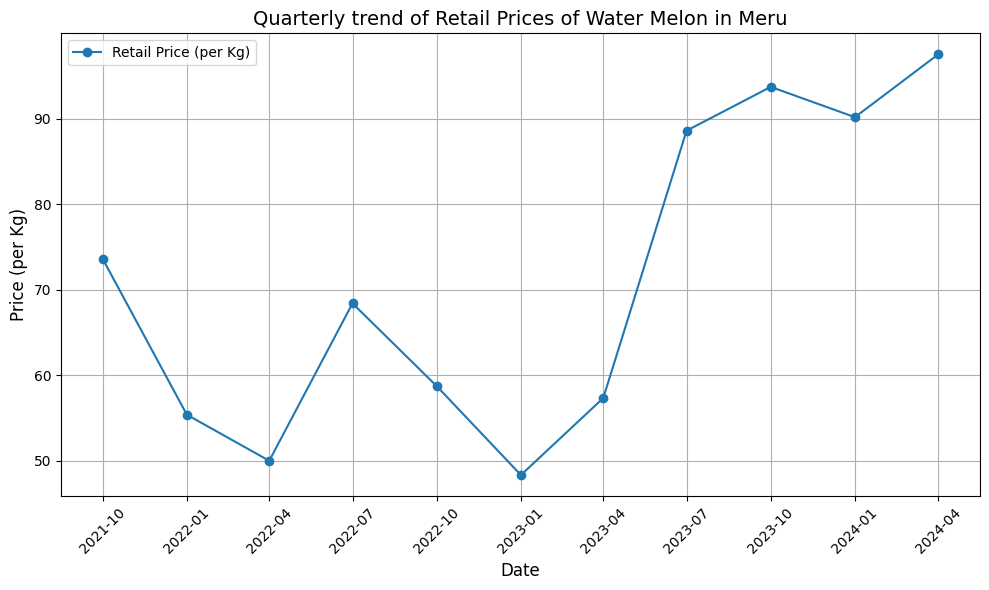

In [129]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_watermelon_Nakuru[(grouped_by_date_watermelon_Nakuru['County'] == 'Nakuru') & (grouped_by_date_watermelon_Nakuru['Commodity'] == 'Water Melon')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Quarter')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Quarter'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Quarterly trend of Retail Prices of Water Melon in Meru', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

## Mangoes in Nakuru

###  Create new columns for Monthly trend of Mangoes Retail Prices in Nakuru

In [130]:
cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
#cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_mangoes_Nakuru= cleaned_df.groupby(['County', 'Commodity', 'Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_mangoes_Nakuru['Month'] = grouped_by_date_mangoes_Nakuru['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_mangoes_Nakuru)

         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


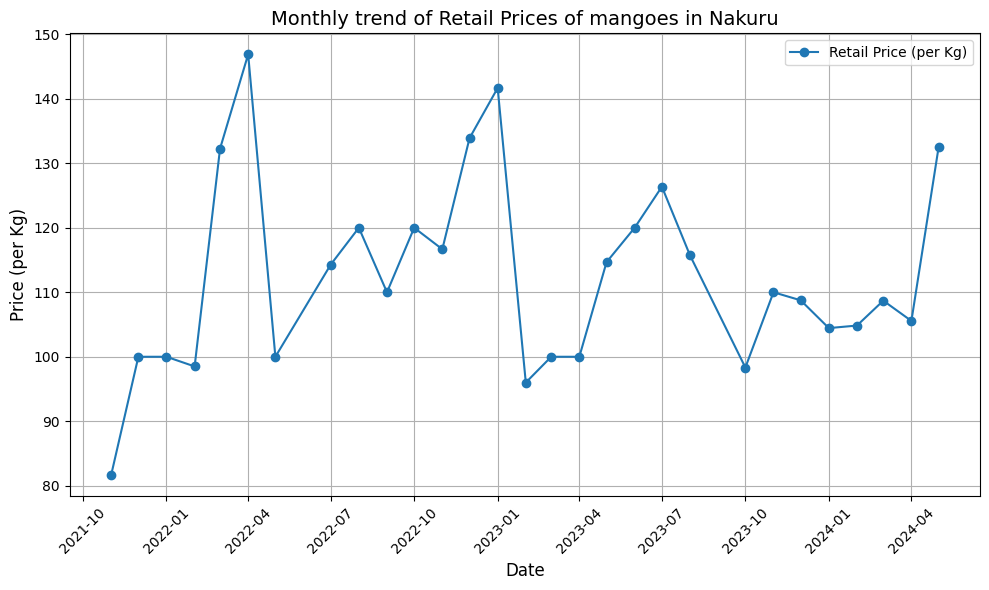

In [131]:
import matplotlib.pyplot as plt
# Banana (Cooking)

# Filter the DataFrame
filtered_df = grouped_by_date_mangoes_Nakuru[(grouped_by_date_mangoes_Nakuru['County'] == 'Nakuru') & (grouped_by_date_mangoes_Nakuru['Commodity'] == 'Mangoes')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of mangoes in Nakuru', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

### In summary, a buyer would want to time their mango purchases during the low price periods, particularly in the April-May and January-February timeframes, to get the best deals. 
### Avoiding the high price periods in the middle of the year would also be advised

###  Create new columns for Quarterly trend of Mangoes Retail Prices in Nakuru

In [132]:
cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_mangoes_Nakuru= cleaned_df.groupby(['County', 'Commodity','Quarter'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_mangoes_Nakuru['Quarter'] = grouped_by_date_mangoes_Nakuru['Quarter'].dt.to_timestamp()

# Show the result
print(grouped_by_date_mangoes_Nakuru)

        County             Commodity    Quarter  Retail_per_kg
0    Kirinyaga      Banana (Cooking) 2021-10-01      23.615682
1    Kirinyaga      Banana (Cooking) 2022-01-01      24.259259
2    Kirinyaga      Banana (Cooking) 2022-04-01      23.416667
3    Kirinyaga      Banana (Cooking) 2022-07-01      25.156250
4    Kirinyaga      Banana (Cooking) 2022-10-01      29.038793
..         ...                   ...        ...            ...
523  Nyandarua  White Irish Potatoes 2022-10-01      45.250000
524  Nyandarua  White Irish Potatoes 2023-01-01      43.916087
525  Nyandarua  White Irish Potatoes 2023-04-01      56.823636
526  Nyandarua  White Irish Potatoes 2023-07-01      70.000000
527  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[528 rows x 4 columns]


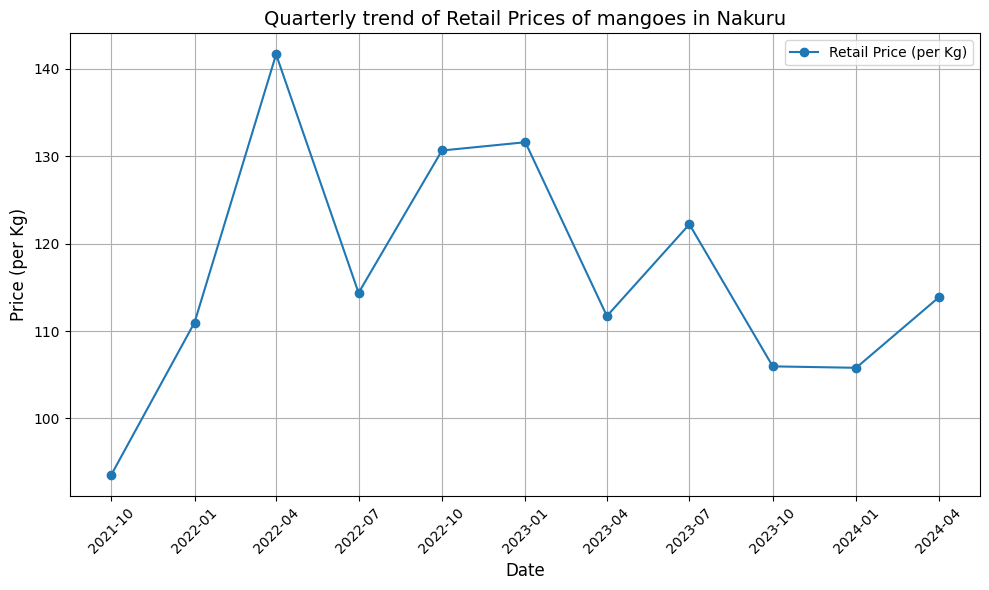

In [133]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_mangoes_Nakuru[(grouped_by_date_mangoes_Nakuru['County'] == 'Nakuru') & (grouped_by_date_mangoes_Nakuru['Commodity'] == 'Mangoes')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Quarter')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Quarter'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Quarterly trend of Retail Prices of mangoes in Nakuru', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

## Ripe Bananas in Nakuru

###  Create new columns for Monthly trend of Ripe Bananas Retail Prices in Nakuru

In [134]:
# Create new columns for month and quarter
cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
#cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_ripe_Nakuru= cleaned_df.groupby(['County', 'Commodity', 'Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_ripe_Nakuru['Month'] = grouped_by_date_ripe_Nakuru['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_ripe_Nakuru)

         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


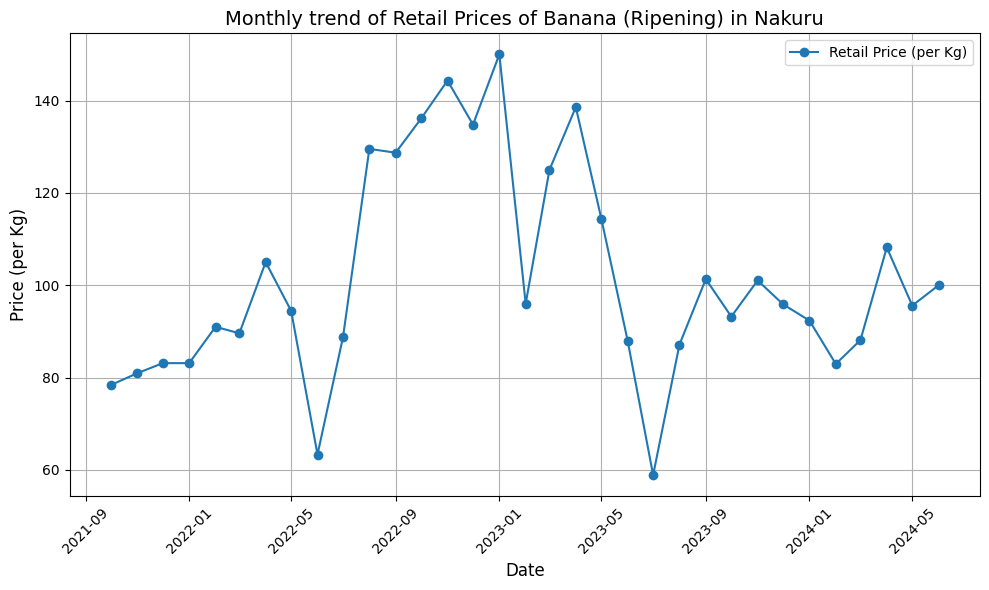

In [135]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_ripe_Nakuru[(grouped_by_date_ripe_Nakuru['County'] == 'Nakuru') & (grouped_by_date_ripe_Nakuru['Commodity'] == 'Banana (Ripening)')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of Banana (Ripening) in Nakuru', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

### In summary, a seller not want to sell their ripening banana purchases during the low price periods, particularly in the February-April and September-October timeframes, to get the best deals. 
### Best periods towards the end of the year would also be advised.

###  Create new columns for Quarterly trend of Ripe Bananas Prices in Nakuru

In [136]:
cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_ripe_Nakuru= cleaned_df.groupby(['County', 'Commodity','Quarter'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_ripe_Nakuru['Quarter'] = grouped_by_date_ripe_Nakuru['Quarter'].dt.to_timestamp()

# Show the result
print(grouped_by_date_ripe_Nakuru)

        County             Commodity    Quarter  Retail_per_kg
0    Kirinyaga      Banana (Cooking) 2021-10-01      23.615682
1    Kirinyaga      Banana (Cooking) 2022-01-01      24.259259
2    Kirinyaga      Banana (Cooking) 2022-04-01      23.416667
3    Kirinyaga      Banana (Cooking) 2022-07-01      25.156250
4    Kirinyaga      Banana (Cooking) 2022-10-01      29.038793
..         ...                   ...        ...            ...
523  Nyandarua  White Irish Potatoes 2022-10-01      45.250000
524  Nyandarua  White Irish Potatoes 2023-01-01      43.916087
525  Nyandarua  White Irish Potatoes 2023-04-01      56.823636
526  Nyandarua  White Irish Potatoes 2023-07-01      70.000000
527  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[528 rows x 4 columns]


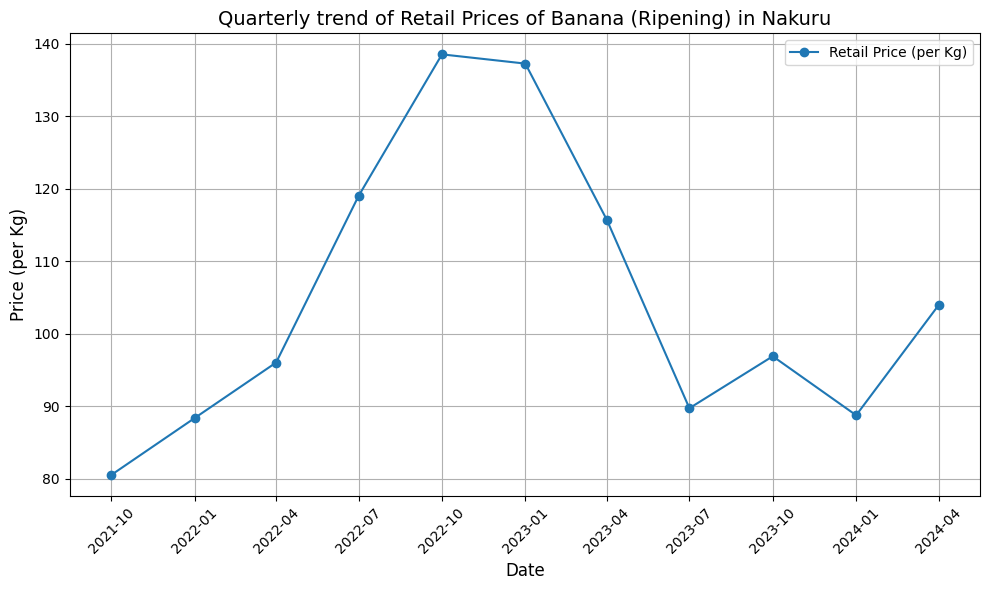

In [137]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_ripe_Nakuru[(grouped_by_date_ripe_Nakuru['County'] == 'Nakuru') & (grouped_by_date_ripe_Meru['Commodity'] == 'Banana (Ripening)')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Quarter')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Quarter'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Quarterly trend of Retail Prices of Banana (Ripening) in Nakuru', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

## Kales in Nakuru

###  Create new columns for Monthly trend of Kales Retail Prices in Nakuru

In [138]:
# Create new columns for month and quarter
cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
#cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_kales_Nakuru= cleaned_df.groupby(['County', 'Commodity', 'Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_kales_Nakuru['Month'] = grouped_by_date_kales_Nakuru['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_kales_Nakuru)

         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


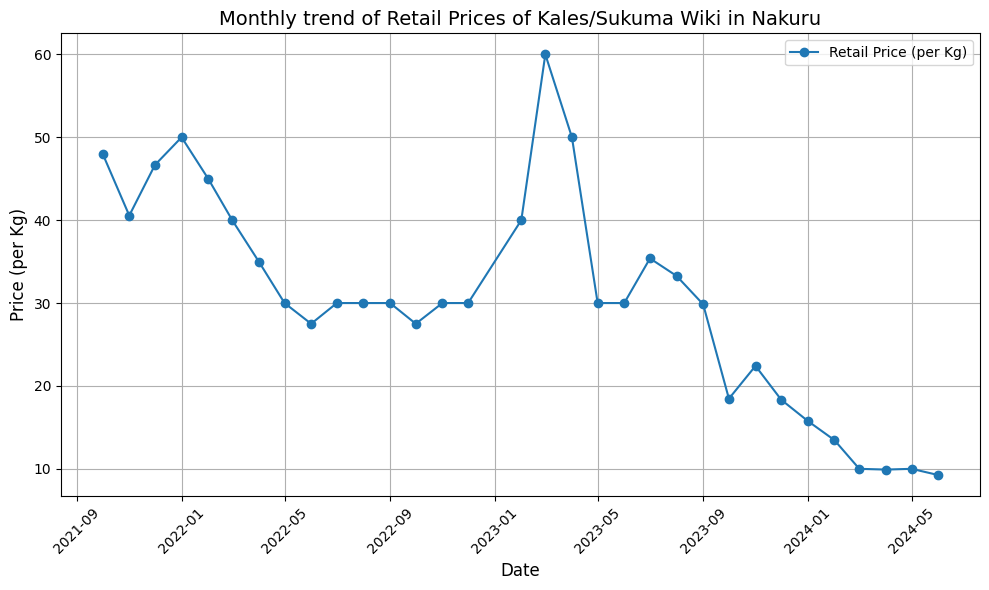

In [139]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_kales_Nakuru[(grouped_by_date_kales_Nakuru['County'] == 'Nakuru') & (grouped_by_date_kales_Nakuru['Commodity'] == 'Kales/Sukuma Wiki')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of Kales/Sukuma Wiki in Nakuru', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

### best time January-February
### worst time April-May

###  Create new columns for Quarterly trend of Kales Retail Prices in Nakuru

In [140]:
cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_kales_Nakuru= cleaned_df.groupby(['County', 'Commodity','Quarter'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_kales_Nakuru['Quarter'] = grouped_by_date_kales_Nakuru['Quarter'].dt.to_timestamp()

# Show the result
print(grouped_by_date_kales_Nakuru)

        County             Commodity    Quarter  Retail_per_kg
0    Kirinyaga      Banana (Cooking) 2021-10-01      23.615682
1    Kirinyaga      Banana (Cooking) 2022-01-01      24.259259
2    Kirinyaga      Banana (Cooking) 2022-04-01      23.416667
3    Kirinyaga      Banana (Cooking) 2022-07-01      25.156250
4    Kirinyaga      Banana (Cooking) 2022-10-01      29.038793
..         ...                   ...        ...            ...
523  Nyandarua  White Irish Potatoes 2022-10-01      45.250000
524  Nyandarua  White Irish Potatoes 2023-01-01      43.916087
525  Nyandarua  White Irish Potatoes 2023-04-01      56.823636
526  Nyandarua  White Irish Potatoes 2023-07-01      70.000000
527  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[528 rows x 4 columns]


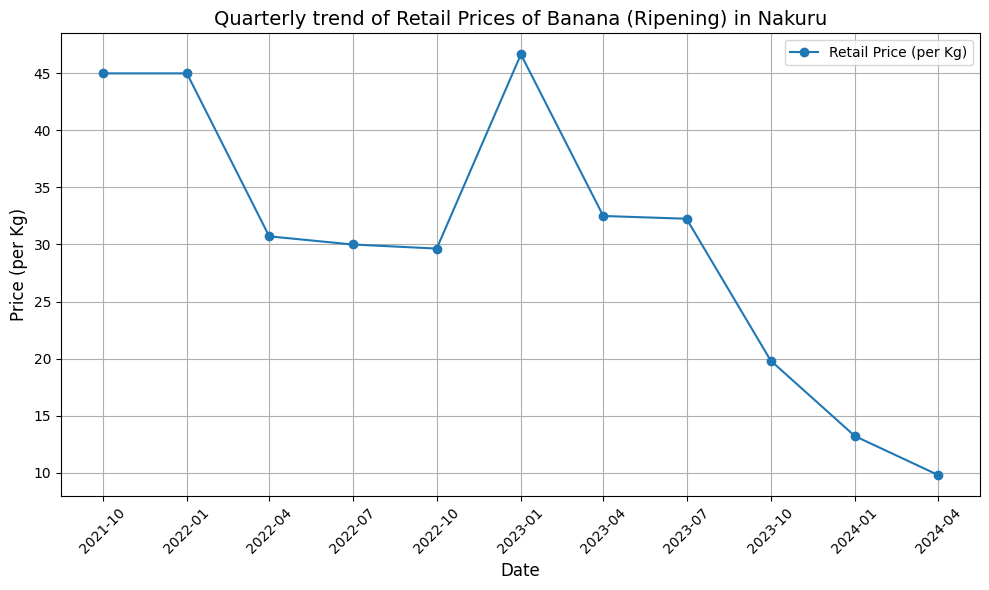

In [141]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_kales_Nakuru[(grouped_by_date_kales_Nakuru['County'] == 'Nakuru') & (grouped_by_date_ripe_Nakuru['Commodity'] == 'Kales/Sukuma Wiki')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Quarter')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Quarter'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Quarterly trend of Retail Prices of Banana (Ripening) in Nakuru', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

## Regular Spinach in Nakuru

###  Create new columns for Monthly trend of Regular Spinach Retail Prices in Nakuru

In [142]:
# Create new columns for month and quarter
cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
#cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_spinach_Nakuru= cleaned_df.groupby(['County', 'Commodity', 'Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_spinach_Nakuru['Month'] = grouped_by_date_spinach_Nakuru['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_spinach_Nakuru)

         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


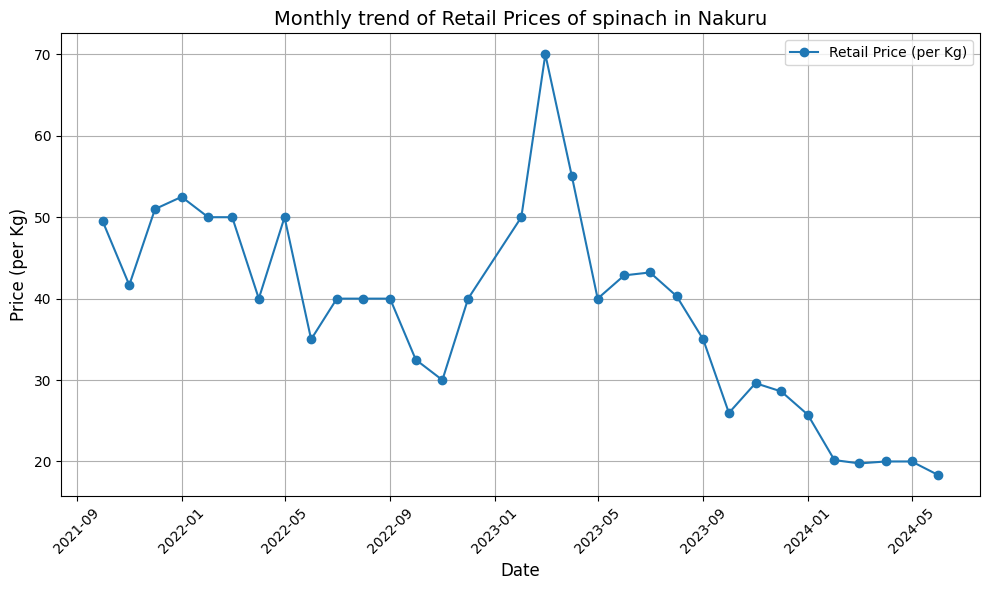

In [143]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_spinach_Nakuru[(grouped_by_date_spinach_Nakuru['County'] == 'Nakuru') & (grouped_by_date_spinach_Nakuru['Commodity'] == 'Spinach')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of spinach in Nakuru', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

### best time Sep-Oct
### Worst time May- June

###  Create new columns for Quarterly trend of Kales Retail Prices in Meru

In [144]:
cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_spinach_Nakuru= cleaned_df.groupby(['County', 'Commodity','Quarter'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_spinach_Nakuru['Quarter'] = grouped_by_date_spinach_Nakuru['Quarter'].dt.to_timestamp()

# Show the result
print(grouped_by_date_spinach_Nakuru)

        County             Commodity    Quarter  Retail_per_kg
0    Kirinyaga      Banana (Cooking) 2021-10-01      23.615682
1    Kirinyaga      Banana (Cooking) 2022-01-01      24.259259
2    Kirinyaga      Banana (Cooking) 2022-04-01      23.416667
3    Kirinyaga      Banana (Cooking) 2022-07-01      25.156250
4    Kirinyaga      Banana (Cooking) 2022-10-01      29.038793
..         ...                   ...        ...            ...
523  Nyandarua  White Irish Potatoes 2022-10-01      45.250000
524  Nyandarua  White Irish Potatoes 2023-01-01      43.916087
525  Nyandarua  White Irish Potatoes 2023-04-01      56.823636
526  Nyandarua  White Irish Potatoes 2023-07-01      70.000000
527  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[528 rows x 4 columns]


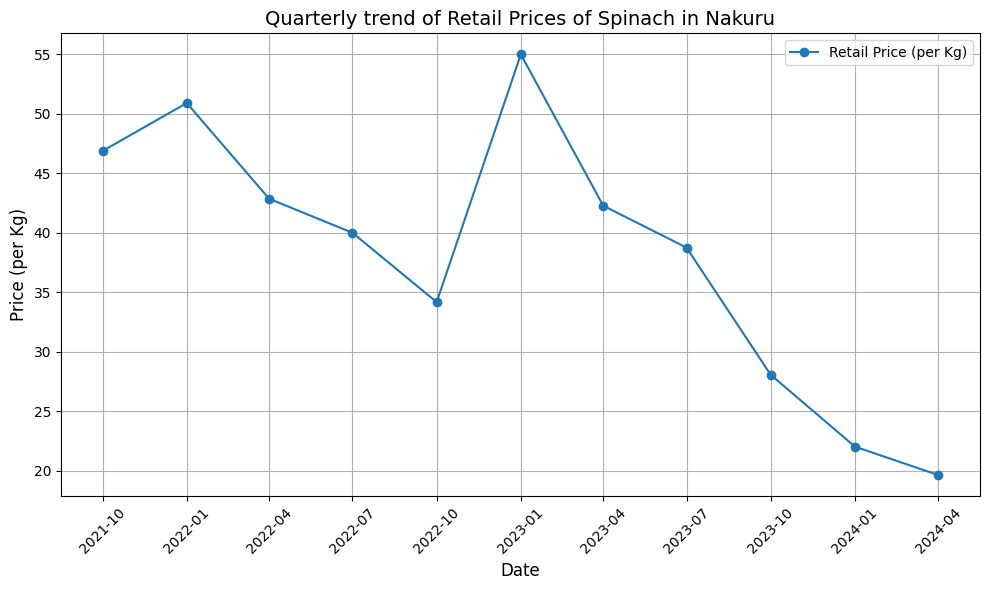

In [145]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_spinach_Nakuru[(grouped_by_date_spinach_Nakuru['County'] == 'Nakuru') & (grouped_by_date_spinach_Nakuru['Commodity'] == 'Spinach')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Quarter')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Quarter'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Quarterly trend of Retail Prices of Spinach in Nakuru', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

## Oranges  

In [146]:
# Create new columns for month and quarter
cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
#cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_oranges_Nakuru= cleaned_df.groupby(['County', 'Commodity', 'Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_oranges_Nakuru['Month'] = grouped_by_date_oranges_Nakuru['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_oranges_Nakuru)

         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


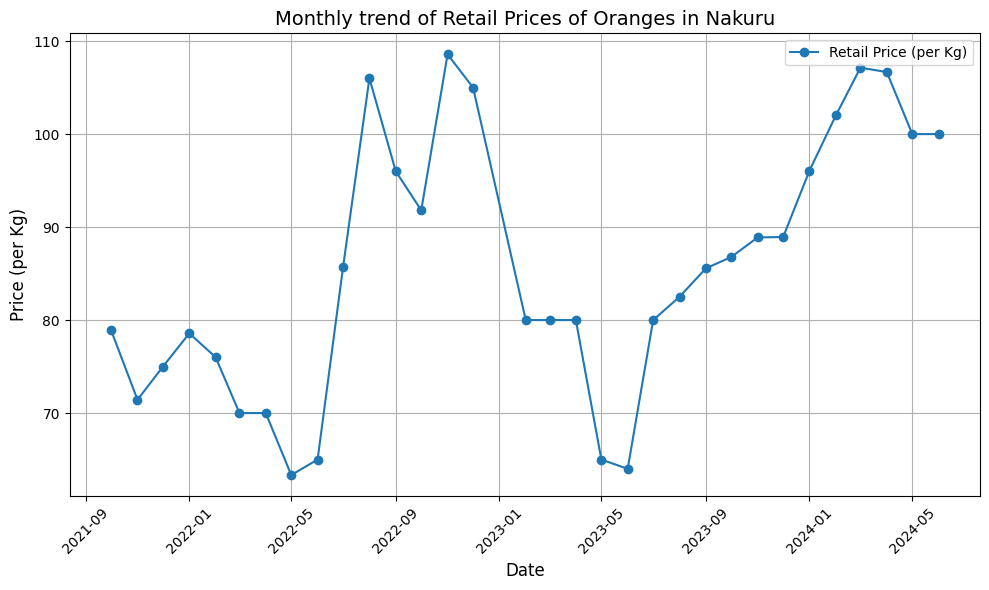

In [147]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_oranges_Nakuru[(grouped_by_date_oranges_Nakuru['County'] == 'Nakuru') & (grouped_by_date_oranges_Nakuru['Commodity'] == 'Oranges')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of Oranges in Nakuru', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

### best time to sell September-October
### worst time to sell Feb-Mar

## Top Prized Markets in Nakuru

### Filter the retail prices in terms of county

C:\Users\Jordan Gamba\AppData\Local\Temp\ipykernel_6948\3725223896.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, x='Market', y='Retail_per_kg', palette='Set2')


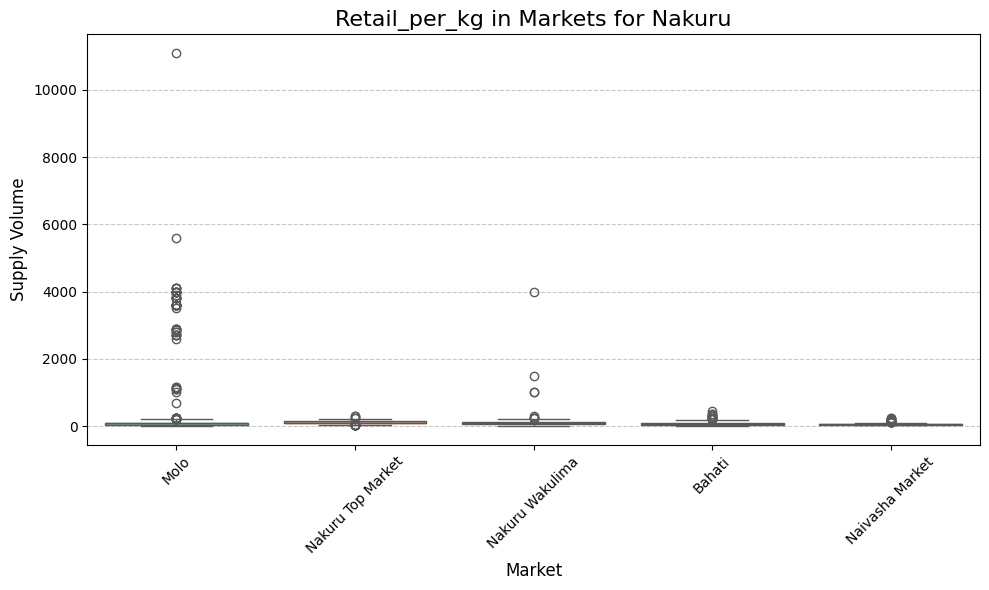

In [148]:
# Filter the data for a specific county
county_name = "Nakuru"  # Replace with the desired county name
filtered_data = combined_df[combined_df['County'] == county_name]

# Create the box plot for supply volumes in all markets within the county
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data, x='Market', y='Retail_per_kg', palette='Set2')

# Customize the plot
plt.title(f"Retail_per_kg in Markets for {county_name}", fontsize=16)
plt.xlabel("Market", fontsize=12)
plt.ylabel("Supply Volume", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

### Remove the outliers and display them

C:\Users\Jordan Gamba\AppData\Local\Temp\ipykernel_6948\1184255594.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data_no_outliers, x='Market', y='Retail_per_kg', palette='Set2')


Cleaned Retail_per_kg (Without Outliers):
                  Market  Retail_per_kg
27                  Molo          30.00
28                  Molo          80.00
29                  Molo         100.00
30                  Molo         100.00
31                  Molo          28.89
...                  ...            ...
35906  Nakuru Top Market         120.00
35925    Nakuru Wakulima         150.00
35926    Nakuru Wakulima          70.00
35931    Nakuru Wakulima          60.00
35939    Nakuru Wakulima          80.00

[5433 rows x 2 columns]


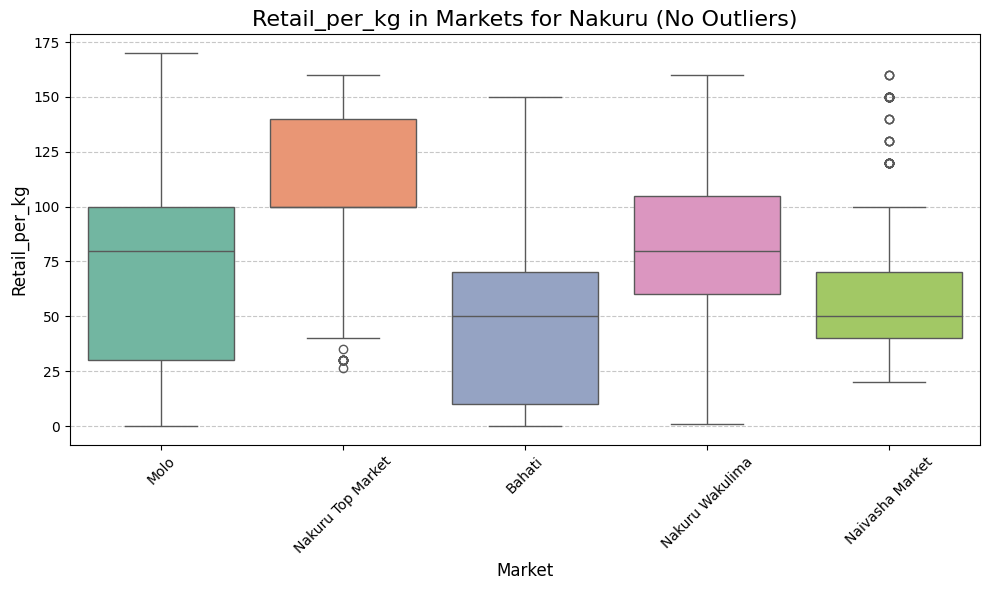

In [149]:
county_name = "Nakuru"  # Replace with the desired county name
filtered_data = combined_df[combined_df['County'] == county_name]

# Remove outliers for Supply Volume
Q1 = filtered_data['Retail_per_kg'].quantile(0.25)
Q3 = filtered_data['Retail_per_kg'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data to remove outliers
filtered_data_no_outliers = filtered_data[
    (filtered_data['Retail_per_kg'] >= lower_bound) & 
    (filtered_data['Retail_per_kg'] <= upper_bound)
]

# Create the box plot for supply volumes in all markets within the county (no outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data_no_outliers, x='Market', y='Retail_per_kg', palette='Set2')

# Customize the plot
plt.title(f"Retail_per_kg in Markets for {county_name} (No Outliers)", fontsize=16)
plt.xlabel("Market", fontsize=12)
plt.ylabel("Retail_per_kg", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Display the cleaned supply volumes
print("Cleaned Retail_per_kg (Without Outliers):")
print(filtered_data_no_outliers[['Market', 'Retail_per_kg']])

# Show the plot
plt.tight_layout()
plt.show()

In [150]:
# Group the filtered data (without outliers) by Market and calculate the total Supply Volume
market_supply_totals = (
    filtered_data_no_outliers.groupby('Market')['Retail_per_kg']
    .sum()
    .sort_values(ascending=False)
)

# Get the top three markets
top_three_markets = market_supply_totals.head(3)

# Display the results
print("Top Three Markets by Supply Volume (No Outliers):")
print(top_three_markets)

Top Three Markets by Supply Volume (No Outliers):
Market
Nakuru Wakulima      143894.18
Molo                 121138.67
Nakuru Top Market    101096.73
Name: Retail_per_kg, dtype: float64


# Nyandarua

## Dry Maize in Nyandarua

###  Create new columns for Monthly trend of Dry Maize Retail Prices in Nyandarua

In [151]:
# Create new columns for month and quarter
cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
#cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_drymaize_Nyandarua= cleaned_df.groupby(['County', 'Commodity', 'Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_drymaize_Nyandarua['Month'] = grouped_by_date_drymaize_Nyandarua['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_drymaize_Nyandarua)

         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


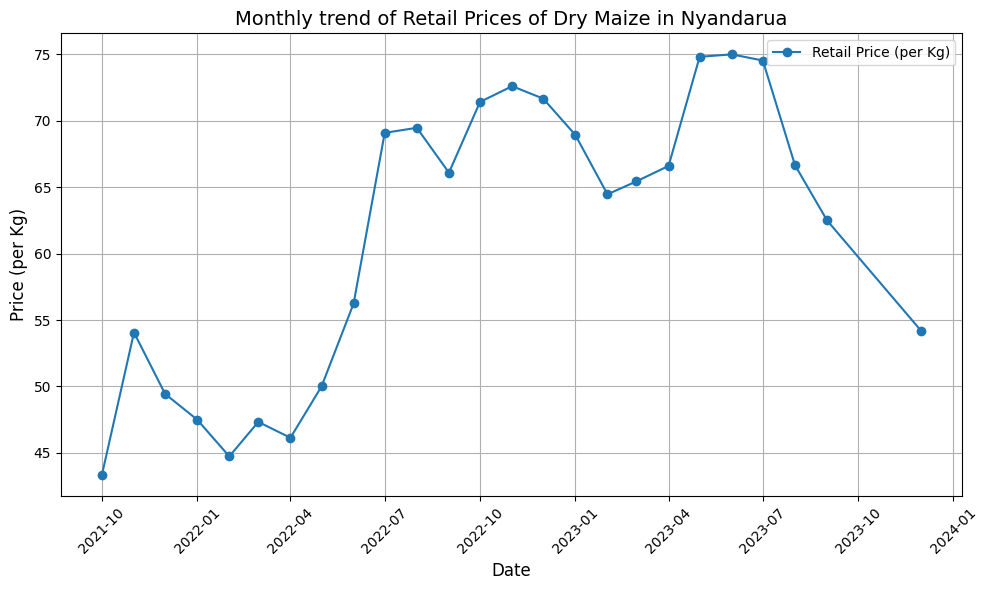

In [152]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_drymaize_Nyandarua[(grouped_by_date_drymaize_Nyandarua['County'] == 'Nyandarua') & (grouped_by_date_drymaize_Nyandarua['Commodity'] == 'Dry Maize')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of Dry Maize in Nyandarua', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

### The data shows that the lowest retail prices occurred around April 2023, when the price dropped to around 55 KES per kg. This would be the best time for a buyer to purchase dry maize, as the prices are at their lowest point during the time period shown.

### Best Time to Sell:
### The highest retail prices are seen around July-September 2022, when the price reached over 70 KES per kg. This would be the worst time for a buyer to purchase dry maize, as the prices are at their peak during this period

###  Create new columns for Quarterly trend of Dry Mazie Retail Prices in Nyandarua

In [153]:
cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_drymaize_Nyandarua= cleaned_df.groupby(['County', 'Commodity', 'Quarter'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_drymaize_Nyandarua['Quarter'] = grouped_by_date_drymaize_Nyandarua['Quarter'].dt.to_timestamp()

# Show the result
print(grouped_by_date_drymaize_Nyandarua)

        County             Commodity    Quarter  Retail_per_kg
0    Kirinyaga      Banana (Cooking) 2021-10-01      23.615682
1    Kirinyaga      Banana (Cooking) 2022-01-01      24.259259
2    Kirinyaga      Banana (Cooking) 2022-04-01      23.416667
3    Kirinyaga      Banana (Cooking) 2022-07-01      25.156250
4    Kirinyaga      Banana (Cooking) 2022-10-01      29.038793
..         ...                   ...        ...            ...
523  Nyandarua  White Irish Potatoes 2022-10-01      45.250000
524  Nyandarua  White Irish Potatoes 2023-01-01      43.916087
525  Nyandarua  White Irish Potatoes 2023-04-01      56.823636
526  Nyandarua  White Irish Potatoes 2023-07-01      70.000000
527  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[528 rows x 4 columns]


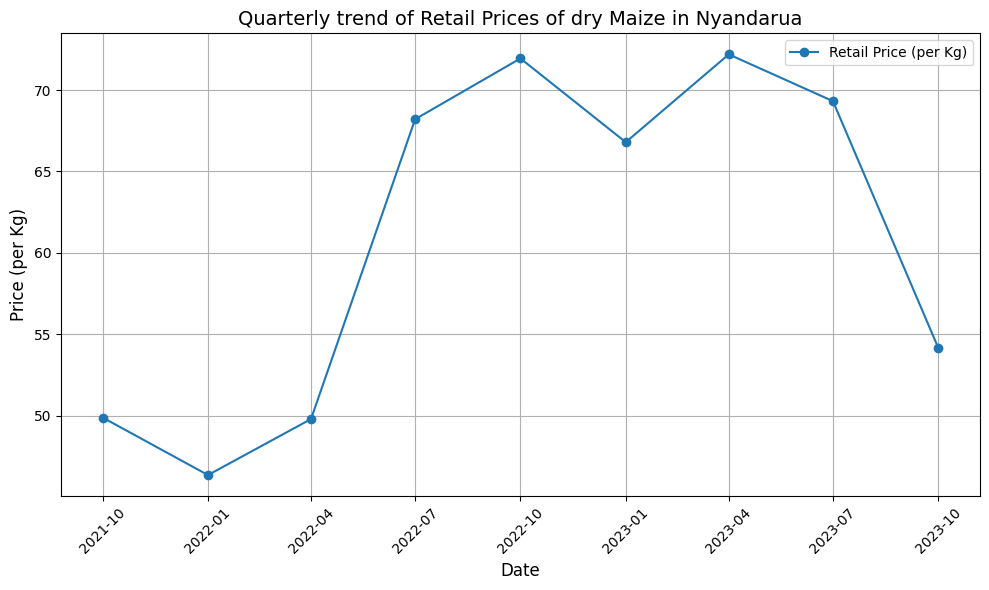

In [154]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_drymaize_Nyandarua[(grouped_by_date_drymaize_Nyandarua['County'] == 'Nyandarua') & (grouped_by_date_drymaize_Nyandarua['Commodity'] == 'Dry Maize')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Quarter')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Quarter'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Quarterly trend of Retail Prices of dry Maize in Nyandarua', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

## Bananas Cooking in Nyandarua

###  Create new columns for Monthly trend of Bananas Cooking Retail Prices in Nyandarua

In [155]:
# Create new columns for month and quarter
cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
#cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_bananascook_Nyandarua= cleaned_df.groupby(['County', 'Commodity', 'Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_bananascook_Nyandarua['Month'] = grouped_by_date_bananascook_Nyandarua['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_bananascook_Nyandarua)

         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


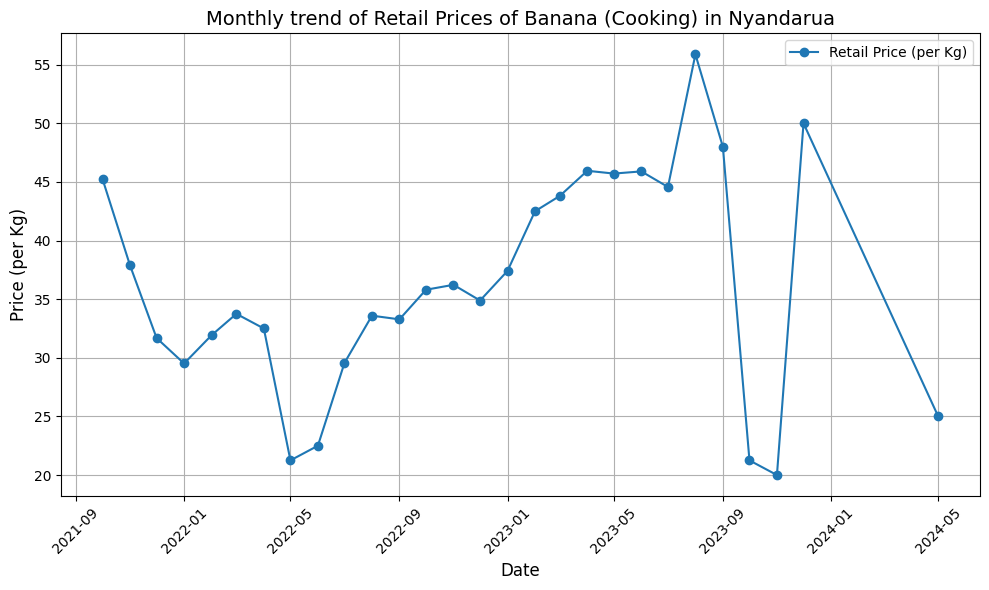

In [156]:
import matplotlib.pyplot as plt
# Banana (Cooking)

# Filter the DataFrame
filtered_df = grouped_by_date_bananascook_Nyandarua[(grouped_by_date_bananascook_Nyandarua['County'] == 'Nyandarua') & (grouped_by_date_bananascook_Nyandarua['Commodity'] == 'Banana (Cooking)')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of Banana (Cooking) in Nyandarua', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

 
### As a buyer, monitoring the market and timing purchases during the lower price periods, such as the February-March 2024 timeframe, would result in the most cost-effective purchases of cooking bananas in Nyandarua.

###  Create new columns for Quarterly trend of Bananas cooking Retail Prices in Nyandarua

In [157]:
cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_cook_Nyandarua= cleaned_df.groupby(['County', 'Commodity','Quarter'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_cook_Nyandarua['Quarter'] = grouped_by_date_cook_Nyandarua['Quarter'].dt.to_timestamp()

# Show the result
print(grouped_by_date_cook_Nyandarua)

        County             Commodity    Quarter  Retail_per_kg
0    Kirinyaga      Banana (Cooking) 2021-10-01      23.615682
1    Kirinyaga      Banana (Cooking) 2022-01-01      24.259259
2    Kirinyaga      Banana (Cooking) 2022-04-01      23.416667
3    Kirinyaga      Banana (Cooking) 2022-07-01      25.156250
4    Kirinyaga      Banana (Cooking) 2022-10-01      29.038793
..         ...                   ...        ...            ...
523  Nyandarua  White Irish Potatoes 2022-10-01      45.250000
524  Nyandarua  White Irish Potatoes 2023-01-01      43.916087
525  Nyandarua  White Irish Potatoes 2023-04-01      56.823636
526  Nyandarua  White Irish Potatoes 2023-07-01      70.000000
527  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[528 rows x 4 columns]


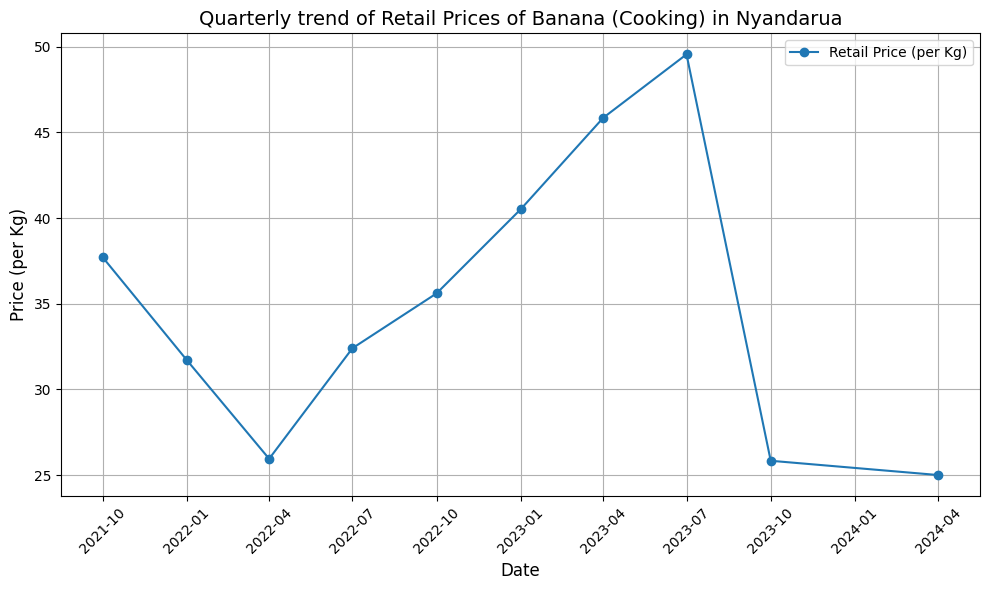

In [158]:
import matplotlib.pyplot as plt
# Banana (Cooking)

# Filter the DataFrame
filtered_df = grouped_by_date_cook_Nyandarua[(grouped_by_date_cook_Nyandarua['County'] == 'Nyandarua') & (grouped_by_date_cook_Nyandarua['Commodity'] == 'Banana (Cooking)')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Quarter')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Quarter'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Quarterly trend of Retail Prices of Banana (Cooking) in Nyandarua', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

## White Irish Potatoes in Nyandarua

###  Create new columns for Monthly trend of White Irish Potatoes Retail Prices in Nyandarua

In [159]:
# Create new columns for month and quarter
cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
#cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_whiteirish_Nyandarua= cleaned_df.groupby(['County', 'Commodity', 'Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_whiteirish_Nyandarua['Month'] = grouped_by_date_whiteirish_Nyandarua['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_whiteirish_Nyandarua)

         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


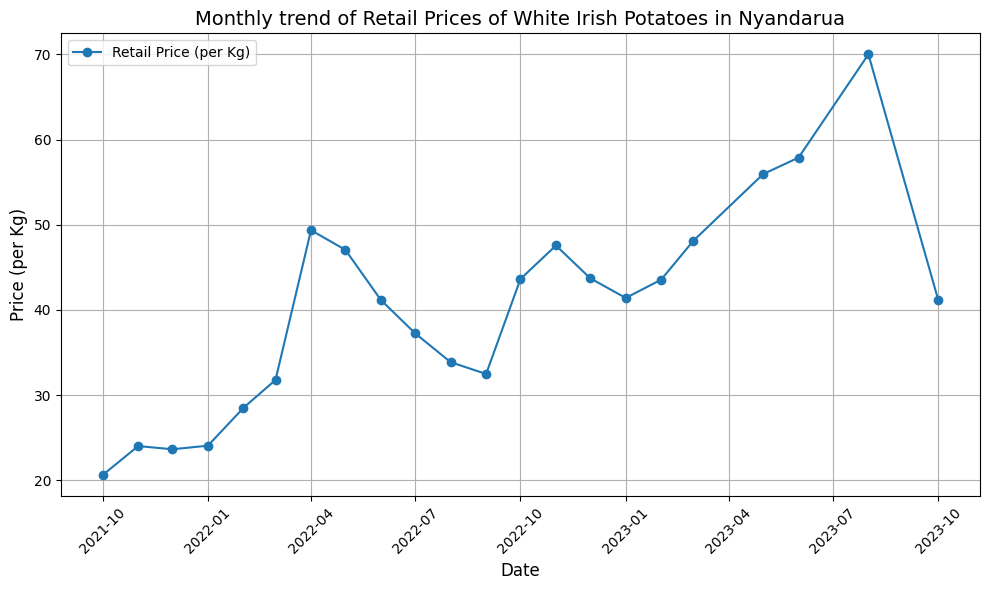

In [160]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_whiteirish_Nyandarua[(grouped_by_date_whiteirish_Nyandarua['County'] == 'Nyandarua') & (grouped_by_date_whiteirish_Nyandarua['Commodity'] == 'White Irish Potatoes')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of White Irish Potatoes in Nyandarua', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

### As a buyer, monitoring the market and timing purchases during the lower price periods, such as the March 2022 timeframe, would result in the most cost-effective purchases of white Irish potatoes in Nyandarua.

###  Create new columns for Quarterly trend of White Irish Retail Prices in Nyandarua

In [161]:
cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_whiteirish_Nyandarua= cleaned_df.groupby(['County', 'Commodity','Quarter'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_whiteirish_Nyandarua['Quarter'] = grouped_by_date_whiteirish_Nyandarua['Quarter'].dt.to_timestamp()

# Show the result
print(grouped_by_date_whiteirish_Nyandarua)

        County             Commodity    Quarter  Retail_per_kg
0    Kirinyaga      Banana (Cooking) 2021-10-01      23.615682
1    Kirinyaga      Banana (Cooking) 2022-01-01      24.259259
2    Kirinyaga      Banana (Cooking) 2022-04-01      23.416667
3    Kirinyaga      Banana (Cooking) 2022-07-01      25.156250
4    Kirinyaga      Banana (Cooking) 2022-10-01      29.038793
..         ...                   ...        ...            ...
523  Nyandarua  White Irish Potatoes 2022-10-01      45.250000
524  Nyandarua  White Irish Potatoes 2023-01-01      43.916087
525  Nyandarua  White Irish Potatoes 2023-04-01      56.823636
526  Nyandarua  White Irish Potatoes 2023-07-01      70.000000
527  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[528 rows x 4 columns]


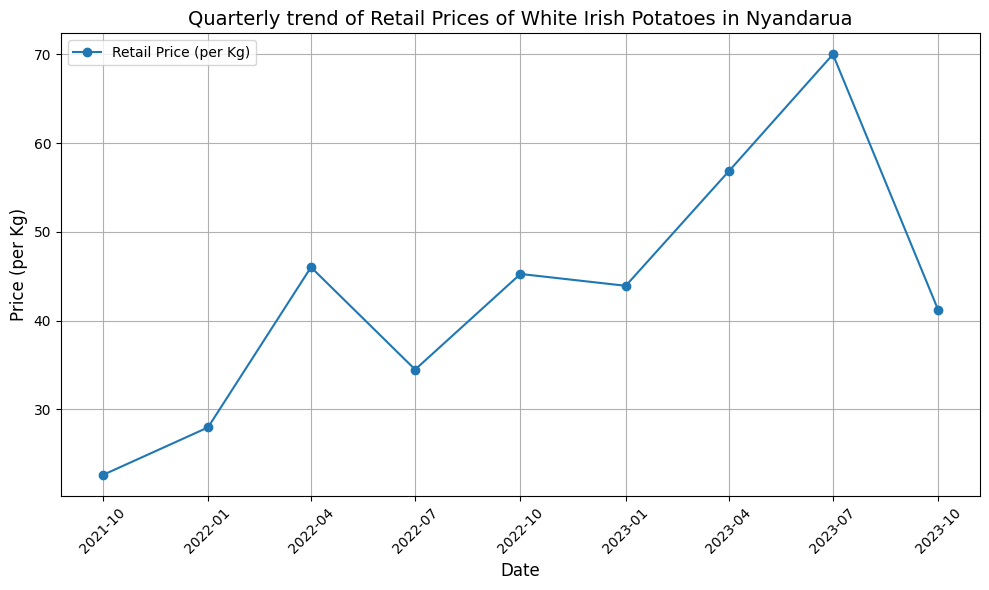

In [162]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_whiteirish_Nyandarua[(grouped_by_date_whiteirish_Nyandarua['County'] == 'Nyandarua') & (grouped_by_date_whiteirish_Nyandarua['Commodity'] == 'White Irish Potatoes')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Quarter')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Quarter'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Quarterly trend of Retail Prices of White Irish Potatoes in Nyandarua', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

## Dry Onions in Nyandarua

###  Create new columns for Monthly trend of Dry Onions Retail Prices in Nyandarua

In [163]:
# Create new columns for month and quarter
cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
#cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_dryonions_Nyandarua= cleaned_df.groupby(['County', 'Commodity', 'Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_dryonions_Nyandarua['Month'] = grouped_by_date_dryonions_Nyandarua['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_dryonions_Nyandarua)

         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


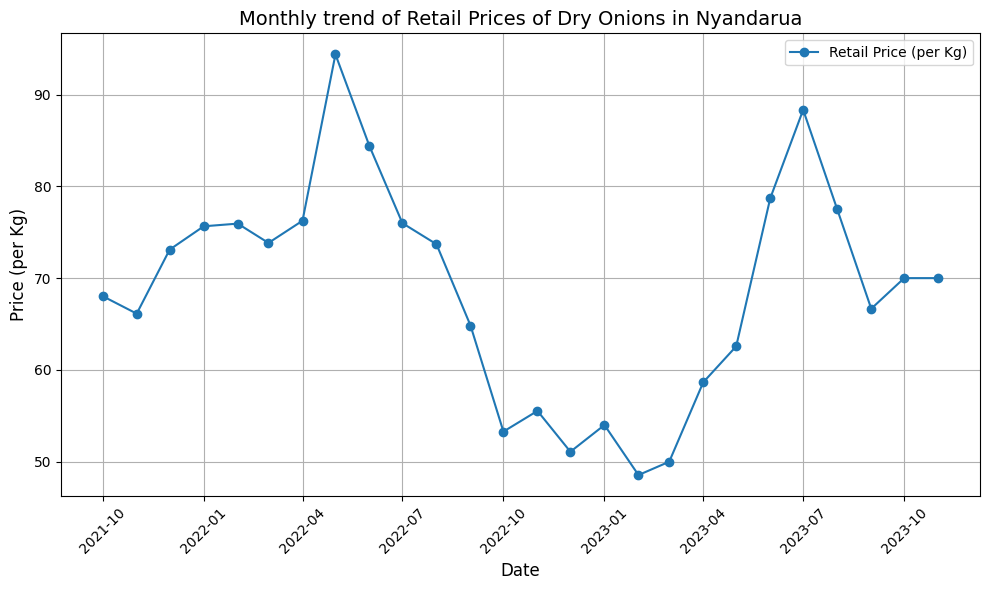

In [164]:
# Filter the DataFrame
filtered_df = grouped_by_date_dryonions_Nyandarua[(grouped_by_date_dryonions_Nyandarua['County'] == 'Nyandarua') & (grouped_by_date_dryonions_Nyandarua['Commodity'] == 'Dry Onions')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of Dry Onions in Nyandarua', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

### As a buyer, monitoring the market and timing purchases during the lower price periods, such as the November 2022 timeframe, would result in the most cost-effective purchases of dry onions in Nyandarua.

### Best time to sell Apr-June
### Worst time July-Aug

###  Create new columns for Quarterly trend of Dry Onions Retail Prices in Nyandarua

In [165]:
cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_dryonions_Nyandarua= cleaned_df.groupby(['County', 'Commodity','Quarter'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_dryonions_Nyandarua['Quarter'] = grouped_by_date_dryonions_Nyandarua['Quarter'].dt.to_timestamp()

# Show the result
print(grouped_by_date_dryonions_Nyandarua)

        County             Commodity    Quarter  Retail_per_kg
0    Kirinyaga      Banana (Cooking) 2021-10-01      23.615682
1    Kirinyaga      Banana (Cooking) 2022-01-01      24.259259
2    Kirinyaga      Banana (Cooking) 2022-04-01      23.416667
3    Kirinyaga      Banana (Cooking) 2022-07-01      25.156250
4    Kirinyaga      Banana (Cooking) 2022-10-01      29.038793
..         ...                   ...        ...            ...
523  Nyandarua  White Irish Potatoes 2022-10-01      45.250000
524  Nyandarua  White Irish Potatoes 2023-01-01      43.916087
525  Nyandarua  White Irish Potatoes 2023-04-01      56.823636
526  Nyandarua  White Irish Potatoes 2023-07-01      70.000000
527  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[528 rows x 4 columns]


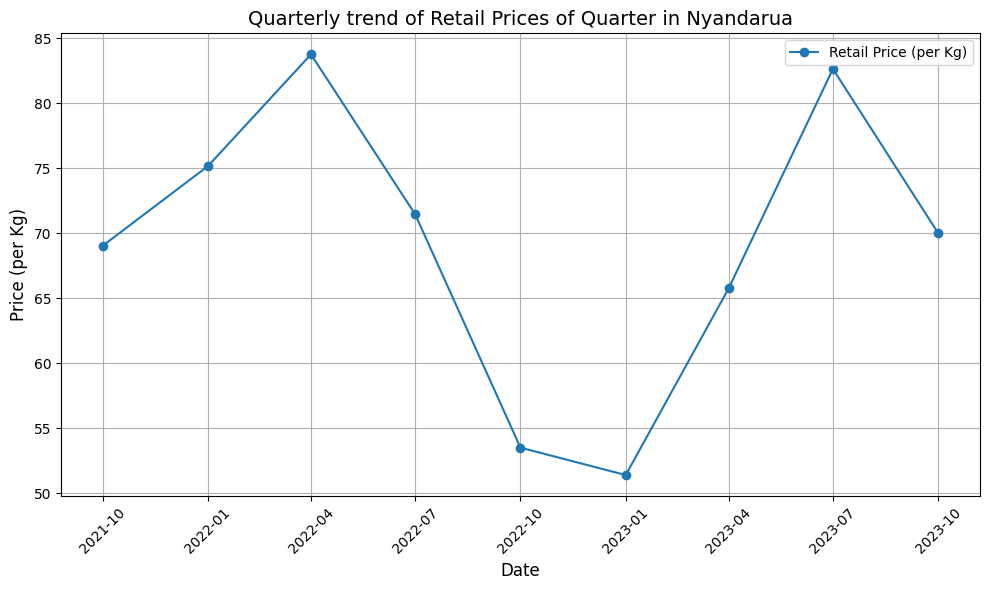

In [166]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_dryonions_Nyandarua[(grouped_by_date_dryonions_Nyandarua['County'] == 'Nyandarua') & (grouped_by_date_dryonions_Nyandarua['Commodity'] == 'Dry Onions')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Quarter')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Quarter'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Quarterly trend of Retail Prices of Quarter in Nyandarua', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

## Water Melons in Nyandarua

###  Create new columns for Monthly trend of Water Melons Retail Prices in Nyandarua

In [167]:
# Create new columns for month and quarter
cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
#cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_watermelons_Nyandarua= cleaned_df.groupby(['County', 'Commodity', 'Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_watermelons_Nyandarua['Month'] = grouped_by_date_watermelons_Nyandarua['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_watermelons_Nyandarua)

         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


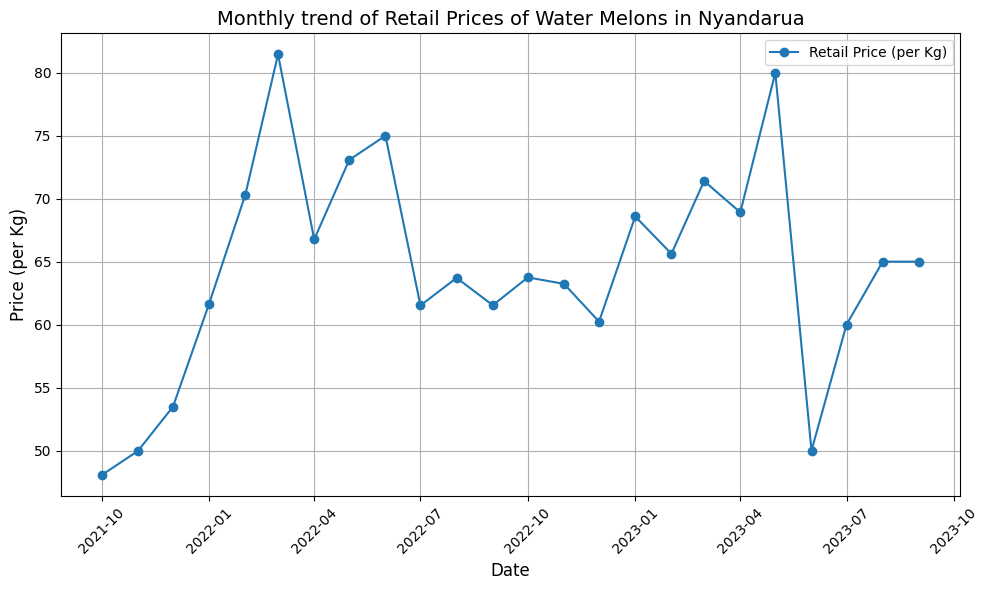

In [168]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_watermelons_Nyandarua[(grouped_by_date_watermelons_Nyandarua['County'] == 'Nyandarua') & (grouped_by_date_watermelons_Nyandarua['Commodity'] == 'Water Melon')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of Water Melons in Nyandarua', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


### As a buyer, monitoring the market and timing purchases during the lower price periods, such as the April 2023 timeframe, would result in the most cost-effective purchases of water melons in Nyandarua.

###  Create new columns for Quarterly trend of Water Melon Prices in Nyandarua

In [169]:
cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_watermelon_Nyandarua= cleaned_df.groupby(['County', 'Commodity','Quarter'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_watermelon_Nyandarua['Quarter'] = grouped_by_date_watermelon_Nyandarua['Quarter'].dt.to_timestamp()

# Show the result
print(grouped_by_date_watermelon_Nyandarua)

        County             Commodity    Quarter  Retail_per_kg
0    Kirinyaga      Banana (Cooking) 2021-10-01      23.615682
1    Kirinyaga      Banana (Cooking) 2022-01-01      24.259259
2    Kirinyaga      Banana (Cooking) 2022-04-01      23.416667
3    Kirinyaga      Banana (Cooking) 2022-07-01      25.156250
4    Kirinyaga      Banana (Cooking) 2022-10-01      29.038793
..         ...                   ...        ...            ...
523  Nyandarua  White Irish Potatoes 2022-10-01      45.250000
524  Nyandarua  White Irish Potatoes 2023-01-01      43.916087
525  Nyandarua  White Irish Potatoes 2023-04-01      56.823636
526  Nyandarua  White Irish Potatoes 2023-07-01      70.000000
527  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[528 rows x 4 columns]


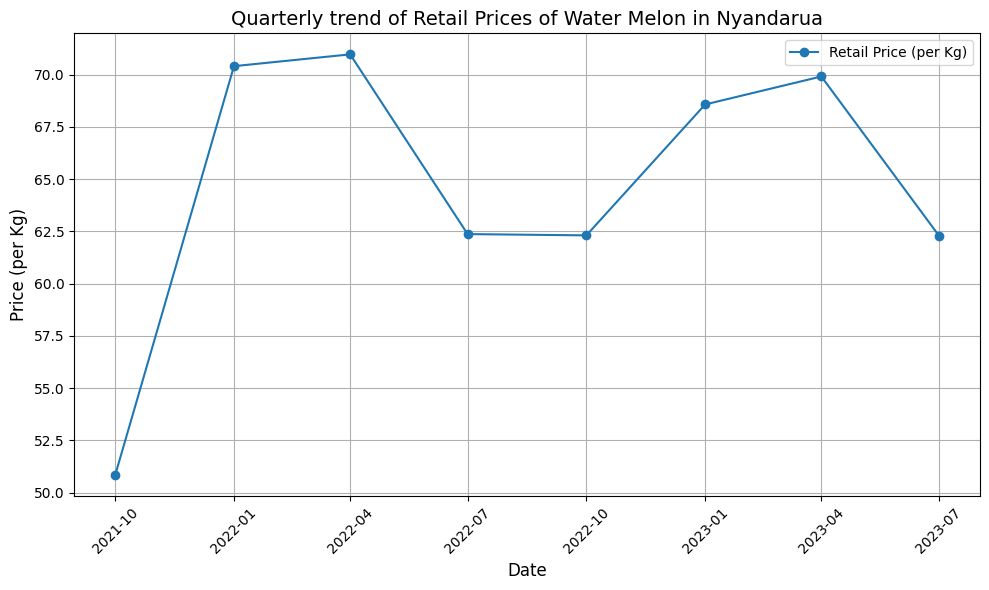

In [170]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_watermelon_Nyandarua[(grouped_by_date_watermelon_Nyandarua['County'] == 'Nyandarua') & (grouped_by_date_watermelon_Nyandarua['Commodity'] == 'Water Melon')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Quarter')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Quarter'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Quarterly trend of Retail Prices of Water Melon in Nyandarua', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

## Mangoes in Nyandarua

###  Create new columns for Monthly trend of Mangoes Retail Prices in Nyandarua

In [171]:
cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
#cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_mangoes_Nyandarua= cleaned_df.groupby(['County', 'Commodity', 'Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_mangoes_Nyandarua['Month'] = grouped_by_date_mangoes_Nyandarua['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_mangoes_Nyandarua)

         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


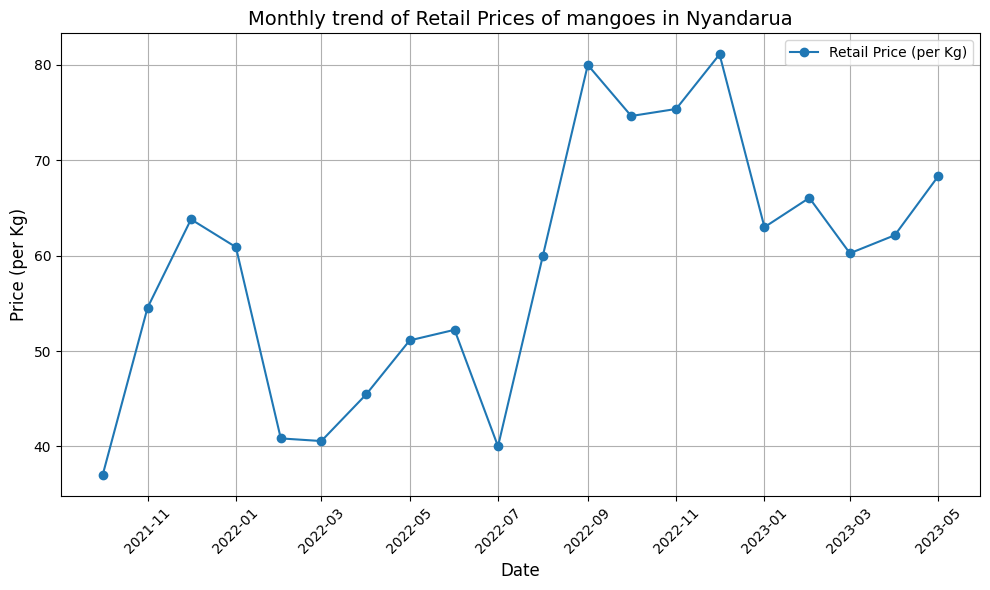

In [172]:
import matplotlib.pyplot as plt
# Banana (Cooking)

# Filter the DataFrame
filtered_df = grouped_by_date_mangoes_Nyandarua[(grouped_by_date_mangoes_Nyandarua['County'] == 'Nyandarua') & (grouped_by_date_mangoes_Nyandarua['Commodity'] == 'Mangoes')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of mangoes in Nyandarua', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

### Best Time to Buy
### March 2022: Prices are at their lowest during this period, making it ideal for buyers looking for affordability.
    
### Worst Time to Buy
### September 2022: Prices are at their highest, making it the least favorable time to purchase mangoes.

###  Create new columns for Quarterly trend of Mangoes Retail Prices in Nyandarua

In [173]:
cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_mangoes_Nyandarua= cleaned_df.groupby(['County', 'Commodity','Quarter'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_mangoes_Nyandarua['Quarter'] = grouped_by_date_mangoes_Nyandarua['Quarter'].dt.to_timestamp()

# Show the result
print(grouped_by_date_mangoes_Nyandarua)

        County             Commodity    Quarter  Retail_per_kg
0    Kirinyaga      Banana (Cooking) 2021-10-01      23.615682
1    Kirinyaga      Banana (Cooking) 2022-01-01      24.259259
2    Kirinyaga      Banana (Cooking) 2022-04-01      23.416667
3    Kirinyaga      Banana (Cooking) 2022-07-01      25.156250
4    Kirinyaga      Banana (Cooking) 2022-10-01      29.038793
..         ...                   ...        ...            ...
523  Nyandarua  White Irish Potatoes 2022-10-01      45.250000
524  Nyandarua  White Irish Potatoes 2023-01-01      43.916087
525  Nyandarua  White Irish Potatoes 2023-04-01      56.823636
526  Nyandarua  White Irish Potatoes 2023-07-01      70.000000
527  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[528 rows x 4 columns]


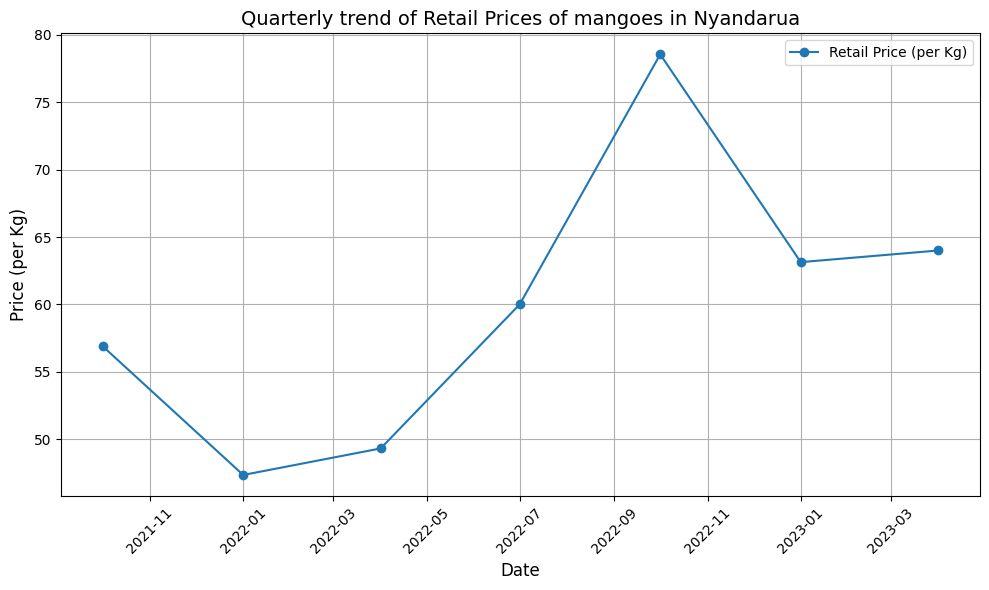

In [174]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_mangoes_Nyandarua[(grouped_by_date_mangoes_Nyandarua['County'] == 'Nyandarua') & (grouped_by_date_mangoes_Nyandarua['Commodity'] == 'Mangoes')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Quarter')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Quarter'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Quarterly trend of Retail Prices of mangoes in Nyandarua', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

## Ripe Bananas in Nyandarua

###  Create new columns for Monthly trend of Ripe Bananas Retail Prices in Nyandarua

In [175]:
# Create new columns for month and quarter
cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
#cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_ripe_Nyandarua= cleaned_df.groupby(['County', 'Commodity', 'Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_ripe_Nyandarua['Month'] = grouped_by_date_ripe_Nyandarua['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_ripe_Nyandarua)

         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


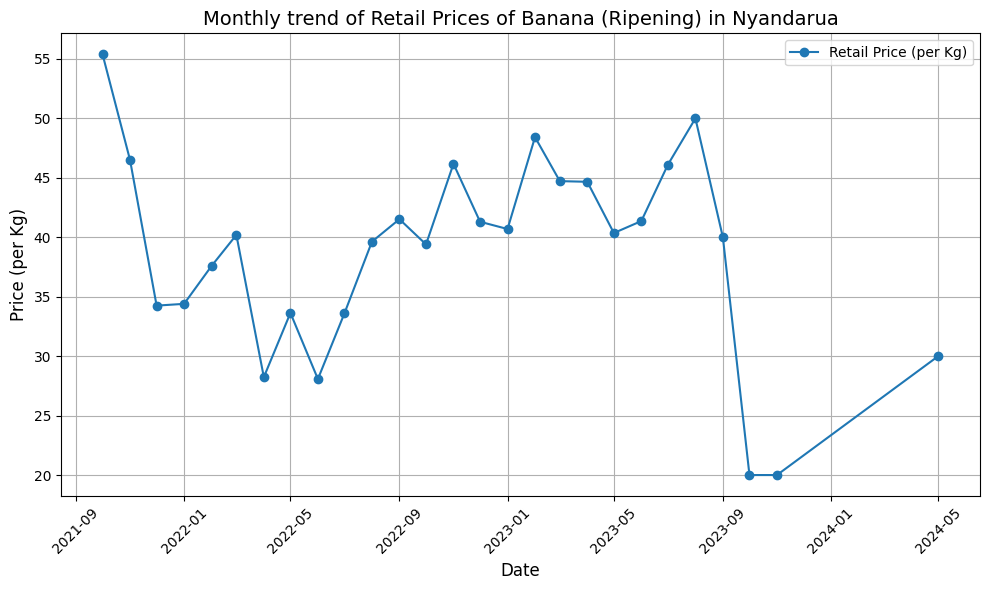

In [176]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_ripe_Nyandarua[(grouped_by_date_ripe_Nyandarua['County'] == 'Nyandarua') & (grouped_by_date_ripe_Nyandarua['Commodity'] == 'Banana (Ripening)')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of Banana (Ripening) in Nyandarua', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

### Best Time to Buy
### September 2023 to early 2024: Prices are at their lowest during this period, making it the best time for buyers to purchase bananas economically.
### Worst Time to Buy
### September 2021: Prices are at their peak during this period, making it the least favorable time for cost-conscious buyers.

###  Create new columns for Quarterly trend of Ripe Bananas Prices in Nyandarua

In [177]:
cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_ripe_Nyandarua= cleaned_df.groupby(['County', 'Commodity','Quarter'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_ripe_Nyandarua['Quarter'] = grouped_by_date_ripe_Nyandarua['Quarter'].dt.to_timestamp()

# Show the result
print(grouped_by_date_ripe_Nyandarua)

        County             Commodity    Quarter  Retail_per_kg
0    Kirinyaga      Banana (Cooking) 2021-10-01      23.615682
1    Kirinyaga      Banana (Cooking) 2022-01-01      24.259259
2    Kirinyaga      Banana (Cooking) 2022-04-01      23.416667
3    Kirinyaga      Banana (Cooking) 2022-07-01      25.156250
4    Kirinyaga      Banana (Cooking) 2022-10-01      29.038793
..         ...                   ...        ...            ...
523  Nyandarua  White Irish Potatoes 2022-10-01      45.250000
524  Nyandarua  White Irish Potatoes 2023-01-01      43.916087
525  Nyandarua  White Irish Potatoes 2023-04-01      56.823636
526  Nyandarua  White Irish Potatoes 2023-07-01      70.000000
527  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[528 rows x 4 columns]


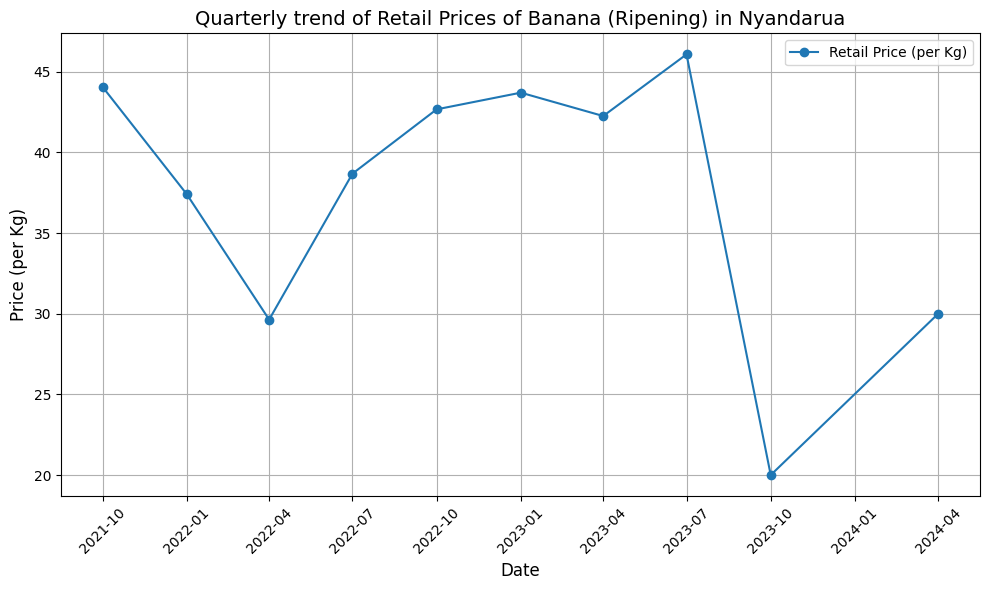

In [178]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_ripe_Nyandarua[(grouped_by_date_ripe_Nyandarua['County'] == 'Nyandarua') & (grouped_by_date_ripe_Nyandarua['Commodity'] == 'Banana (Ripening)')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Quarter')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Quarter'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Quarterly trend of Retail Prices of Banana (Ripening) in Nyandarua', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

## Kales in Nyandarua

###  Create new columns for Monthly trend of Kales Retail Prices in Nyandarua

In [179]:
# Create new columns for month and quarter
cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
#cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_kales_Nyandarua= cleaned_df.groupby(['County', 'Commodity', 'Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_kales_Nyandarua['Month'] = grouped_by_date_kales_Nyandarua['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_kales_Nyandarua)

         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


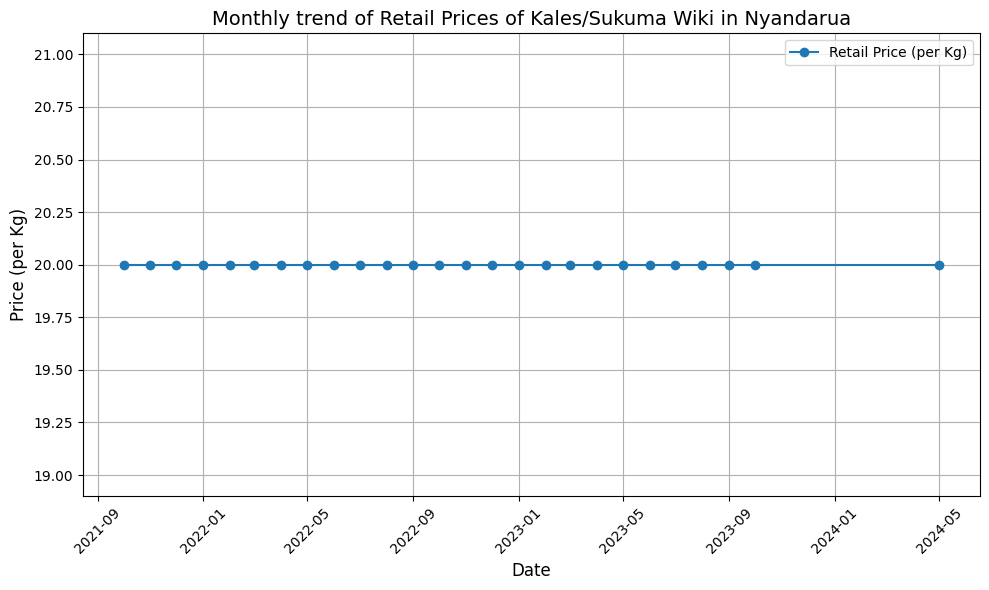

In [180]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_kales_Nyandarua[(grouped_by_date_kales_Nyandarua['County'] == 'Nyandarua') & (grouped_by_date_kales_Nyandarua['Commodity'] == 'Kales/Sukuma Wiki')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of Kales/Sukuma Wiki in Nyandarua', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

## Price has remained stagnant over the course of 3 years

###  Create new columns for Quarterly trend of Kales Retail Prices in Nyandarua

In [181]:
cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_kales_Nyandarua= cleaned_df.groupby(['County', 'Commodity','Quarter'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_kales_Nyandarua['Quarter'] = grouped_by_date_kales_Nyandarua['Quarter'].dt.to_timestamp()

# Show the result
print(grouped_by_date_kales_Nyandarua)

        County             Commodity    Quarter  Retail_per_kg
0    Kirinyaga      Banana (Cooking) 2021-10-01      23.615682
1    Kirinyaga      Banana (Cooking) 2022-01-01      24.259259
2    Kirinyaga      Banana (Cooking) 2022-04-01      23.416667
3    Kirinyaga      Banana (Cooking) 2022-07-01      25.156250
4    Kirinyaga      Banana (Cooking) 2022-10-01      29.038793
..         ...                   ...        ...            ...
523  Nyandarua  White Irish Potatoes 2022-10-01      45.250000
524  Nyandarua  White Irish Potatoes 2023-01-01      43.916087
525  Nyandarua  White Irish Potatoes 2023-04-01      56.823636
526  Nyandarua  White Irish Potatoes 2023-07-01      70.000000
527  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[528 rows x 4 columns]


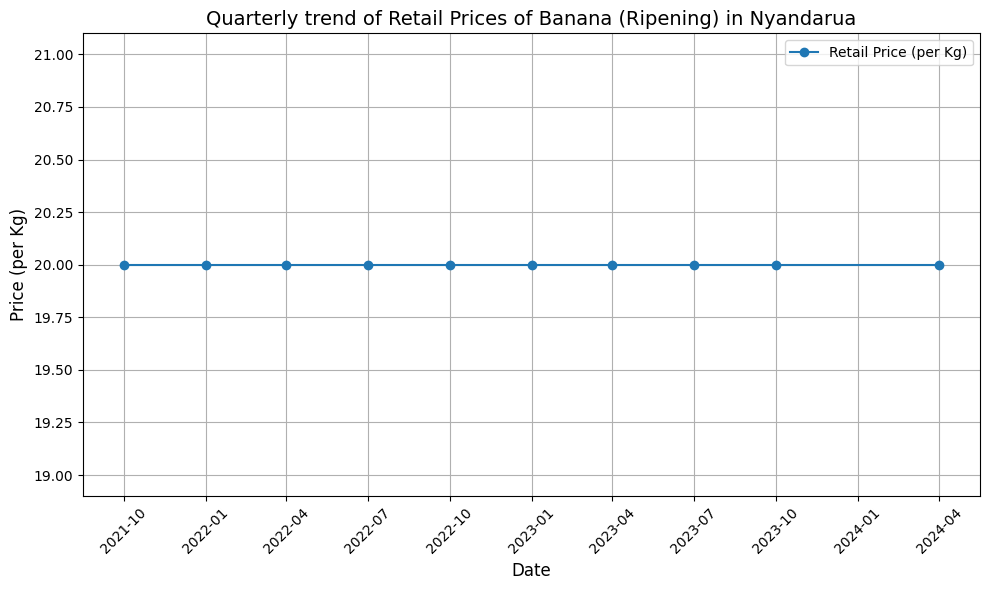

In [182]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_kales_Nyandarua[(grouped_by_date_kales_Nakuru['County'] == 'Nyandarua') & (grouped_by_date_ripe_Nyandarua['Commodity'] == 'Kales/Sukuma Wiki')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Quarter')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Quarter'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Quarterly trend of Retail Prices of Banana (Ripening) in Nyandarua', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

## Regular Spinach in Nyandarua

###  Create new columns for Monthly trend of Regular Spinach Retail Prices in Nyandarua

In [183]:
# Create new columns for month and quarter
cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
#cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_spinach_Nyandarua= cleaned_df.groupby(['County', 'Commodity', 'Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_spinach_Nyandarua['Month'] = grouped_by_date_spinach_Nyandarua['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_spinach_Nyandarua)

         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


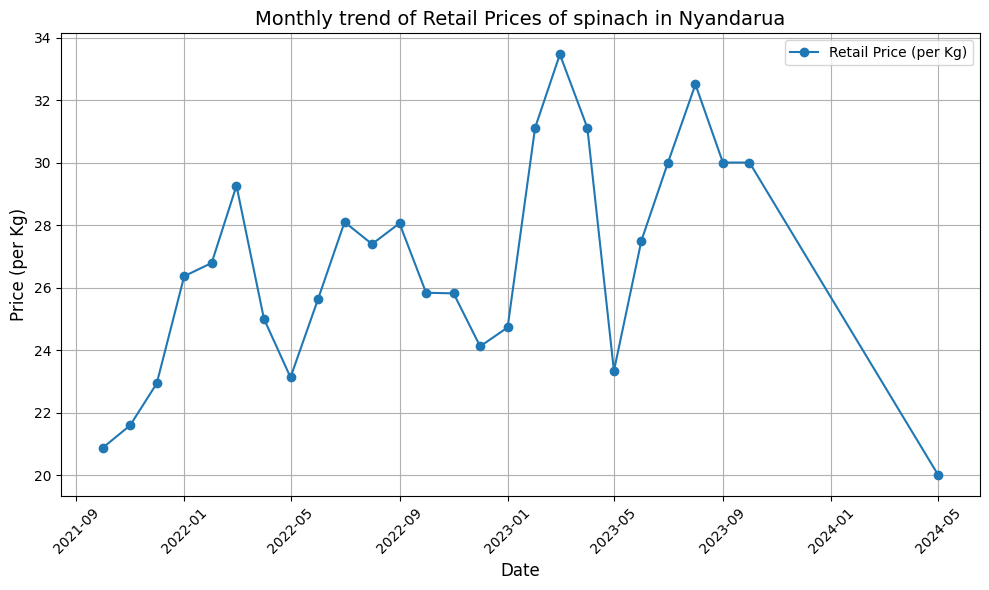

In [184]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_spinach_Nyandarua[(grouped_by_date_spinach_Nyandarua['County'] == 'Nyandarua') & (grouped_by_date_spinach_Nyandarua['Commodity'] == 'Spinach')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of spinach in Nyandarua', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

### Best Time to Buy
### May 2024: Prices are at their lowest, making it the most economical period to purchase spinach.
### Worst Time to Buy
### January 2023: Prices reach their peak, making it the least favorable time for buyers

###  Create new columns for Quarterly trend of Spinach Retail Prices in Nyandarua

In [185]:
cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_spinach_Nyandarua= cleaned_df.groupby(['County', 'Commodity','Quarter'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_spinach_Nyandarua['Quarter'] = grouped_by_date_spinach_Nyandarua['Quarter'].dt.to_timestamp()

# Show the result
print(grouped_by_date_spinach_Nyandarua)

        County             Commodity    Quarter  Retail_per_kg
0    Kirinyaga      Banana (Cooking) 2021-10-01      23.615682
1    Kirinyaga      Banana (Cooking) 2022-01-01      24.259259
2    Kirinyaga      Banana (Cooking) 2022-04-01      23.416667
3    Kirinyaga      Banana (Cooking) 2022-07-01      25.156250
4    Kirinyaga      Banana (Cooking) 2022-10-01      29.038793
..         ...                   ...        ...            ...
523  Nyandarua  White Irish Potatoes 2022-10-01      45.250000
524  Nyandarua  White Irish Potatoes 2023-01-01      43.916087
525  Nyandarua  White Irish Potatoes 2023-04-01      56.823636
526  Nyandarua  White Irish Potatoes 2023-07-01      70.000000
527  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[528 rows x 4 columns]


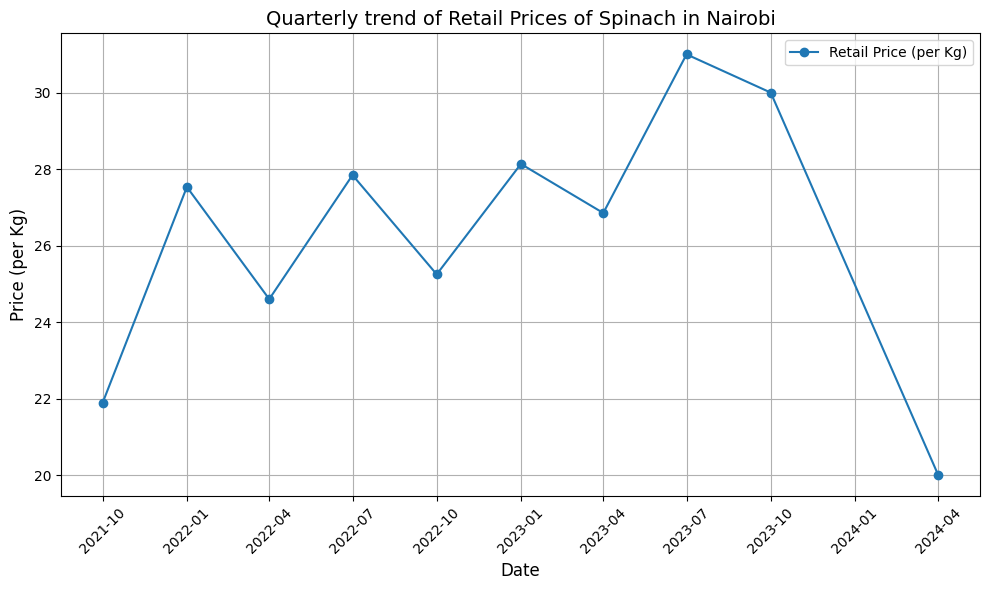

In [186]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_spinach_Nyandarua[(grouped_by_date_spinach_Nyandarua['County'] == 'Nyandarua') & (grouped_by_date_spinach_Nyandarua['Commodity'] == 'Spinach')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Quarter')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Quarter'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Quarterly trend of Retail Prices of Spinach in Nairobi', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

## Top Prized Markets in Nyandarua

### Filter the retail prices in terms of county

C:\Users\Jordan Gamba\AppData\Local\Temp\ipykernel_6948\151982397.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, x='Market', y='Retail_per_kg', palette='Set2')


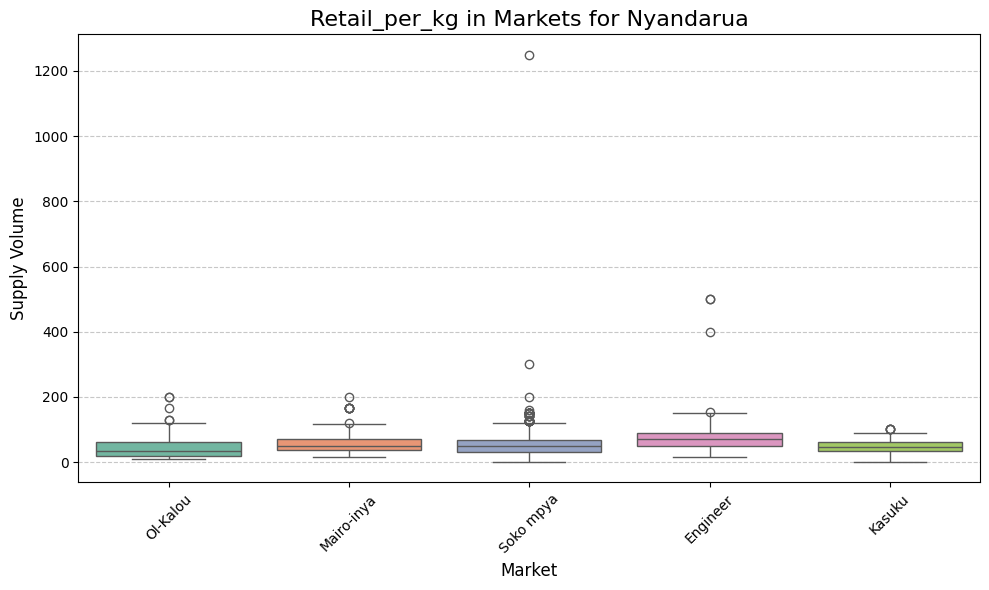

In [187]:
# Filter the data for a specific county
county_name = "Nyandarua"  # Replace with the desired county name
filtered_data = combined_df[combined_df['County'] == county_name]

# Create the box plot for supply volumes in all markets within the county
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data, x='Market', y='Retail_per_kg', palette='Set2')

# Customize the plot
plt.title(f"Retail_per_kg in Markets for {county_name}", fontsize=16)
plt.xlabel("Market", fontsize=12)
plt.ylabel("Supply Volume", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\Jordan Gamba\AppData\Local\Temp\ipykernel_6948\2645784748.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data_no_outliers, x='Market', y='Retail_per_kg', palette='Set2')


Cleaned Retail_per_kg (Without Outliers):
          Market  Retail_per_kg
574     Ol-Kalou           30.0
576     Ol-Kalou           20.0
667     Ol-Kalou           30.0
671     Ol-Kalou           20.0
672     Ol-Kalou           20.0
...          ...            ...
35990  Soko mpya           62.5
35991  Soko mpya           20.0
35992  Soko mpya           20.0
35993  Soko mpya           60.0
35994  Soko mpya           30.0

[4856 rows x 2 columns]


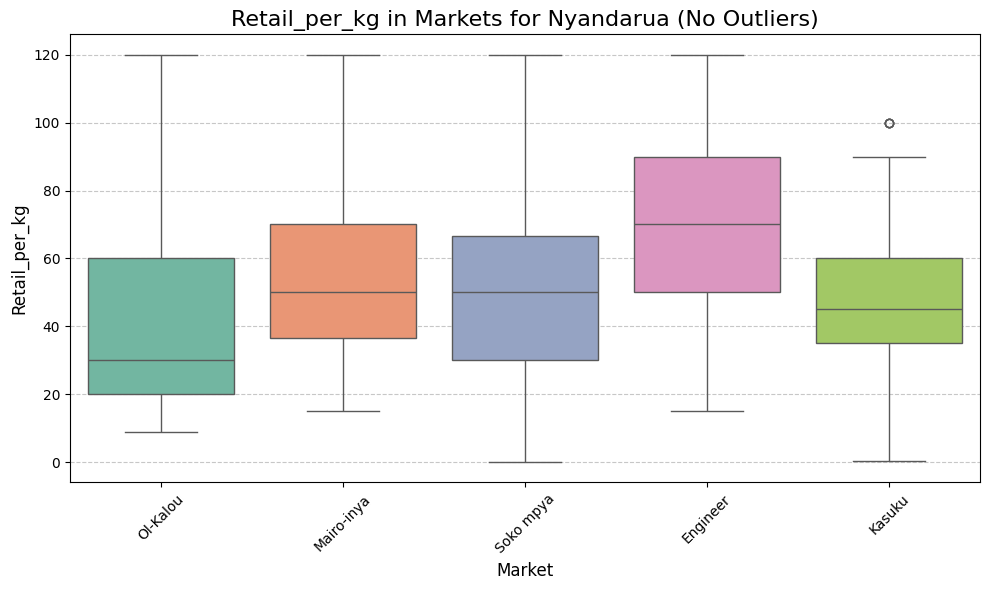

In [236]:
county_name = "Nyandarua"  # Replace with the desired county name
filtered_data = combined_df[combined_df['County'] == county_name]

# Remove outliers for Supply Volume
Q1 = filtered_data['Retail_per_kg'].quantile(0.25)
Q3 = filtered_data['Retail_per_kg'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data to remove outliers
filtered_data_no_outliers = filtered_data[
    (filtered_data['Retail_per_kg'] >= lower_bound) & 
    (filtered_data['Retail_per_kg'] <= upper_bound)
]

# Create the box plot for supply volumes in all markets within the county (no outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data_no_outliers, x='Market', y='Retail_per_kg', palette='Set2')

# Customize the plot
plt.title(f"Retail_per_kg in Markets for {county_name} (No Outliers)", fontsize=16)
plt.xlabel("Market", fontsize=12)
plt.ylabel("Retail_per_kg", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Display the cleaned supply volumes
print("Cleaned Retail_per_kg (Without Outliers):")
print(filtered_data_no_outliers[['Market', 'Retail_per_kg']])

# Show the plot
plt.tight_layout()
plt.show()

In [237]:
# Group the filtered data (without outliers) by Market and calculate the total Supply Volume
market_supply_totals = (
    filtered_data_no_outliers.groupby('Market')['Retail_per_kg']
    .sum()
    .sort_values(ascending=False)
)

# Get the top three markets
top_three_markets = market_supply_totals.head(3)

# Display the results
print("Top Three Markets by Supply Volume (No Outliers):")
print(top_three_markets)

Top Three Markets by Supply Volume (No Outliers):
Market
Soko mpya    109545.83
Ol-Kalou      58533.64
Kasuku        26979.74
Name: Retail_per_kg, dtype: float64


### Oranges 

In [189]:
# Create new columns for month and quarter
cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
#cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_oranges_Nyandarua= cleaned_df.groupby(['County', 'Commodity', 'Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_oranges_Nyandarua['Month'] = grouped_by_date_oranges_Nyandarua['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_oranges_Nyandarua)

         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


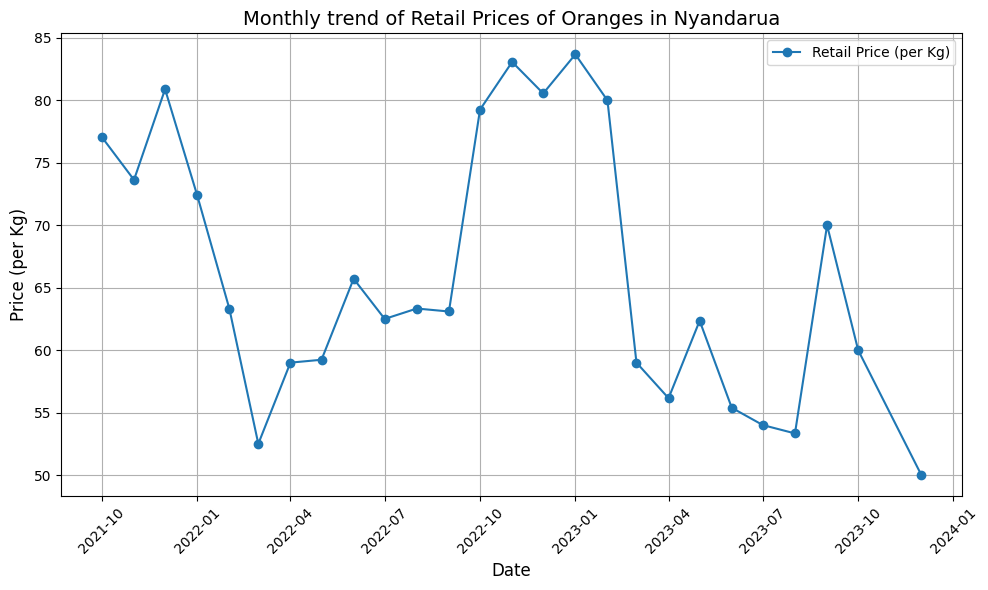

In [190]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_oranges_Nyandarua[(grouped_by_date_oranges_Nyandarua['County'] == 'Nyandarua') & (grouped_by_date_oranges_Nyandarua['Commodity'] == 'Oranges')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of Oranges in Nyandarua', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

### best time September-October
### worst time April-May

C:\Users\Jordan Gamba\AppData\Local\Temp\ipykernel_6948\1184255594.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data_no_outliers, x='Market', y='Retail_per_kg', palette='Set2')


Cleaned Retail_per_kg (Without Outliers):
                  Market  Retail_per_kg
27                  Molo          30.00
28                  Molo          80.00
29                  Molo         100.00
30                  Molo         100.00
31                  Molo          28.89
...                  ...            ...
35906  Nakuru Top Market         120.00
35925    Nakuru Wakulima         150.00
35926    Nakuru Wakulima          70.00
35931    Nakuru Wakulima          60.00
35939    Nakuru Wakulima          80.00

[5433 rows x 2 columns]


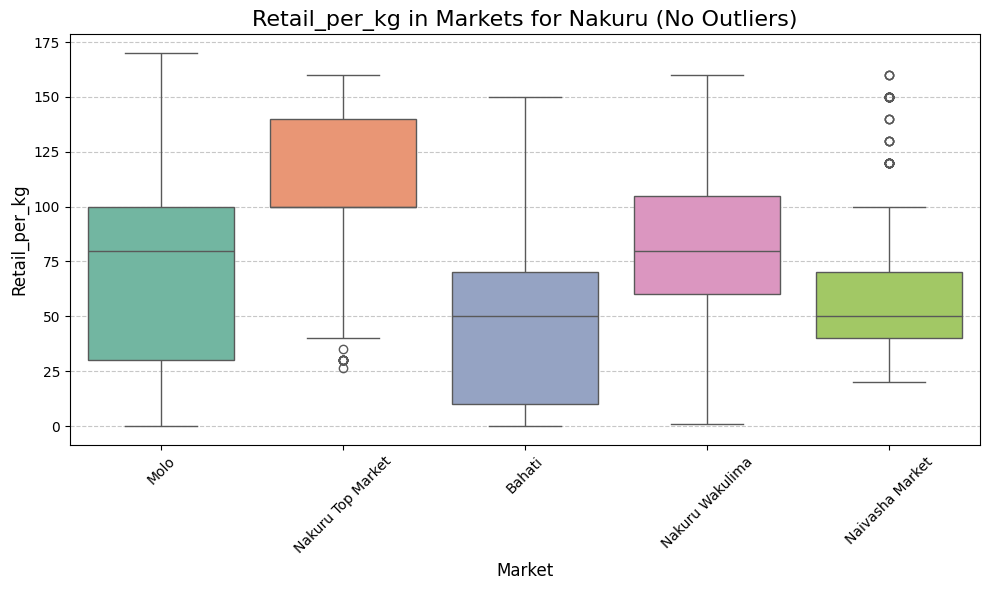

In [191]:
county_name = "Nakuru"  # Replace with the desired county name
filtered_data = combined_df[combined_df['County'] == county_name]

# Remove outliers for Supply Volume
Q1 = filtered_data['Retail_per_kg'].quantile(0.25)
Q3 = filtered_data['Retail_per_kg'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data to remove outliers
filtered_data_no_outliers = filtered_data[
    (filtered_data['Retail_per_kg'] >= lower_bound) & 
    (filtered_data['Retail_per_kg'] <= upper_bound)
]

# Create the box plot for supply volumes in all markets within the county (no outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data_no_outliers, x='Market', y='Retail_per_kg', palette='Set2')

# Customize the plot
plt.title(f"Retail_per_kg in Markets for {county_name} (No Outliers)", fontsize=16)
plt.xlabel("Market", fontsize=12)
plt.ylabel("Retail_per_kg", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Display the cleaned supply volumes
print("Cleaned Retail_per_kg (Without Outliers):")
print(filtered_data_no_outliers[['Market', 'Retail_per_kg']])

# Show the plot
plt.tight_layout()
plt.show()

# Nairobi  


## Dry Maize

###  Create new columns for Monthly trend of Dry Maize Retail Prices in Nairobi

In [192]:
# Create new columns for month and quarter
cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
#cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_drymaize_Nairobi= cleaned_df.groupby(['County', 'Commodity', 'Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_drymaize_Nairobi['Month'] = grouped_by_date_drymaize_Nairobi['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_drymaize_Nairobi)

         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


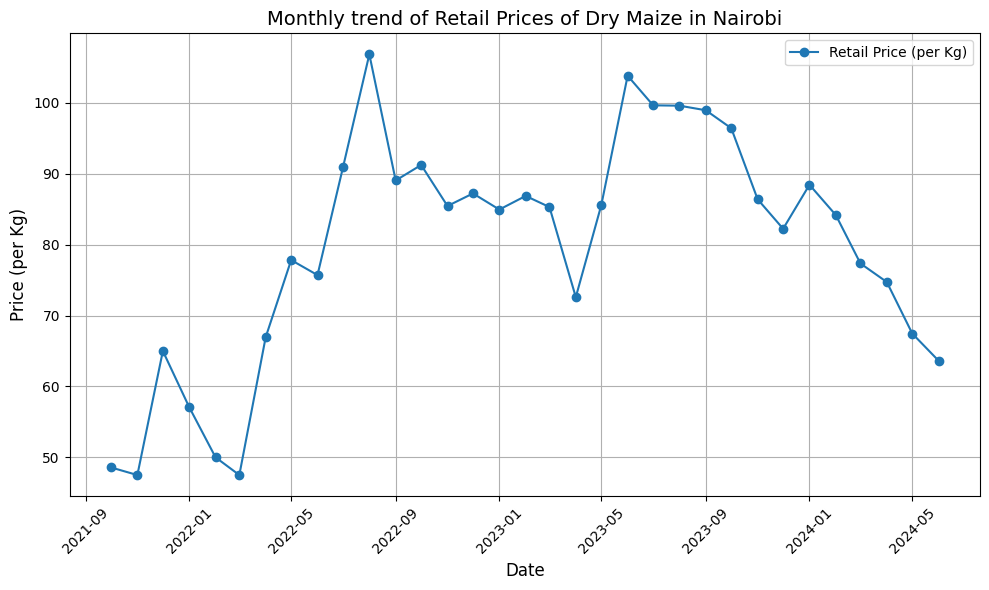

In [193]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_drymaize_Nairobi[(grouped_by_date_drymaize_Nairobi['County'] == 'Nairobi') & (grouped_by_date_drymaize_Nairobi['Commodity'] == 'Dry Maize')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of Dry Maize in Nairobi', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

### Best times May-Sep
### Worst times Sep- Dec

###  Create new columns for Quarterly trend of Dry Mazie Retail Prices in Nairobi

In [194]:
cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_drymaize_Nairobi= cleaned_df.groupby(['County', 'Commodity', 'Quarter'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_drymaize_Nairobi['Quarter'] = grouped_by_date_drymaize_Nairobi['Quarter'].dt.to_timestamp()

# Show the result
print(grouped_by_date_drymaize_Nairobi)

        County             Commodity    Quarter  Retail_per_kg
0    Kirinyaga      Banana (Cooking) 2021-10-01      23.615682
1    Kirinyaga      Banana (Cooking) 2022-01-01      24.259259
2    Kirinyaga      Banana (Cooking) 2022-04-01      23.416667
3    Kirinyaga      Banana (Cooking) 2022-07-01      25.156250
4    Kirinyaga      Banana (Cooking) 2022-10-01      29.038793
..         ...                   ...        ...            ...
523  Nyandarua  White Irish Potatoes 2022-10-01      45.250000
524  Nyandarua  White Irish Potatoes 2023-01-01      43.916087
525  Nyandarua  White Irish Potatoes 2023-04-01      56.823636
526  Nyandarua  White Irish Potatoes 2023-07-01      70.000000
527  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[528 rows x 4 columns]


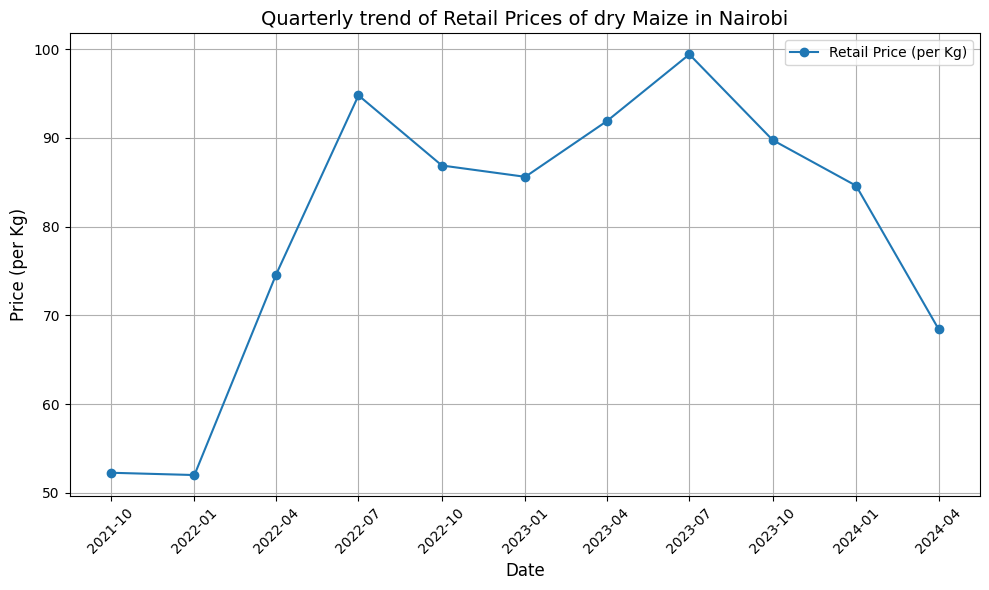

In [195]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_drymaize_Nairobi[(grouped_by_date_drymaize_Nairobi['County'] == 'Nairobi') & (grouped_by_date_drymaize_Nairobi['Commodity'] == 'Dry Maize')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Quarter')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Quarter'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Quarterly trend of Retail Prices of dry Maize in Nairobi', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

## Bananas Cooking in Nairobi

###  Create new columns for Monthly trend of Bananas Cooking Retail Prices in Nairobi

In [196]:
# Create new columns for month and quarter
cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
#cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_bananascook_Nairobi= cleaned_df.groupby(['County', 'Commodity', 'Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_bananascook_Nairobi['Month'] = grouped_by_date_bananascook_Nairobi['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_bananascook_Nairobi)

         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


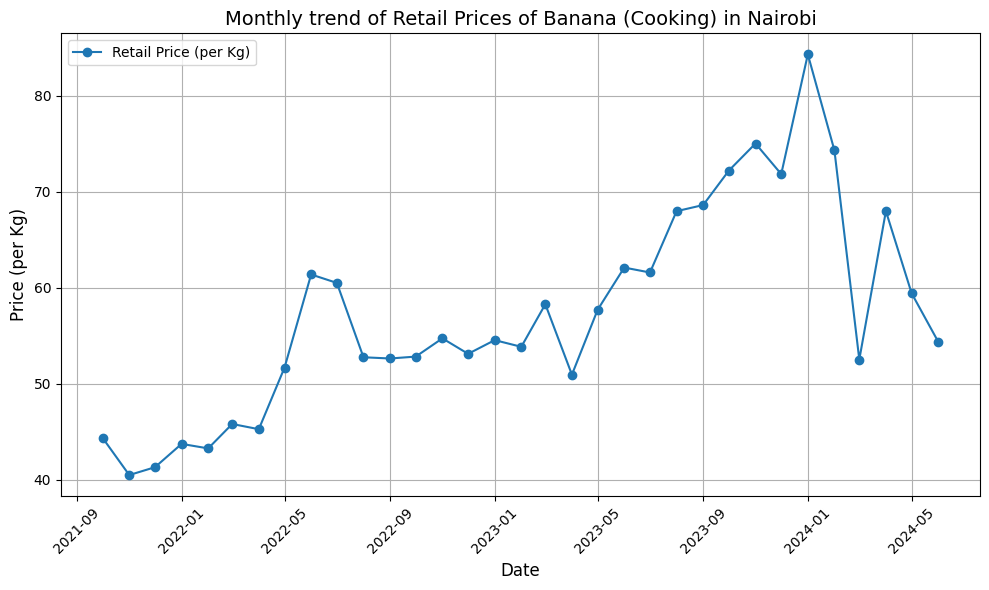

In [197]:
import matplotlib.pyplot as plt
# Banana (Cooking)

# Filter the DataFrame
filtered_df = grouped_by_date_bananascook_Nairobi[(grouped_by_date_bananascook_Nairobi['County'] == 'Nairobi') & (grouped_by_date_bananascook_Nairobi['Commodity'] == 'Banana (Cooking)')]
# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of Banana (Cooking) in Nairobi', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

No clear trend

###  Create new columns for Quarterly trend of Bananas cooking Retail Prices in Nairobi 

In [198]:
cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_cook_Nairobi= cleaned_df.groupby(['County', 'Commodity','Quarter'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_cook_Nairobi['Quarter'] = grouped_by_date_cook_Nairobi['Quarter'].dt.to_timestamp()

# Show the result
print(grouped_by_date_cook_Nairobi)

        County             Commodity    Quarter  Retail_per_kg
0    Kirinyaga      Banana (Cooking) 2021-10-01      23.615682
1    Kirinyaga      Banana (Cooking) 2022-01-01      24.259259
2    Kirinyaga      Banana (Cooking) 2022-04-01      23.416667
3    Kirinyaga      Banana (Cooking) 2022-07-01      25.156250
4    Kirinyaga      Banana (Cooking) 2022-10-01      29.038793
..         ...                   ...        ...            ...
523  Nyandarua  White Irish Potatoes 2022-10-01      45.250000
524  Nyandarua  White Irish Potatoes 2023-01-01      43.916087
525  Nyandarua  White Irish Potatoes 2023-04-01      56.823636
526  Nyandarua  White Irish Potatoes 2023-07-01      70.000000
527  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[528 rows x 4 columns]


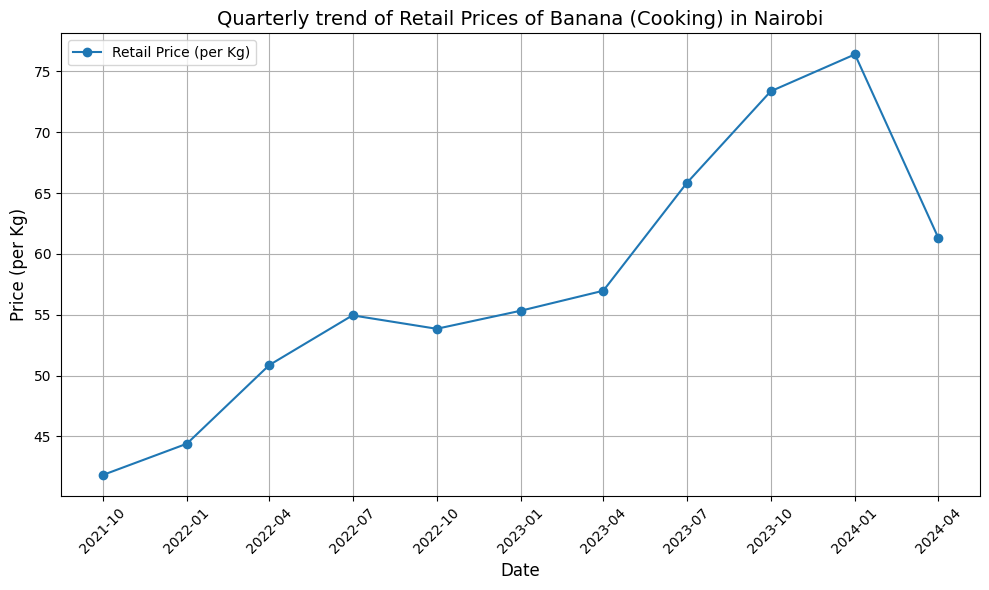

In [199]:
import matplotlib.pyplot as plt
# Banana (Cooking)

# Filter the DataFrame
filtered_df = grouped_by_date_cook_Nairobi[(grouped_by_date_cook_Nairobi['County'] == 'Nairobi') & (grouped_by_date_cook_Nairobi['Commodity'] == 'Banana (Cooking)')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Quarter')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Quarter'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Quarterly trend of Retail Prices of Banana (Cooking) in Nairobi', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

## White Irish Potatoes in Nyandarua

###  Create new columns for Monthly trend of White Irish Potatoes Retail Prices in Nairobi

In [200]:
# Create new columns for month and quarter
cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
#cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_whiteirish_Nairobi= cleaned_df.groupby(['County', 'Commodity', 'Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_whiteirish_Nairobi['Month'] = grouped_by_date_whiteirish_Nairobi['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_whiteirish_Nairobi)

         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


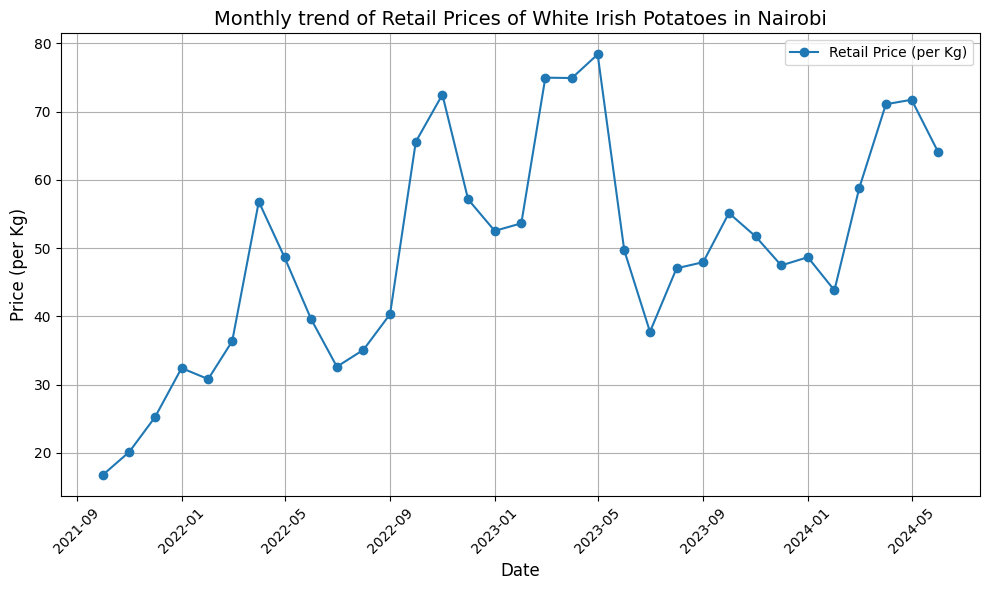

In [201]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_whiteirish_Nairobi[(grouped_by_date_whiteirish_Nakuru['County'] == 'Nairobi') & (grouped_by_date_whiteirish_Nairobi['Commodity'] == 'White Irish Potatoes')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of White Irish Potatoes in Nairobi', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

### Best times may-sep
### Worst time jan- april

###  Create new columns for Quarterly trend of White Irish Retail Prices in Nakuru

In [202]:
cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_whiteirish_Nairobi= cleaned_df.groupby(['County', 'Commodity','Quarter'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_whiteirish_Nairobi['Quarter'] = grouped_by_date_whiteirish_Nairobi['Quarter'].dt.to_timestamp()

# Show the result
print(grouped_by_date_whiteirish_Nairobi)

        County             Commodity    Quarter  Retail_per_kg
0    Kirinyaga      Banana (Cooking) 2021-10-01      23.615682
1    Kirinyaga      Banana (Cooking) 2022-01-01      24.259259
2    Kirinyaga      Banana (Cooking) 2022-04-01      23.416667
3    Kirinyaga      Banana (Cooking) 2022-07-01      25.156250
4    Kirinyaga      Banana (Cooking) 2022-10-01      29.038793
..         ...                   ...        ...            ...
523  Nyandarua  White Irish Potatoes 2022-10-01      45.250000
524  Nyandarua  White Irish Potatoes 2023-01-01      43.916087
525  Nyandarua  White Irish Potatoes 2023-04-01      56.823636
526  Nyandarua  White Irish Potatoes 2023-07-01      70.000000
527  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[528 rows x 4 columns]


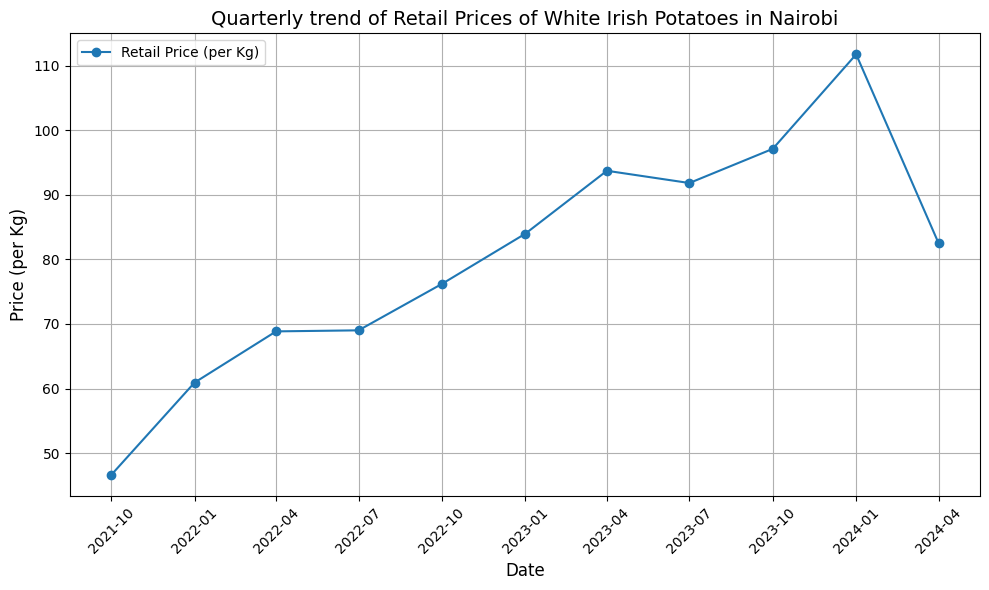

In [203]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_whiteirish_Nairobi[(grouped_by_date_whiteirish_Nairobi['County'] == 'Nairobi') & (grouped_by_date_whiteirish_Nairobi['Commodity'] == 'White Irish Potatoes')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Quarter')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Quarter'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Quarterly trend of Retail Prices of White Irish Potatoes in Nairobi', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

## Dry Onions in Nairobi

###  Create new columns for Monthly trend of Dry Onions Retail Prices in Nairobi

In [204]:
# Create new columns for month and quarter
cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
#cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_dryonions_Nairobi= cleaned_df.groupby(['County', 'Commodity', 'Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_dryonions_Nairobi['Month'] = grouped_by_date_dryonions_Nairobi['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_dryonions_Nairobi)

         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


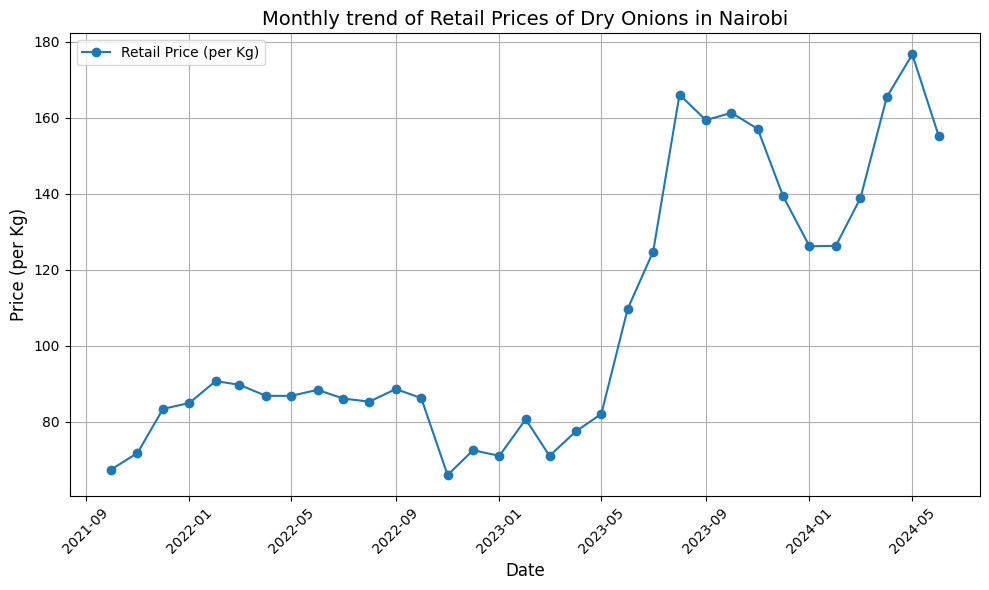

In [205]:
# Filter the DataFrame
filtered_df = grouped_by_date_dryonions_Nairobi[(grouped_by_date_dryonions_Nairobi['County'] == 'Nairobi') & (grouped_by_date_dryonions_Nairobi['Commodity'] == 'Dry Onions')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of Dry Onions in Nairobi', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

### best time jan-may
### worst time sep-dec

###  Create new columns for Quarterly trend of Dry Onions Retail Prices in Nairobi

In [206]:
cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_dryonions_Nairobi= cleaned_df.groupby(['County', 'Commodity','Quarter'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_dryonions_Nairobi['Quarter'] = grouped_by_date_dryonions_Nairobi['Quarter'].dt.to_timestamp()

# Show the result
print(grouped_by_date_dryonions_Nairobi)

        County             Commodity    Quarter  Retail_per_kg
0    Kirinyaga      Banana (Cooking) 2021-10-01      23.615682
1    Kirinyaga      Banana (Cooking) 2022-01-01      24.259259
2    Kirinyaga      Banana (Cooking) 2022-04-01      23.416667
3    Kirinyaga      Banana (Cooking) 2022-07-01      25.156250
4    Kirinyaga      Banana (Cooking) 2022-10-01      29.038793
..         ...                   ...        ...            ...
523  Nyandarua  White Irish Potatoes 2022-10-01      45.250000
524  Nyandarua  White Irish Potatoes 2023-01-01      43.916087
525  Nyandarua  White Irish Potatoes 2023-04-01      56.823636
526  Nyandarua  White Irish Potatoes 2023-07-01      70.000000
527  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[528 rows x 4 columns]


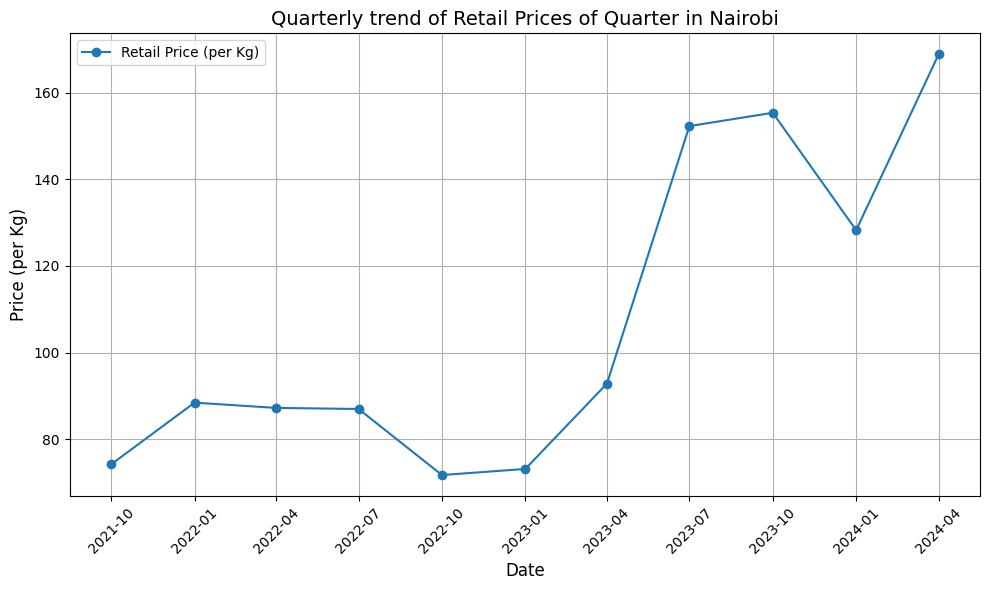

In [207]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_dryonions_Nairobi[(grouped_by_date_dryonions_Nairobi['County'] == 'Nairobi') & (grouped_by_date_dryonions_Nairobi['Commodity'] == 'Dry Onions')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Quarter')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Quarter'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Quarterly trend of Retail Prices of Quarter in Nairobi', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

## Water Melons in Nairobi

###  Create new columns for Monthly trend of Water Melons Retail Prices in Nairobi

In [208]:
# Create new columns for month and quarter
cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
#cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_watermelons_Nairobi= cleaned_df.groupby(['County', 'Commodity', 'Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_watermelons_Nairobi['Month'] = grouped_by_date_watermelons_Nairobi['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_watermelons_Nairobi)

         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


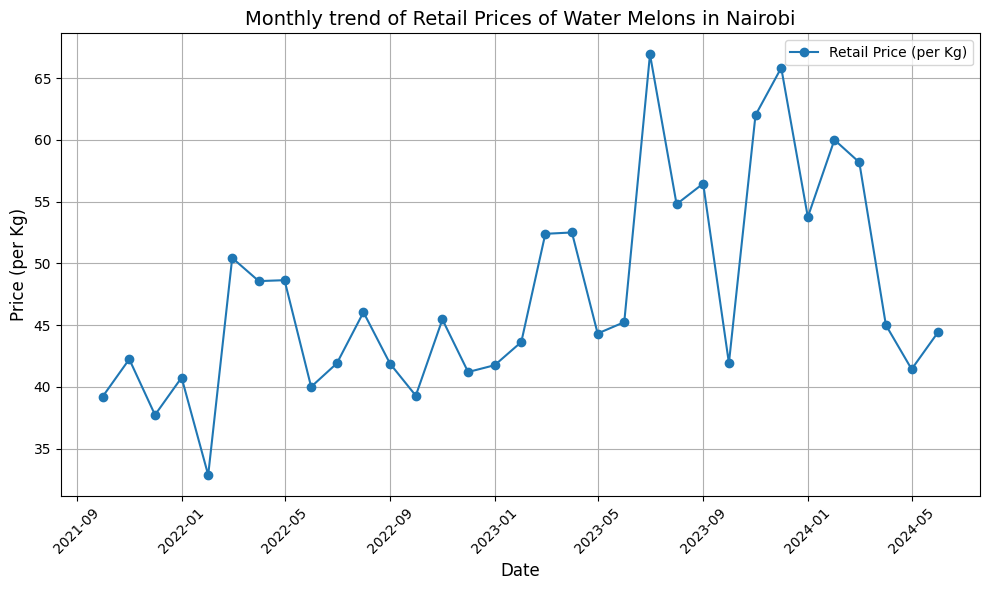

In [209]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_watermelons_Nairobi[(grouped_by_date_watermelons_Nairobi['County'] == 'Nairobi') & (grouped_by_date_watermelons_Nairobi['Commodity'] == 'Water Melon')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of Water Melons in Nairobi', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

### Best time Sep-Nov
### Worst time Mar-May

###  Create new columns for Quarterly trend of Water Melon Prices in Nairobi

In [210]:
cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_watermelons_Nairobi= cleaned_df.groupby(['County', 'Commodity','Quarter'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_watermelons_Nairobi['Quarter'] = grouped_by_date_watermelons_Nairobi['Quarter'].dt.to_timestamp()

# Show the result
print(grouped_by_date_watermelons_Nairobi)

        County             Commodity    Quarter  Retail_per_kg
0    Kirinyaga      Banana (Cooking) 2021-10-01      23.615682
1    Kirinyaga      Banana (Cooking) 2022-01-01      24.259259
2    Kirinyaga      Banana (Cooking) 2022-04-01      23.416667
3    Kirinyaga      Banana (Cooking) 2022-07-01      25.156250
4    Kirinyaga      Banana (Cooking) 2022-10-01      29.038793
..         ...                   ...        ...            ...
523  Nyandarua  White Irish Potatoes 2022-10-01      45.250000
524  Nyandarua  White Irish Potatoes 2023-01-01      43.916087
525  Nyandarua  White Irish Potatoes 2023-04-01      56.823636
526  Nyandarua  White Irish Potatoes 2023-07-01      70.000000
527  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[528 rows x 4 columns]


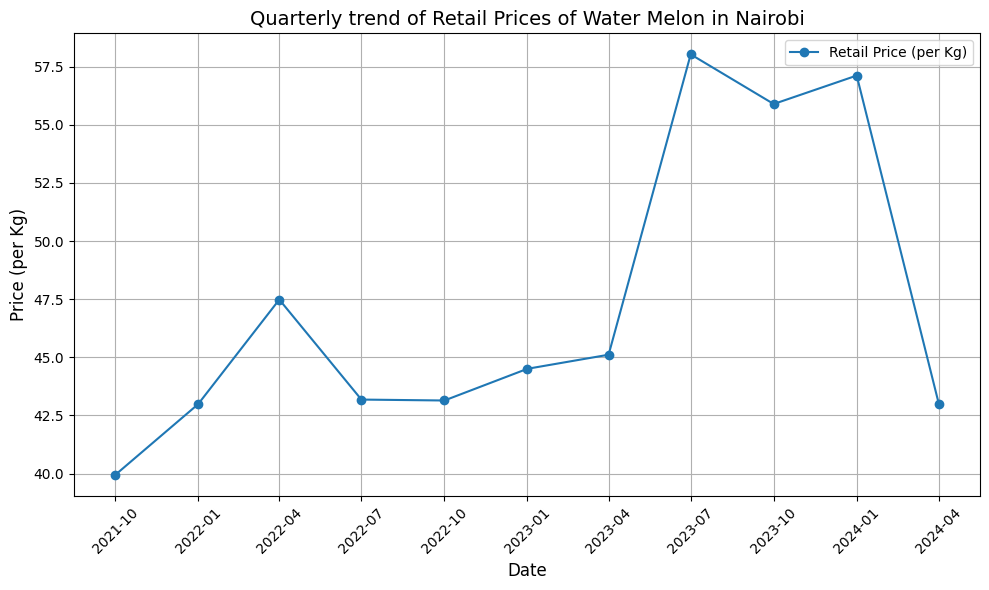

In [211]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_watermelons_Nairobi[(grouped_by_date_watermelons_Nairobi['County'] == 'Nairobi') & (grouped_by_date_watermelons_Nairobi['Commodity'] == 'Water Melon')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Quarter')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Quarter'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Quarterly trend of Retail Prices of Water Melon in Nairobi', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

## Mangoes in Nairobi

###  Create new columns for Monthly trend of Mangoes Retail Prices in Nairobi

In [212]:
cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
#cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_mangoes_Nairobi= cleaned_df.groupby(['County', 'Commodity', 'Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_mangoes_Nairobi['Month'] = grouped_by_date_mangoes_Nairobi['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_mangoes_Nairobi)

         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


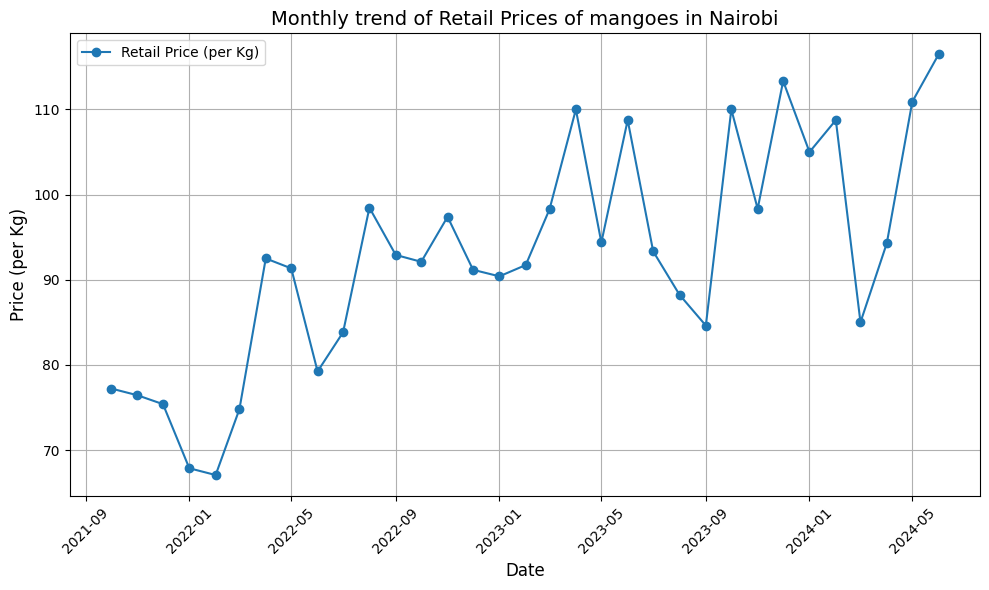

In [213]:
import matplotlib.pyplot as plt
# Banana (Cooking)

# Filter the DataFrame
filtered_df = grouped_by_date_mangoes_Nairobi[(grouped_by_date_mangoes_Nairobi['County'] == 'Nairobi') & (grouped_by_date_mangoes_Nairobi['Commodity'] == 'Mangoes')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of mangoes in Nairobi', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

### best time sep-oct
### worst time may- june

###  Create new columns for Quarterly trend of Mangoes Retail Prices in Nairobi

In [214]:
cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_mangoes_Nairobi= cleaned_df.groupby(['County', 'Commodity','Quarter'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_mangoes_Nairobi['Quarter'] = grouped_by_date_mangoes_Nairobi['Quarter'].dt.to_timestamp()

# Show the result
print(grouped_by_date_mangoes_Nairobi)

        County             Commodity    Quarter  Retail_per_kg
0    Kirinyaga      Banana (Cooking) 2021-10-01      23.615682
1    Kirinyaga      Banana (Cooking) 2022-01-01      24.259259
2    Kirinyaga      Banana (Cooking) 2022-04-01      23.416667
3    Kirinyaga      Banana (Cooking) 2022-07-01      25.156250
4    Kirinyaga      Banana (Cooking) 2022-10-01      29.038793
..         ...                   ...        ...            ...
523  Nyandarua  White Irish Potatoes 2022-10-01      45.250000
524  Nyandarua  White Irish Potatoes 2023-01-01      43.916087
525  Nyandarua  White Irish Potatoes 2023-04-01      56.823636
526  Nyandarua  White Irish Potatoes 2023-07-01      70.000000
527  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[528 rows x 4 columns]


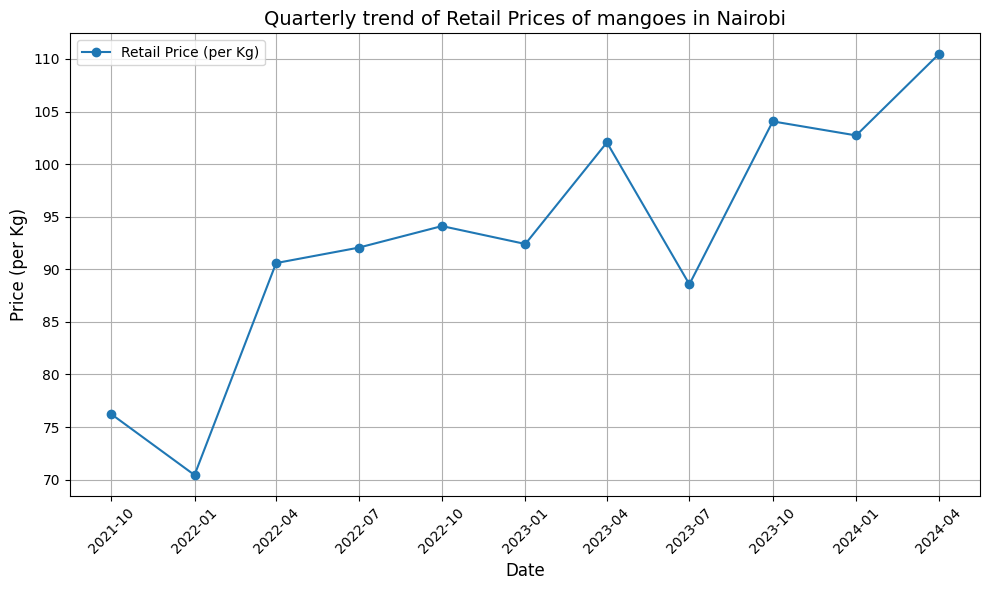

In [215]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_mangoes_Nairobi[(grouped_by_date_mangoes_Nairobi['County'] == 'Nairobi') & (grouped_by_date_mangoes_Nairobi['Commodity'] == 'Mangoes')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Quarter')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Quarter'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Quarterly trend of Retail Prices of mangoes in Nairobi', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

## Ripe Bananas in Nairobi

###  Create new columns for Monthly trend of Ripe Bananas Retail Prices in Nairobi

In [216]:
# Create new columns for month and quarter
cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
#cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_ripe_Nairobi= cleaned_df.groupby(['County', 'Commodity', 'Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_ripe_Nairobi['Month'] = grouped_by_date_ripe_Nairobi['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_ripe_Nairobi)

         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


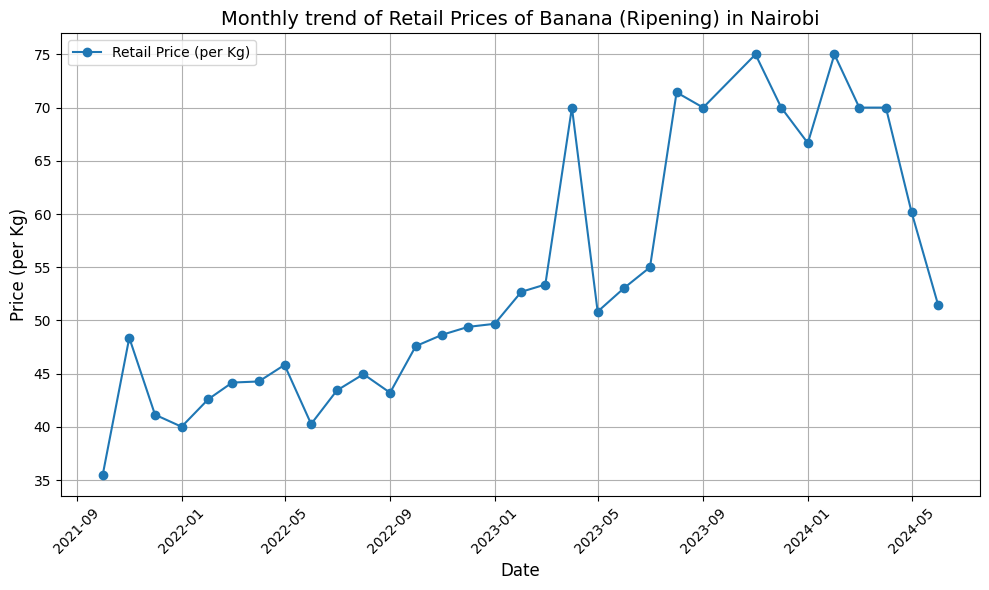

In [217]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_ripe_Nairobi[(grouped_by_date_ripe_Nairobi['County'] == 'Nairobi') & (grouped_by_date_ripe_Nairobi['Commodity'] == 'Banana (Ripening)')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of Banana (Ripening) in Nairobi', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

### There is no seasonality with this crop

###  Create new columns for Quarterly trend of Ripe Bananas Prices in Nairobi

In [218]:
cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_ripe_Nairobi= cleaned_df.groupby(['County', 'Commodity','Quarter'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_ripe_Nairobi['Quarter'] = grouped_by_date_ripe_Nairobi['Quarter'].dt.to_timestamp()

# Show the result
print(grouped_by_date_ripe_Nairobi)

        County             Commodity    Quarter  Retail_per_kg
0    Kirinyaga      Banana (Cooking) 2021-10-01      23.615682
1    Kirinyaga      Banana (Cooking) 2022-01-01      24.259259
2    Kirinyaga      Banana (Cooking) 2022-04-01      23.416667
3    Kirinyaga      Banana (Cooking) 2022-07-01      25.156250
4    Kirinyaga      Banana (Cooking) 2022-10-01      29.038793
..         ...                   ...        ...            ...
523  Nyandarua  White Irish Potatoes 2022-10-01      45.250000
524  Nyandarua  White Irish Potatoes 2023-01-01      43.916087
525  Nyandarua  White Irish Potatoes 2023-04-01      56.823636
526  Nyandarua  White Irish Potatoes 2023-07-01      70.000000
527  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[528 rows x 4 columns]


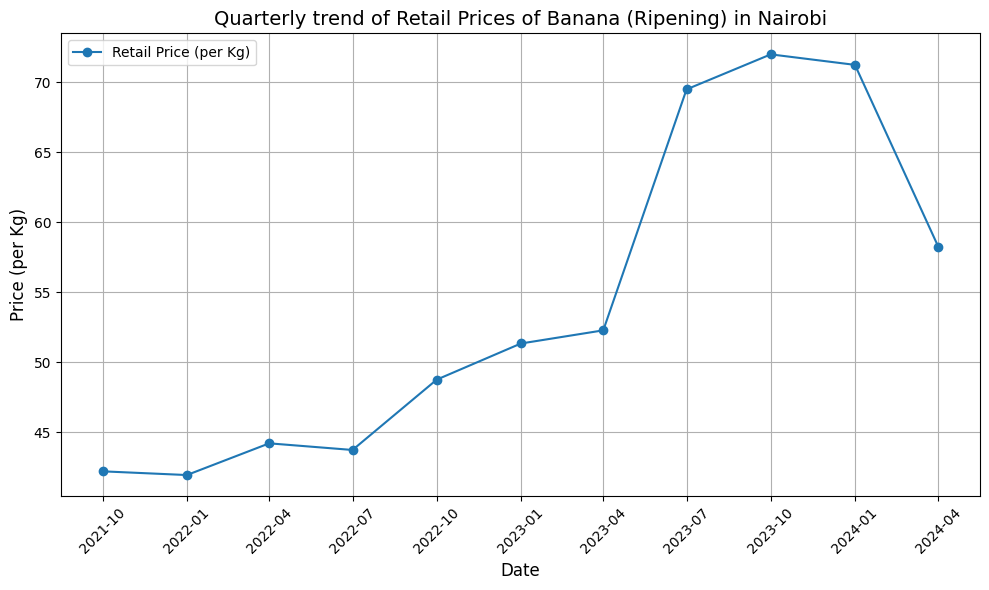

In [219]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_ripe_Nairobi[(grouped_by_date_ripe_Nairobi['County'] == 'Nairobi') & (grouped_by_date_ripe_Nairobi['Commodity'] == 'Banana (Ripening)')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Quarter')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Quarter'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Quarterly trend of Retail Prices of Banana (Ripening) in Nairobi', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

## Kales in Nairobi

###  Create new columns for Monthly trend of Kales Retail Prices in Nairobi

In [220]:
# Create new columns for month and quarter
cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
#cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_kales_Nairobi= cleaned_df.groupby(['County', 'Commodity', 'Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_kales_Nairobi['Month'] = grouped_by_date_kales_Nairobi['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_kales_Nairobi)

         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


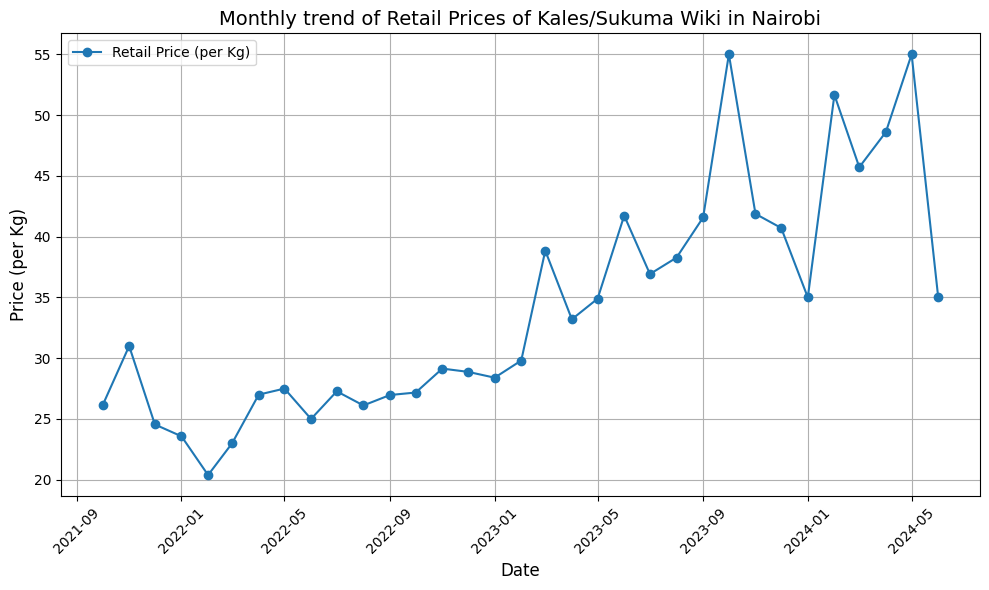

In [221]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_kales_Nairobi[(grouped_by_date_kales_Nairobi['County'] == 'Nairobi') & (grouped_by_date_kales_Nairobi['Commodity'] == 'Kales/Sukuma Wiki')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of Kales/Sukuma Wiki in Nairobi', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

### There is no seasonality

###  Create new columns for Quarterly trend of Kales Retail Prices in Nairobi

In [222]:
cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_spinach_Nairobi= cleaned_df.groupby(['County', 'Commodity','Quarter'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_spinach_Nairobi['Quarter'] = grouped_by_date_spinach_Nairobi['Quarter'].dt.to_timestamp()

# Show the result
print(grouped_by_date_spinach_Nairobi)

        County             Commodity    Quarter  Retail_per_kg
0    Kirinyaga      Banana (Cooking) 2021-10-01      23.615682
1    Kirinyaga      Banana (Cooking) 2022-01-01      24.259259
2    Kirinyaga      Banana (Cooking) 2022-04-01      23.416667
3    Kirinyaga      Banana (Cooking) 2022-07-01      25.156250
4    Kirinyaga      Banana (Cooking) 2022-10-01      29.038793
..         ...                   ...        ...            ...
523  Nyandarua  White Irish Potatoes 2022-10-01      45.250000
524  Nyandarua  White Irish Potatoes 2023-01-01      43.916087
525  Nyandarua  White Irish Potatoes 2023-04-01      56.823636
526  Nyandarua  White Irish Potatoes 2023-07-01      70.000000
527  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[528 rows x 4 columns]


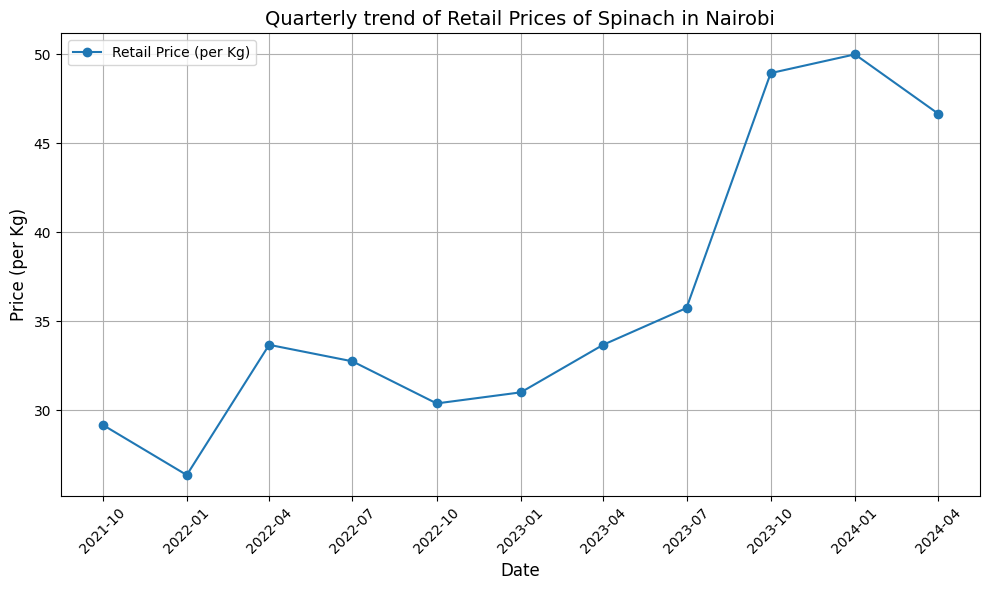

In [223]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_spinach_Nairobi[(grouped_by_date_spinach_Nairobi['County'] == 'Nairobi') & (grouped_by_date_spinach_Nairobi['Commodity'] == 'Spinach')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Quarter')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Quarter'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Quarterly trend of Retail Prices of Spinach in Nairobi', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

## Regular Spinach in Nairobi

###  Create new columns for Monthly trend of Regular Spinach Retail Prices in Nairobi

In [224]:
# Create new columns for month and quarter
cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
#cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_spinach_Nairobi= cleaned_df.groupby(['County', 'Commodity', 'Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_spinach_Nairobi['Month'] = grouped_by_date_spinach_Nairobi['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_spinach_Nairobi)

         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


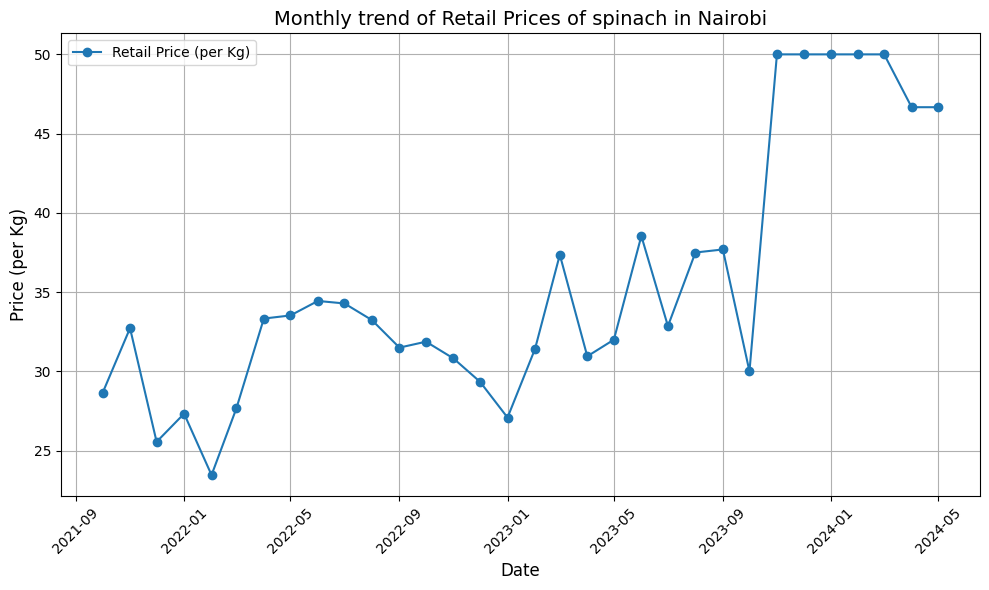

In [225]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_spinach_Nairobi[(grouped_by_date_spinach_Nairobi['County'] == 'Nairobi') & (grouped_by_date_spinach_Nairobi['Commodity'] == 'Spinach')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of spinach in Nairobi', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

### There is no seasonality

###  Create new columns for Quarterly trend of Kales Retail Prices in Nairobi

In [226]:
cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_spinach_Nairobi= cleaned_df.groupby(['County', 'Commodity','Quarter'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_spinach_Nairobi['Quarter'] = grouped_by_date_spinach_Nairobi['Quarter'].dt.to_timestamp()

# Show the result
print(grouped_by_date_spinach_Nairobi)

        County             Commodity    Quarter  Retail_per_kg
0    Kirinyaga      Banana (Cooking) 2021-10-01      23.615682
1    Kirinyaga      Banana (Cooking) 2022-01-01      24.259259
2    Kirinyaga      Banana (Cooking) 2022-04-01      23.416667
3    Kirinyaga      Banana (Cooking) 2022-07-01      25.156250
4    Kirinyaga      Banana (Cooking) 2022-10-01      29.038793
..         ...                   ...        ...            ...
523  Nyandarua  White Irish Potatoes 2022-10-01      45.250000
524  Nyandarua  White Irish Potatoes 2023-01-01      43.916087
525  Nyandarua  White Irish Potatoes 2023-04-01      56.823636
526  Nyandarua  White Irish Potatoes 2023-07-01      70.000000
527  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[528 rows x 4 columns]


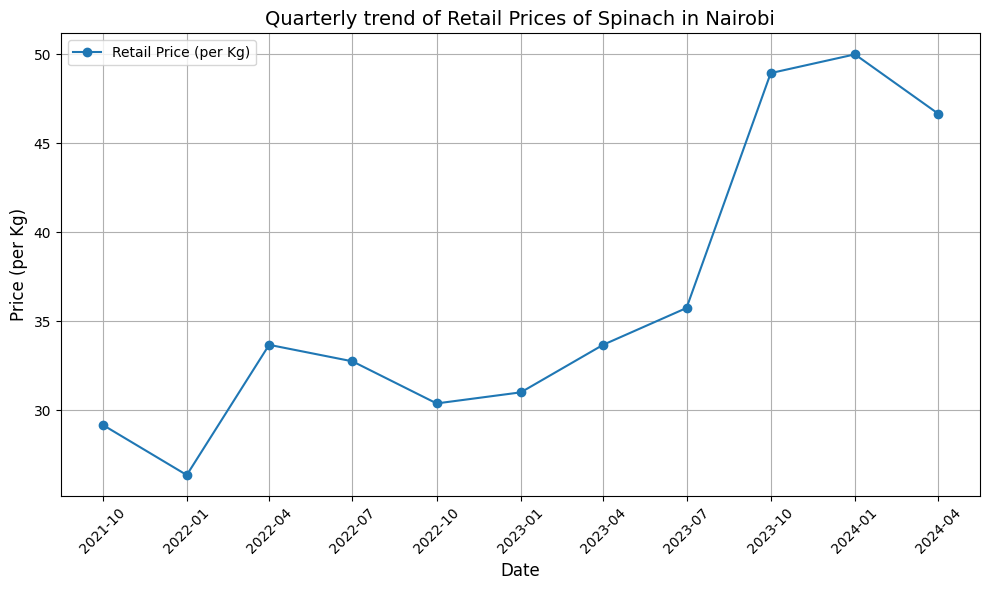

In [227]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_spinach_Nairobi[(grouped_by_date_spinach_Nairobi['County'] == 'Nairobi') & (grouped_by_date_spinach_Nairobi['Commodity'] == 'Spinach')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Quarter')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Quarter'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Quarterly trend of Retail Prices of Spinach in Nairobi', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

## oranges  

In [228]:
# Create new columns for month and quarter
cleaned_df['Month'] = cleaned_df['Date'].dt.to_period('M')  # Monthly period
#cleaned_df['Quarter'] = cleaned_df['Date'].dt.to_period('Q')  # Quarterly period

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date_oranges_Nairobi= cleaned_df.groupby(['County', 'Commodity', 'Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date_oranges_Nairobi['Month'] = grouped_by_date_oranges_Nairobi['Month'].dt.to_timestamp()

# Show the result
print(grouped_by_date_oranges_Nairobi)

         County             Commodity      Month  Retail_per_kg
0     Kirinyaga      Banana (Cooking) 2021-10-01      23.004118
1     Kirinyaga      Banana (Cooking) 2021-11-01      25.562308
2     Kirinyaga      Banana (Cooking) 2021-12-01      22.550714
3     Kirinyaga      Banana (Cooking) 2022-01-01      23.125000
4     Kirinyaga      Banana (Cooking) 2022-02-01      23.636364
...         ...                   ...        ...            ...
1528  Nyandarua  White Irish Potatoes 2023-03-01      48.111429
1529  Nyandarua  White Irish Potatoes 2023-05-01      55.941667
1530  Nyandarua  White Irish Potatoes 2023-06-01      57.882000
1531  Nyandarua  White Irish Potatoes 2023-08-01      70.000000
1532  Nyandarua  White Irish Potatoes 2023-10-01      41.180000

[1533 rows x 4 columns]


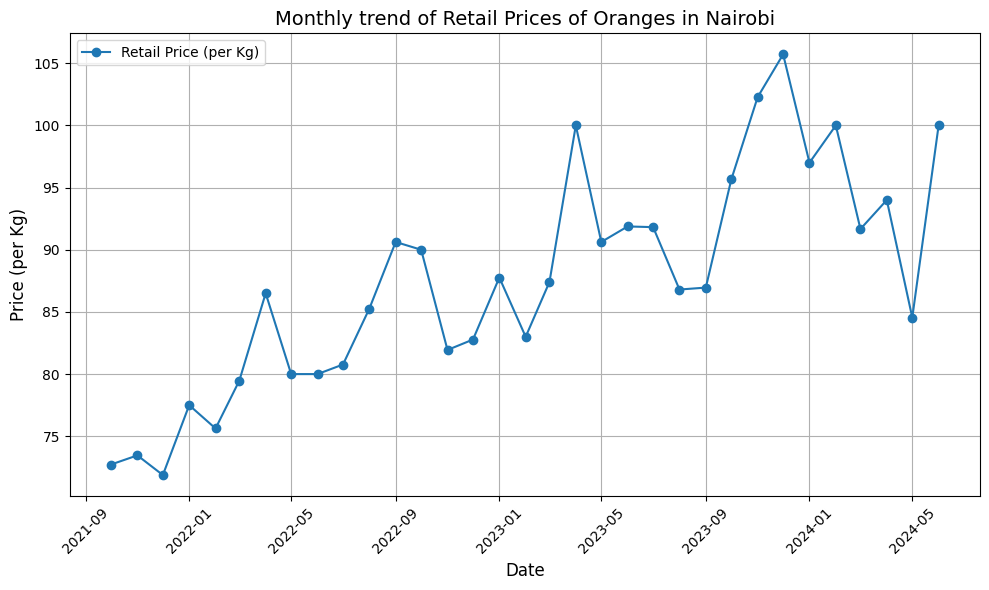

In [229]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = grouped_by_date_oranges_Nairobi[(grouped_by_date_oranges_Nairobi['County'] == 'Nairobi') & (grouped_by_date_oranges_Nairobi['Commodity'] == 'Oranges')]

# Sort by Date for proper time-series plotting
filtered_df = filtered_df.sort_values(by='Month')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Month'], filtered_df['Retail_per_kg'], label='Retail Price (per Kg)', marker='o')
#plt.plot(filtered_df['Date'], filtered_df['Wholesale_per_kg'], label='Wholesale Price (per Kg)', marker='x')

# Customize the plot
plt.title('Monthly trend of Retail Prices of Oranges in Nairobi', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (per Kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

### best time to sell September-October
### worst time to sell January-February

## Top Prized Markets in Nairobi

C:\Users\Jordan Gamba\AppData\Local\Temp\ipykernel_6948\2966285448.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, x='Market', y='Retail_per_kg', palette='Set2')


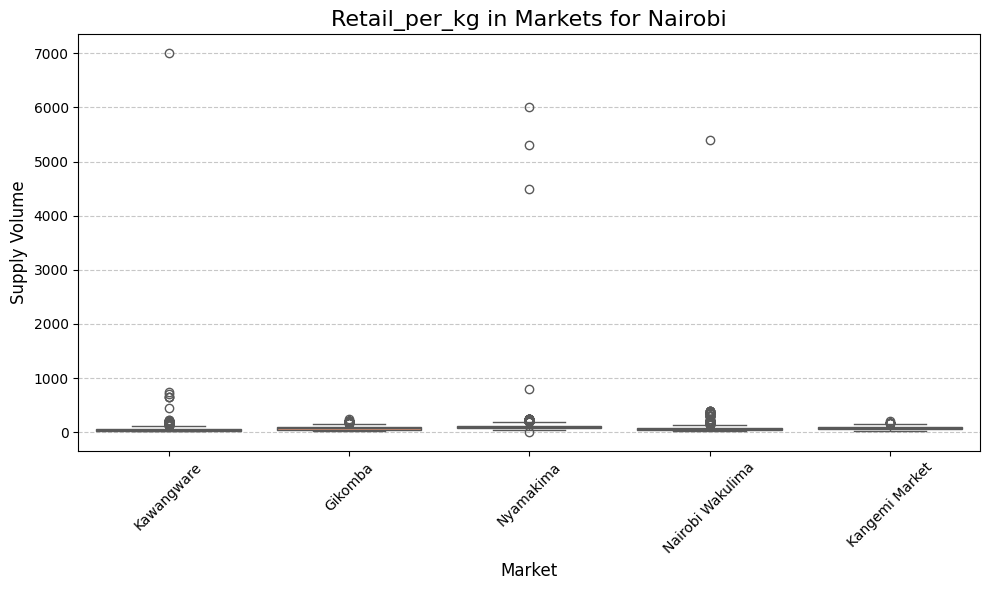

In [238]:
# Filter the data for a specific county
county_name = "Nairobi"  # Replace with the desired county name
filtered_data = combined_df[combined_df['County'] == county_name]

# Create the box plot for supply volumes in all markets within the county
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data, x='Market', y='Retail_per_kg', palette='Set2')

# Customize the plot
plt.title(f"Retail_per_kg in Markets for {county_name}", fontsize=16)
plt.xlabel("Market", fontsize=12)
plt.ylabel("Supply Volume", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\Jordan Gamba\AppData\Local\Temp\ipykernel_6948\1544704169.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data_no_outliers, x='Market', y='Retail_per_kg', palette='Set2')


Cleaned Retail_per_kg (Without Outliers):
               Market  Retail_per_kg
2          Kawangware           60.0
3          Kawangware           35.0
4          Kawangware          130.0
5          Kawangware          120.0
6          Kawangware           40.0
...               ...            ...
35956         Gikomba           25.0
35957         Gikomba           85.0
35958         Gikomba           70.0
35960  Kangemi Market           50.0
35984       Nyamakima           80.0

[8818 rows x 2 columns]


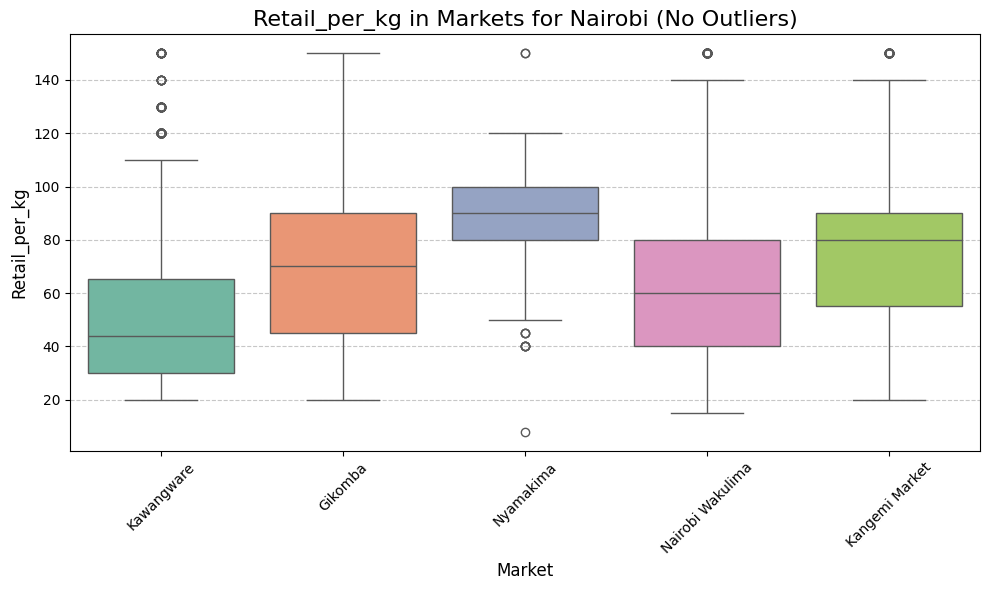

In [239]:
county_name = "Nairobi"  # Replace with the desired county name
filtered_data = combined_df[combined_df['County'] == county_name]

# Remove outliers for Supply Volume
Q1 = filtered_data['Retail_per_kg'].quantile(0.25)
Q3 = filtered_data['Retail_per_kg'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data to remove outliers
filtered_data_no_outliers = filtered_data[
    (filtered_data['Retail_per_kg'] >= lower_bound) & 
    (filtered_data['Retail_per_kg'] <= upper_bound)
]

# Create the box plot for supply volumes in all markets within the county (no outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data_no_outliers, x='Market', y='Retail_per_kg', palette='Set2')

# Customize the plot
plt.title(f"Retail_per_kg in Markets for {county_name} (No Outliers)", fontsize=16)
plt.xlabel("Market", fontsize=12)
plt.ylabel("Retail_per_kg", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Display the cleaned supply volumes
print("Cleaned Retail_per_kg (Without Outliers):")
print(filtered_data_no_outliers[['Market', 'Retail_per_kg']])

# Show the plot
plt.tight_layout()
plt.show()

In [240]:
# Group the filtered data (without outliers) by Market and calculate the total Supply Volume
market_supply_totals = (
    filtered_data_no_outliers.groupby('Market')['Retail_per_kg']
    .sum()
    .sort_values(ascending=False)
)

# Get the top three markets
top_three_markets = market_supply_totals.head(3)

# Display the results
print("Top Three Markets by Supply Volume (No Outliers):")
print(top_three_markets)

Top Three Markets by Supply Volume (No Outliers):
Market
Nairobi Wakulima    168623.70
Gikomba             167420.51
Kangemi Market      114894.83
Name: Retail_per_kg, dtype: float64


In [230]:


# Time series 

# Group by County, Commodity, Month, and Quarter, then calculate the mean
grouped_by_date = cleaned_df.groupby(['County', 'Commodity', 'Month'])[['Retail_per_kg']].mean().reset_index()
grouped_by_date['Month'] = grouped_by_date['Month'].dt.to_timestamp()
# Ensure 'Month' is a datetime object
grouped_by_date['Month'] = pd.to_datetime(grouped_by_date['Month'])

# Set 'Month' as the index
grouped_by_date.set_index('Month', inplace=True)
grouped_by_date= grouped_by_date[(grouped_by_date['County']=='Nairobi') & (grouped_by_date['Commodity']=='Banana (Cooking)')]


In [231]:
grouped_by_date.head()

County         Commodity  Retail_per_kg
Month                                               
2021-10-01  Nairobi  Banana (Cooking)      44.333333
2021-11-01  Nairobi  Banana (Cooking)      40.476190
2021-12-01  Nairobi  Banana (Cooking)      41.294118
2022-01-01  Nairobi  Banana (Cooking)      43.720000
2022-02-01  Nairobi  Banana (Cooking)      43.250000

In [232]:
# Resample by month and get the average retail price for each month
monthly_data = grouped_by_date['Retail_per_kg'].resample('M').mean()


C:\Users\Jordan Gamba\AppData\Local\Temp\ipykernel_6948\128936835.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = grouped_by_date['Retail_per_kg'].resample('M').mean()


In [233]:
monthly_data

Month
2021-10-31    44.333333
2021-11-30    40.476190
2021-12-31    41.294118
2022-01-31    43.720000
2022-02-28    43.250000
2022-03-31    45.793103
2022-04-30    45.250000
2022-05-31    51.666667
2022-06-30    61.363636
2022-07-31    60.483871
2022-08-31    52.741935
2022-09-30    52.613636
2022-10-31    52.812500
2022-11-30    54.710328
2022-12-31    53.099167
2023-01-31    54.525354
2023-02-28    53.830000
2023-03-31    58.262969
2023-04-30    50.928065
2023-05-31    57.690909
2023-06-30    62.083793
2023-07-31    61.569167
2023-08-31    67.954889
2023-09-30    68.594000
2023-10-31    72.187500
2023-11-30    75.000000
2023-12-31    71.818182
2024-01-31    84.285714
2024-02-29    74.285714
2024-03-31    52.500000
2024-04-30    67.962963
2024-05-31    59.404762
2024-06-30    54.357143
Freq: ME, Name: Retail_per_kg, dtype: float64

In [234]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import STL

# Decompose the time series using STL (Seasonal and Trend decomposition using LOESS)
decomposition = STL(monthly_data, seasonal=5).fit()

# Access the decomposed components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(monthly_data, label='Original Data')
plt.legend(loc='upper left')
plt.title('Original Data')

plt.subplot(412)
plt.plot(trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(residual, label='Residual', color='red')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'statsmodels'